**PROBLEM STATMENET**

Schuster, a multinational retail corporation specializing in sports goods and accessories, maintains numerous credit arrangements with its vendors. However, certain vendors consistently delay payments, leading to significant financial losses for both parties. Despite imposing heavy late payment fees, this practice undermines long-term business relationships. To mitigate these challenges, Schuster seeks to analyze vendor payment patterns and forecast the probability of late payments for outstanding invoices. This proactive approach aims to reduce non-value-added activities, save time, and minimize financial repercussions

**MODEL APPROACH**


1. Dataset Understanding
2. Data Cleaning
3. EDA
4. Customer Behaviour Segmentation
5. Data Preparation (incl. Feature Engineering & Data Imbalance Check)
6. Building Models
7. Model Evaluation
8. Model Deployment on Open Invoices
9. Conclusion

In [84]:
# importing the necessary libraries
import pandas as pd
import numpy as np
# importing the libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# importing libraries for model
import sklearn
import statsmodels.api as sm


import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Setting the display options
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [85]:
df_bb= pd.read_csv("Received_Payments_Data.csv")
df_bb.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,1.421000e+10,20-Apr-21,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


In [86]:
df_bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RECEIPT_METHOD         93937 non-null  object 
 1   CUSTOMER_NAME          93937 non-null  object 
 2   CUSTOMER_NUMBER        93937 non-null  int64  
 3   RECEIPT_DOC_NO         93908 non-null  float64
 4   RECEIPT_DATE           93937 non-null  object 
 5   CLASS                  93937 non-null  object 
 6   CURRENCY_CODE          93937 non-null  object 
 7   Local Amount           93937 non-null  float64
 8   USD Amount             93937 non-null  float64
 9   INVOICE_ALLOCATED      93937 non-null  object 
 10  INVOICE_CREATION_DATE  93937 non-null  object 
 11  DUE_DATE               93937 non-null  object 
 12  PAYMENT_TERM           93937 non-null  object 
 13  INVOICE_CLASS          93937 non-null  object 
 14  INVOICE_CURRENCY_CODE  93937 non-null  object 
 15  IN

In [87]:
df_bb.describe()

,CUSTOMER_NUMBER,RECEIPT_DOC_NO,Local Amount,USD Amount
count,93937.000000,9.390800e+04,9.393700e+04,9.393700e+04
mean,12753.874033,1.583908e+11,1.066470e+06,5.312013e+05
std,14274.170829,3.885359e+10,1.546901e+06,9.508693e+05
min,1044.000000,1.421000e+10,0.000000e+00,0.000000e+00
25%,1888.000000,1.470000e+11,8.198039e+04,3.766298e+04
50%,4003.000000,1.510000e+11,4.053438e+05,1.810010e+05
75%,20884.000000,1.690000e+11,1.425606e+06,5.996137e+05
max,52940.000000,2.970000e+11,1.084983e+07,1.084983e+07


In [88]:
df_bb.isnull().sum()

RECEIPT_METHOD            0
CUSTOMER_NAME             0
CUSTOMER_NUMBER           0
RECEIPT_DOC_NO           29
RECEIPT_DATE              0
CLASS                     0
CURRENCY_CODE             0
Local Amount              0
USD Amount                0
INVOICE_ALLOCATED         0
INVOICE_CREATION_DATE     0
DUE_DATE                  0
PAYMENT_TERM              0
INVOICE_CLASS             0
INVOICE_CURRENCY_CODE     0
INVOICE_TYPE              0
dtype: int64

In [89]:
df_bb.shape

(93937, 16)

In [90]:
df_bb.nunique()

RECEIPT_METHOD               8
CUSTOMER_NAME              690
CUSTOMER_NUMBER           1054
RECEIPT_DOC_NO              73
RECEIPT_DATE               170
CLASS                        1
CURRENCY_CODE                8
Local Amount              7752
USD Amount                7820
INVOICE_ALLOCATED        12986
INVOICE_CREATION_DATE     1310
DUE_DATE                  1203
PAYMENT_TERM                42
INVOICE_CLASS                3
INVOICE_CURRENCY_CODE       10
INVOICE_TYPE                 2
dtype: int64

In [91]:
df_op=pd.read_csv("Open_Invoice_data.csv")
df_op.head()

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,04-APR-2022 01:07:01,3rd Party,GIVE Corp,49144.0,100210000438,21/12/2021,Immediate,21/12/2021,AED,"-3,088",CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000052,01/02/2022,30 Days from Inv Date,03/03/2022,USD,"2,000",INVOICE,33,"2,000",2/1/2022 14:09
2,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000143,24/03/2022,30 Days from Inv Date,23/04/2022,USD,"2,000",INVOICE,-18,"2,000",3/24/2022 17:46
3,04-APR-2022 01:07:01,Related Party,AL R Corp,23312.0,100220000001,04/01/2022,15 Days from Inv Date,19/01/2022,AED,"2,415",INVOICE,76,"2,415",1/5/2022 11:49
4,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,03/03/2022,30 Days from EOM,30/04/2022,AED,"3,800",INVOICE,-25,"3,800",3/3/2022 22:30


In [92]:
df_op.shape

(88204, 14)

In [93]:
df_op.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88204 entries, 0 to 88203
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AS_OF_DATE            88204 non-null  object 
 1   Customer Type         88204 non-null  object 
 2   Customer_Name         88204 non-null  object 
 3   Customer Account No   88201 non-null  float64
 4   Transaction Number    88195 non-null  object 
 5   Transaction Date      88204 non-null  object 
 6   Payment Term          88204 non-null  object 
 7   Due Date              88204 non-null  object 
 8   Transaction Currency  88204 non-null  object 
 9   Local Amount          88204 non-null  object 
 10  Transaction Class     88204 non-null  object 
 11  AGE                   88204 non-null  int64  
 12  USD Amount            88204 non-null  object 
 13  INV_CREATION_DATE     88204 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 9.4+ MB


## Cleaning of data

In [94]:
# duplicated records
df_bb.duplicated().sum()

51037

#### It means that 54% rows of total 93937 are duplicate, Hence, removing them

In [95]:
# Some of the duplicate data
df_bb[df_bb.duplicated()== True].head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
7,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.0,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
8,WIRE,FARO Corp,1409,9.921000e+10,31-Jan-21,PMT,SAR,157500.0,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
9,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.0,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
11,WIRE,FARO Corp,1409,9.921000e+10,31-Jan-21,PMT,SAR,157500.0,41991.60971,99200000040,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
26,WIRE,HAVA Corp,20884,9.921000e+10,31-May-21,PMT,SAR,113000.0,30127.31364,99200000032,31-Oct-20,15-Dec-20,45 Days from EOM,INV,SAR,Non Goods


In [96]:
# Deleting the duplicated records l
df_bb=df_bb[~df_bb.duplicated()]

In [97]:
df_bb.shape

(42900, 16)

In [98]:
df_bb.isnull().sum()

RECEIPT_METHOD            0
CUSTOMER_NAME             0
CUSTOMER_NUMBER           0
RECEIPT_DOC_NO           17
RECEIPT_DATE              0
CLASS                     0
CURRENCY_CODE             0
Local Amount              0
USD Amount                0
INVOICE_ALLOCATED         0
INVOICE_CREATION_DATE     0
DUE_DATE                  0
PAYMENT_TERM              0
INVOICE_CLASS             0
INVOICE_CURRENCY_CODE     0
INVOICE_TYPE              0
dtype: int64

In [99]:
df_bb.isnull().mean()*100

RECEIPT_METHOD           0.000000
CUSTOMER_NAME            0.000000
CUSTOMER_NUMBER          0.000000
RECEIPT_DOC_NO           0.039627
RECEIPT_DATE             0.000000
CLASS                    0.000000
CURRENCY_CODE            0.000000
Local Amount             0.000000
USD Amount               0.000000
INVOICE_ALLOCATED        0.000000
INVOICE_CREATION_DATE    0.000000
DUE_DATE                 0.000000
PAYMENT_TERM             0.000000
INVOICE_CLASS            0.000000
INVOICE_CURRENCY_CODE    0.000000
INVOICE_TYPE             0.000000
dtype: float64

In [100]:
# The column RECEIPT_DOC_NO contains missing values and is deemed unnecessary for model construction, thus it can be dropped.
df_bb.drop("RECEIPT_DOC_NO",axis=1, inplace=True)
df_bb.shape

(42900, 15)

In [101]:
# Again checking for missing no
df_bb.isnull().mean()*100

RECEIPT_METHOD           0.0
CUSTOMER_NAME            0.0
CUSTOMER_NUMBER          0.0
RECEIPT_DATE             0.0
CLASS                    0.0
CURRENCY_CODE            0.0
Local Amount             0.0
USD Amount               0.0
INVOICE_ALLOCATED        0.0
INVOICE_CREATION_DATE    0.0
DUE_DATE                 0.0
PAYMENT_TERM             0.0
INVOICE_CLASS            0.0
INVOICE_CURRENCY_CODE    0.0
INVOICE_TYPE             0.0
dtype: float64

In [102]:
# checking for outliers
df_bb.describe()

,CUSTOMER_NUMBER,Local Amount,USD Amount
count,42900.000000,4.290000e+04,4.290000e+04
mean,16427.901772,5.494993e+05,2.981975e+05
std,16164.295315,1.038381e+06,7.052098e+05
min,1044.000000,0.000000e+00,0.000000e+00
25%,2795.000000,3.018534e+04,1.390970e+04
50%,7530.000000,1.572068e+05,6.443242e+04
75%,34258.000000,5.215948e+05,2.671678e+05
max,52940.000000,1.084983e+07,1.084983e+07


In [103]:
# Let us look at those records where min value is 0 in local and in USD
df_bb[df_bb["Local Amount"]==0]

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
1091,WIRE,AL F Corp,23618,31-Jan-21,PMT,SAR,0.0,0.0,1.0119E+11,15-May-19,15-Jun-19,15 Days from EOM,INV,SAR,Goods
1092,WIRE,AL F Corp,23618,31-Jan-21,PMT,SAR,0.0,0.0,1.0119E+11,6-Aug-19,15-Sep-19,15 Days from EOM,INV,SAR,Goods
1093,WIRE,AL F Corp,23618,31-Jan-21,PMT,SAR,0.0,0.0,1.0119E+11,19-Dec-19,15-Jan-20,15 Days from EOM,INV,SAR,Goods
1094,WIRE,AL F Corp,23618,31-Jan-21,PMT,SAR,0.0,0.0,11705,24-Jan-21,15-Feb-21,15 Days from EOM,INV,SAR,Non Goods
1095,WIRE,AL F Corp,23618,31-Jan-21,PMT,SAR,0.0,0.0,1.0118E+11,15-Aug-18,15-Sep-18,15 Days from EOM,INV,SAR,Goods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93879,WIRE,SAUD Corp,38035,31-May-21,PMT,SAR,0.0,0.0,2000006359,28-Jun-20,29-Aug-17,30 Days from Inv Date,INV,SAR,Non Goods
93880,WIRE,SAUD Corp,38035,31-May-21,PMT,SAR,0.0,0.0,2000006467,28-Jun-20,31-Aug-17,30 Days from Inv Date,INV,SAR,Non Goods
93881,WIRE,SAUD Corp,38035,31-May-21,PMT,SAR,0.0,0.0,2000006765,28-Jun-20,6-Sep-17,30 Days from Inv Date,INV,SAR,Non Goods
93882,WIRE,SAUD Corp,38035,31-May-21,PMT,SAR,0.0,0.0,2000006917,28-Jun-20,9-Sep-17,30 Days from Inv Date,INV,SAR,Non Goods


In [104]:
# retain the records where local amount >0.
df_bb=df_bb[df_bb["Local Amount"]>0]
df_bb.shape

(42058, 15)

In [105]:
# column with Local Amount has values in different currencies.Since it is not expressed in same units, we will retain USD Amount column
df_bb.drop("Local Amount",axis=1,inplace=True)
df_bb.shape

(42058, 14)

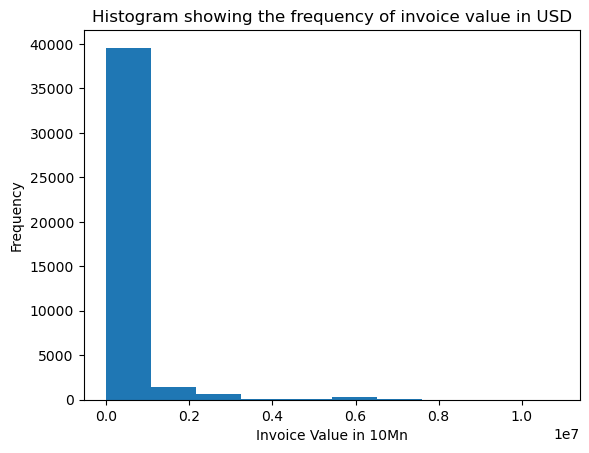

In [106]:
# look at the frequency of USD Amount.Most billings are less than a Million.

df_bb["USD Amount"].plot.hist()
plt.title("Histogram showing the frequency of invoice value in USD")
plt.xlabel("Invoice Value in 10Mn")
plt.show()


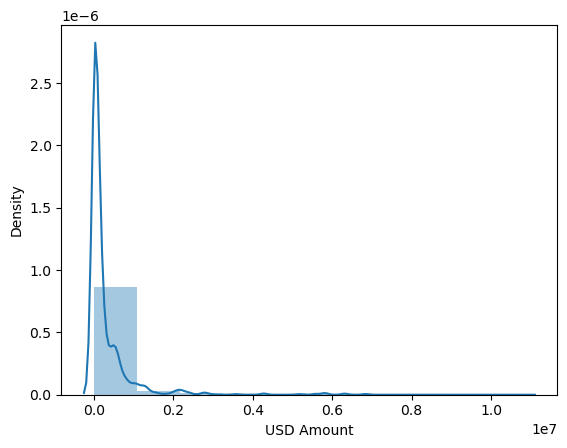

In [107]:
# checking the distribution of USD Amount
sns.distplot(df_bb["USD Amount"],bins=10)
plt.show()

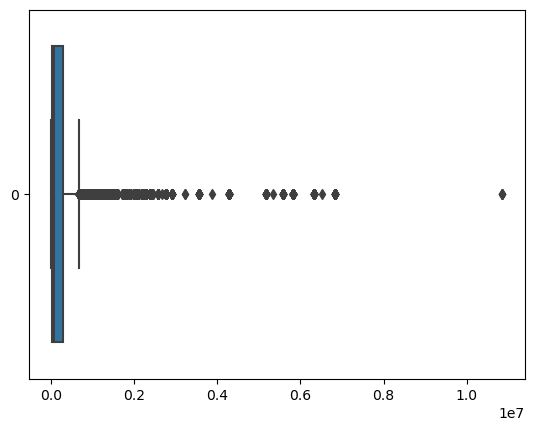

In [108]:
# Let us plot a boxplot to check for the outliers.Let us check the percentile values.
sns.boxplot(df_bb["USD Amount"],orient="h")
plt.show()

In [109]:
# Checking the percentile values
df_bb["USD Amount"].describe(percentiles=[0,0.25,0.5,0.75,0.9,0.95,0.99,1])

count    4.205800e+04
mean     3.041674e+05
std      7.109582e+05
min      1.287743e+00
0%       1.287743e+00
25%      1.579608e+04
50%      6.861197e+04
75%      2.754132e+05
90%      7.251886e+05
95%      1.224990e+06
99%      4.273780e+06
100%     1.084983e+07
max      1.084983e+07
Name: USD Amount, dtype: float64

In [110]:
# Let us check records above 4.5 Mn as value in 99% is around 4.27 Mn
df_bb[df_bb["USD Amount"]>4500000]

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
24177,WIRE,SEPH Corp,2315,27-May-21,PMT,AED,5162944.89,1.4721E+11,17-Mar-21,30-May-21,60 Days from EOM,INV,AED,Goods
24179,WIRE,SEPH Corp,2315,27-May-21,PMT,AED,5162944.89,1.4721E+11,20-Jan-21,30-Mar-21,60 Days from EOM,INV,AED,Goods
24180,WIRE,SEPH Corp,2315,27-May-21,PMT,AED,5162944.89,1.4721E+11,30-Mar-21,30-May-21,60 Days from EOM,INV,AED,Goods
24183,WIRE,SEPH Corp,2315,27-May-21,PMT,AED,5162944.89,1.4721E+11,31-Mar-21,30-May-21,60 Days from EOM,INV,AED,Goods
24185,WIRE,SEPH Corp,2315,27-May-21,PMT,AED,5162944.89,1.4721E+11,10-Feb-21,30-Apr-21,60 Days from EOM,INV,AED,Goods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63399,WIRE,SEPH Corp,15768,29-Jun-21,PMT,USD,5814128.07,1.5621E+11,6-Apr-21,5-Jun-21,60 Days from Inv Date,INV,USD,Goods
63406,WIRE,SEPH Corp,15768,29-Jun-21,PMT,USD,5814128.07,1.5621E+11,11-Apr-21,10-Apr-21,Immediate Payment,INV,USD,Goods
63407,WIRE,SEPH Corp,15768,29-Jun-21,PMT,USD,5814128.07,1.5621E+11,11-Apr-21,11-Apr-21,Immediate Payment,INV,USD,Goods
68669,WIRE,FUN Corp,1154,22-Mar-21,PMT,USD,6529190.85,1.6821E+11,28-Feb-21,30-Mar-21,30 Days from EOM,INV,USD,Non Goods


In [111]:
# Let us see records with value more than 8 Mn
df_bb[df_bb["USD Amount"]>8000000]

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
60057,WIRE,SEPH Corp,2315,16-Feb-21,PMT,AED,10849828.8,1.5621E+11,3-Jan-21,3-Jan-21,Immediate Payment,INV,AED,Non Goods
60058,WIRE,SEPH Corp,2315,16-Feb-21,PMT,AED,10849828.8,1.5621E+11,14-Feb-21,14-Feb-21,Immediate Payment,INV,AED,Non Goods
60059,WIRE,SEPH Corp,2315,16-Feb-21,PMT,AED,10849828.8,1.5621E+11,26-Jan-21,26-Jan-21,Immediate Payment,INV,AED,Non Goods
60060,WIRE,SEPH Corp,2315,16-Feb-21,PMT,AED,10849828.8,1.5621E+11,12-Jan-21,12-Jan-21,Immediate Payment,INV,AED,Non Goods


#### There are 4 such transactions and all by SEPH Corp

In [112]:
# Check if SEPH Corp is a top customer
df_bb.groupby("CUSTOMER_NAME")["USD Amount"].sum().sort_values(ascending=False)

CUSTOMER_NAME
SEPH Corp    6.153360e+09
ALLI Corp    1.652239e+09
FARO Corp    1.492450e+09
PARF Corp    6.955001e+08
CGR  Corp    2.508334e+08
                 ...     
HEAT Corp    1.633500e+02
PEAC Corp    1.225200e+02
DESI Corp    1.166971e+02
BEX  Corp    7.805310e+01
NOUS Corp    5.065655e+00
Name: USD Amount, Length: 689, dtype: float64

In [113]:
#### # SEPH Corp is the top customer. Hence retaining the outliers.

#### Conversion of data formats

In [114]:
# Sartsbegin with the dates.
df_bb.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,20-Apr-21,PMT,USD,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,31-Jan-21,PMT,SAR,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,31-Jan-21,PMT,SAR,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,31-Jan-21,PMT,SAR,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,31-Jan-21,PMT,SAR,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


In [115]:
# Change the formating of RECEIPT_DATE,DUE_DATE and INVOICE_CREATION_DATE
df_bb["DUE_DATE"]=pd.to_datetime(df_bb["DUE_DATE"],format="%d-%b-%y")
df_bb["INVOICE_CREATION_DATE"]=pd.to_datetime(df_bb["INVOICE_CREATION_DATE"],format="%d-%b-%y")
df_bb["RECEIPT_DATE"]=pd.to_datetime(df_bb["RECEIPT_DATE"],format="%d-%b-%y")
df_bb.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,2021-04-20,PMT,USD,101018.63040,14200000001,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,41991.60971,99210000003,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,2021-01-31,PMT,SAR,41991.60971,99200000038,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,41991.60971,99200000039,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods


In [116]:
# Checking datatype of all variables
df_bb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42058 entries, 0 to 93931
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         42058 non-null  object        
 1   CUSTOMER_NAME          42058 non-null  object        
 2   CUSTOMER_NUMBER        42058 non-null  int64         
 3   RECEIPT_DATE           42058 non-null  datetime64[ns]
 4   CLASS                  42058 non-null  object        
 5   CURRENCY_CODE          42058 non-null  object        
 6   USD Amount             42058 non-null  float64       
 7   INVOICE_ALLOCATED      42058 non-null  object        
 8   INVOICE_CREATION_DATE  42058 non-null  datetime64[ns]
 9   DUE_DATE               42058 non-null  datetime64[ns]
 10  PAYMENT_TERM           42058 non-null  object        
 11  INVOICE_CLASS          42058 non-null  object        
 12  INVOICE_CURRENCY_CODE  42058 non-null  object        
 13  I

<Axes: >

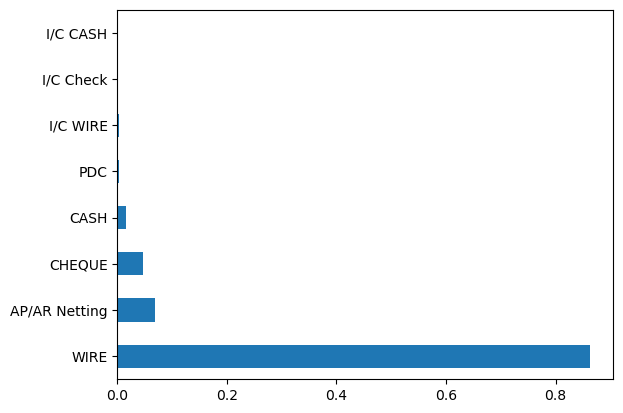

In [117]:
# check all variables one by one,starting with RECEIPT_METHOD
df_bb.RECEIPT_METHOD.value_counts(normalize=True).plot.barh()

#### Max payments are received by way of WIRE transfers.

In [118]:
# Let us look at the customer names and numbers.
# It can be inferred that one customer can have many customer numbers.
print("No of customer names are :",df_bb.CUSTOMER_NAME.nunique())
print("No of customer number are :",df_bb.CUSTOMER_NUMBER.nunique())

No of customer names are : 689
No of customer number are : 1048


In [119]:
# Let us drop CUSTOMER_NUMBER as it is not relevant
df_bb.drop("CUSTOMER_NUMBER",axis=1,inplace=True)
df_bb.shape

(42058, 13)

In [120]:
# Let us check the top 10 customers based on payments received.
df_bb.groupby("CUSTOMER_NAME")["USD Amount"].sum().sort_values(ascending=False).head(10)

CUSTOMER_NAME
SEPH Corp    6.153360e+09
ALLI Corp    1.652239e+09
FARO Corp    1.492450e+09
PARF Corp    6.955001e+08
CGR  Corp    2.508334e+08
RADW Corp    2.430579e+08
HABC Corp    2.323890e+08
AREE Corp    2.012016e+08
PCD  Corp    1.426100e+08
DUBA Corp    1.003589e+08
Name: USD Amount, dtype: float64

In [121]:
# Checking top 10 customers based on volume of transactions.
df_bb.CUSTOMER_NAME.value_counts().head(10)

SEPH Corp    4945
FARO Corp    4177
ALLI Corp    3580
PARF Corp    2409
YOUG Corp    1480
RADW Corp    1318
DEBE Corp     922
HABC Corp     764
CGR  Corp     730
REAL Corp     697
Name: CUSTOMER_NAME, dtype: int64

In [122]:
# Checkingthe payment terms of the top customers by value of transactions
df_bb.groupby(["CUSTOMER_NAME","PAYMENT_TERM"])["USD Amount"].sum().sort_values(ascending=False).head(10)

CUSTOMER_NAME  PAYMENT_TERM         
SEPH Corp      Immediate Payment        1.946815e+09
               60 Days from Inv Date    1.657258e+09
ALLI Corp      30 Days from EOM         1.091027e+09
SEPH Corp      Immediate                7.930745e+08
               30 Days from Inv Date    7.740826e+08
               60 Days from EOM         7.044823e+08
FARO Corp      30 Days from EOM         4.389920e+08
PARF Corp      30 Days from Inv Date    3.427936e+08
FARO Corp      15 Days from EOM         3.376944e+08
ALLI Corp      Immediate                2.060997e+08
Name: USD Amount, dtype: float64

#### some of the popular payment terms 30,60 days from EOM or Invoice date and Immediate payment 

In [123]:
# Checking the payment terms of the top 10 customers by volume
df_bb.groupby(["CUSTOMER_NAME","PAYMENT_TERM"])["USD Amount"].count().sort_values(ascending=False).head(10)

CUSTOMER_NAME  PAYMENT_TERM         
ALLI Corp      30 Days from EOM         2077
SEPH Corp      60 Days from Inv Date    1774
PARF Corp      30 Days from Inv Date    1684
YOUG Corp      Immediate Payment        1480
FARO Corp      15 Days from EOM         1119
               30 Days from EOM          979
RADW Corp      30 Days from EOM          765
SEPH Corp      30 Days from Inv Date     749
               Immediate Payment         670
               60 Days from EOM          558
Name: USD Amount, dtype: int64

In [124]:
# Checking the values for CLASS. Since this is data of payments received, CLASS is PMT.Hence can be dropped
df_bb.CLASS.value_counts()

PMT    42058
Name: CLASS, dtype: int64

In [125]:
# Dropping the column CLASS
df_bb.drop("CLASS",axis=1,inplace=True)
df_bb.shape

(42058, 12)

In [126]:
# There are two variables CURRENCY_CODE and INVOICE_CURRENCY_CODE.Let us if there is redundancy in this.
# Invoice currency and receipt currency can be different.No redundancy
df_bb.groupby(["INVOICE_CURRENCY_CODE","CURRENCY_CODE"])["USD Amount"].count()

INVOICE_CURRENCY_CODE  CURRENCY_CODE
AED                    AED              16212
                       EUR                  2
                       SAR                  8
                       USD                548
BHD                    AED                 43
                       BHD                 56
                       SAR                  1
                       USD                121
EUR                    AED                 35
                       EUR                439
                       SAR                  2
                       USD                 29
GBP                    GBP                 50
                       USD                  3
JOD                    AED                 15
                       USD                  3
KWD                    AED                 52
                       KWD                 10
                       SAR                  1
                       USD                386
QAR                    AED                 

In [127]:
 # Checking the records in INVOICE_ALLOCATED
df_bb.INVOICE_ALLOCATED.value_counts()

1.0721E+11          2066
1.4821E+11          1309
1.512E+11           1207
2.3021E+11          1195
1.072E+11           1177
                    ... 
PAY1521002100385       1
PAY1521002100386       1
IC15210021051762       1
IC15210021052094       1
IC15314821054110       1
Name: INVOICE_ALLOCATED, Length: 12317, dtype: int64

In [128]:
# Column is irrelevant and can be dropped.
df_bb.drop("INVOICE_ALLOCATED",axis=1,inplace=True)
df_bb.shape

(42058, 11)

In [129]:
# Let us look at the variable payment term
df_bb.PAYMENT_TERM.value_counts(normalize=True)

30 Days from EOM                                           0.206001
30 Days from Inv Date                                      0.180132
60 Days from Inv Date                                      0.127134
Immediate Payment                                          0.087237
60 Days from EOM                                           0.070165
15 Days from EOM                                           0.065005
Immediate                                                  0.064649
45 Days from Inv Date                                      0.053117
90 Days from EOM                                           0.037543
90 Days from Inv Date                                      0.025037
45 Days from EOM                                           0.022207
100% Adv Payment                                           0.017737
25 DAYS FROM EOM                                           0.007680
45 DAYS + EOM                                              0.006348
15 Days from Inv Date                           

In [130]:
# Let us club some payment terms to reduce the unqiue records
df_bb["PAYMENT_TERM"]=df_bb.PAYMENT_TERM.replace(["Immediate Payment"],"Immediate")
df_bb["PAYMENT_TERM"]=df_bb.PAYMENT_TERM.replace(["45 DAYS + EOM",],"45 Days from EOM")

In [131]:
# Checking the cum sum of the payment terms
df_bb.PAYMENT_TERM.value_counts(normalize=True).cumsum()

30 Days from EOM                                           0.206001
30 Days from Inv Date                                      0.386133
Immediate                                                  0.538019
60 Days from Inv Date                                      0.665153
60 Days from EOM                                           0.735318
15 Days from EOM                                           0.800323
45 Days from Inv Date                                      0.853440
90 Days from EOM                                           0.890984
45 Days from EOM                                           0.919540
90 Days from Inv Date                                      0.944577
100% Adv Payment                                           0.962314
25 DAYS FROM EOM                                           0.969994
15 Days from Inv Date                                      0.976271
Cash on Delivery                                           0.982453
EOM                                             

In [132]:
# Clubbing the payment terms insignificant in % terms
value_to_keep=df_bb.PAYMENT_TERM.value_counts(normalize=True).index[:11]
df_bb["PAYMENT_TERM"]= df_bb["PAYMENT_TERM"].apply(lambda x: x if x in value_to_keep else "Others")

In [133]:
df_bb.PAYMENT_TERM.value_counts(normalize=True)*100

30 Days from EOM         20.600124
30 Days from Inv Date    18.013220
Immediate                15.188549
60 Days from Inv Date    12.713396
60 Days from EOM          7.016501
15 Days from EOM          6.500547
45 Days from Inv Date     5.311712
Others                    3.768605
90 Days from EOM          3.754339
45 Days from EOM          2.855580
90 Days from Inv Date     2.503685
100% Adv Payment          1.773741
Name: PAYMENT_TERM, dtype: float64

In [134]:
# Check the variable INVOICE_CLASS
df_bb.INVOICE_CLASS.value_counts(normalize=True)*100

INV    93.328261
CM      6.464882
DM      0.206857
Name: INVOICE_CLASS, dtype: float64

#### INV and DM are receipts. CM refers to credit memo ideally should not be part of receipts.
#### Schuster will have to ensure the records are updated properly to ensure quality data

In [135]:
# On checking the variable INVOICE_CURRENCY_CODE  it is seen that most invoices were generated in SAR,followed by AED and USD.
df_bb.INVOICE_CURRENCY_CODE.value_counts(normalize=True)*100

AED    39.873508
SAR    39.091255
USD    17.604261
EUR     1.200723
KWD     1.067573
BHD     0.525465
QAR     0.418470
GBP     0.126016
ZAR     0.049931
JOD     0.042798
Name: INVOICE_CURRENCY_CODE, dtype: float64

In [136]:
# Checking INVOICE_TYPE, Most the payments received are for goods
df_bb.INVOICE_TYPE.value_counts(normalize=True)

Goods        0.527533
Non Goods    0.472467
Name: INVOICE_TYPE, dtype: float64

#### Target Variable

In [137]:
# Creating the target variable using RECEIPT DATE and DUE DATE.
# 1 refers to cases where payment is delayed and 0 where payment is within due date
df_bb["TARGET"]=(df_bb["RECEIPT_DATE"]>df_bb["DUE_DATE"]).astype(int)

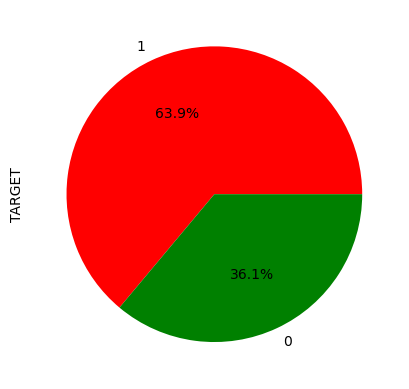

In [138]:
# Let us see the data split of the target variable
colors = ['red', 'green', 'blue', 'yellow', 'orange']
np.round(df_bb.TARGET.value_counts(normalize=True)*100,2).plot.pie(colors=colors, autopct="%.1f%%")
plt.show()

#### Derived Features

In [139]:
# creating the variable - payment time days which will be used in customer segmentation.This will help identify early, timely payments and delayed payments.
df_bb["PAYMENT_TIME_DAYS"]=(df_bb["RECEIPT_DATE"]-df_bb["DUE_DATE"]).dt.days

In [140]:
# let us look at few records after updation
df_bb.head()

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,TARGET,PAYMENT_TIME_DAYS
0,WIRE,C EA Corp,2021-04-20,USD,101018.63040,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1,111
1,WIRE,RADW Corp,2021-01-31,SAR,48990.21133,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1,3
2,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0,-29
3,WIRE,FARO Corp,2021-01-31,SAR,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,17
4,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,17


In [141]:
# We can see that the minimum value is negative 340 that means the customer has paid almost a year in advance
df_bb.PAYMENT_TIME_DAYS.describe()

count    42058.000000
mean        78.830591
std        220.199745
min       -340.000000
25%         -6.000000
50%         15.000000
75%         54.000000
max       3873.000000
Name: PAYMENT_TIME_DAYS, dtype: float64

In [142]:
# Let us look at the records where payment time is less than 0 days
# These cases where the customer have paid before due date.
df_bb[df_bb["PAYMENT_TIME_DAYS"]<0]

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,TARGET,PAYMENT_TIME_DAYS
2,WIRE,RADW Corp,2021-01-31,SAR,41991.609710,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0,-29
16,WIRE,RADW Corp,2021-03-15,SAR,4665.734413,2021-02-25,2021-03-27,30 Days from Inv Date,INV,SAR,Non Goods,0,-12
47,WIRE,RADW Corp,2021-06-30,SAR,53655.945740,2021-06-24,2021-07-24,30 Days from Inv Date,INV,SAR,Non Goods,0,-24
48,WIRE,ALLI Corp,2021-01-13,AED,6448.740000,2020-12-23,2021-01-30,30 Days from EOM,INV,AED,Non Goods,0,-17
56,WIRE,QATA Corp,2021-01-19,AED,38302.390000,2021-01-28,2021-01-28,Immediate,CM,USD,Non Goods,0,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93907,WIRE,TRAF Corp,2021-06-07,AED,17656.441120,2021-05-27,2021-06-26,30 Days from Inv Date,INV,USD,Non Goods,0,-19
93912,WIRE,ANAN Corp,2021-04-08,USD,6398.740000,2021-03-11,2021-04-10,30 Days from Inv Date,INV,AED,Goods,0,-2
93923,WIRE,PEAR Corp,2021-04-01,USD,59914.500000,2021-02-02,2021-04-03,60 Days from Inv Date,INV,USD,Goods,0,-2
93925,WIRE,PEAR Corp,2021-04-01,USD,59914.500000,2021-02-14,2021-04-13,60 Days from Inv Date,INV,USD,Goods,0,-12


In [143]:
# Finding lower threshold using 1.5 times of the Ineter quartile range(IQR)
IQR=54-(-6)
IQR
Q1=(-6)-(1.5*(IQR))
Q1

-96.0

In [144]:
# Let us see the records where payment is made more than 100 days before due date
df_bb[df_bb["PAYMENT_TIME_DAYS"]<-100]

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,TARGET,PAYMENT_TIME_DAYS
4604,WIRE,AL M Corp,2021-02-03,SAR,833.372152,2021-03-24,2021-06-22,90 Days from Inv Date,INV,SAR,Non Goods,0,-139
12196,WIRE,BACC Corp,2021-01-07,EUR,13357.930000,2021-01-04,2021-04-30,90 Days from EOM,INV,EUR,Non Goods,0,-113
12241,WIRE,BERN Corp,2021-01-20,EUR,16881.980000,2021-04-30,2021-06-30,60 Days from EOM,INV,EUR,Non Goods,0,-161
12242,WIRE,BERN Corp,2021-01-20,EUR,16881.980000,2021-03-30,2021-05-30,60 Days from EOM,INV,EUR,Non Goods,0,-130
12244,WIRE,BERN Corp,2021-01-20,EUR,16881.980000,2021-03-31,2021-05-30,60 Days from Inv Date,INV,EUR,Non Goods,0,-130
12248,WIRE,BERN Corp,2021-01-20,EUR,16881.980000,2021-03-31,2021-06-30,90 Days from EOM,INV,EUR,Non Goods,0,-161
12252,WIRE,BERN Corp,2021-01-20,EUR,16881.980000,2021-03-30,2021-06-30,90 Days from EOM,INV,EUR,Non Goods,0,-161
12288,WIRE,BERN Corp,2021-01-20,EUR,16881.980000,2021-04-30,2021-07-30,90 Days from EOM,INV,EUR,Non Goods,0,-191
12295,WIRE,BERN Corp,2021-01-20,EUR,16881.980000,2021-04-30,2021-06-29,60 Days from Inv Date,INV,EUR,Non Goods,0,-160
12402,WIRE,CAMI Corp,2021-01-26,USD,35.280000,2021-05-19,2021-05-19,100% Adv Payment,INV,USD,Non Goods,0,-113


In [145]:
# Let us derive the feature INVOICE_MONTH using INVOICE_CREATION_DATE
df_bb["INVOICE_MONTH"]=df_bb["INVOICE_CREATION_DATE"].dt.month
df_bb.head()

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,TARGET,PAYMENT_TIME_DAYS,INVOICE_MONTH
0,WIRE,C EA Corp,2021-04-20,USD,101018.63040,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1,111,11
1,WIRE,RADW Corp,2021-01-31,SAR,48990.21133,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1,3,12
2,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0,-29,1
3,WIRE,FARO Corp,2021-01-31,SAR,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,17,12
4,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,17,12


In [146]:
# Deriving feature INVOICE_YEAR
df_bb["INVOICE_YEAR"]=df_bb["INVOICE_CREATION_DATE"].dt.year
df_bb.head()

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,TARGET,PAYMENT_TIME_DAYS,INVOICE_MONTH,INVOICE_YEAR
0,WIRE,C EA Corp,2021-04-20,USD,101018.63040,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1,111,11,2020
1,WIRE,RADW Corp,2021-01-31,SAR,48990.21133,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1,3,12,2020
2,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0,-29,1,2021
3,WIRE,FARO Corp,2021-01-31,SAR,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,17,12,2020
4,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,17,12,2020


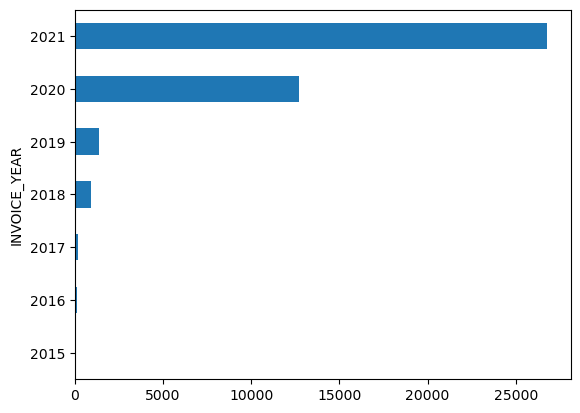

In [147]:
# Plotting the INVOICE YEAR to see the volume in year wise receipts 
# Payments received even pertain to invoices which are very old. This explains the reason the payment time days were very high
df_bb.groupby("INVOICE_YEAR")["TARGET"].count().plot.barh()
plt.show()


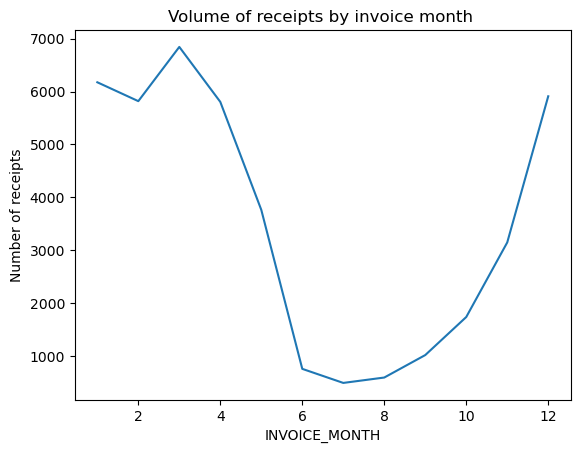

In [148]:
# Let us see the plot of records month wise.
# Out of the receipts, highest invoices pertained to March followed by January
df_bb.groupby("INVOICE_MONTH")["TARGET"].count().plot()
plt.title("Volume of receipts by invoice month ")
plt.ylabel("Number of receipts")
plt.show()

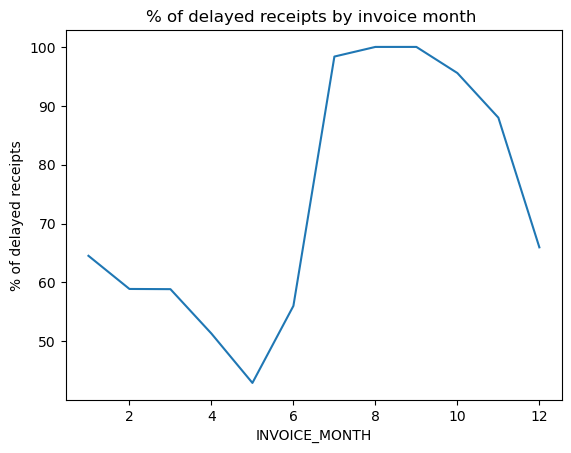

In [149]:
# Let us see if the delay in payment pertain to invoices of any particular month
# Invoices raised in Jul-Sep are delayed in payment by customers.
(df_bb.groupby("INVOICE_MONTH")["TARGET"].mean()*100).plot()
plt.title("% of delayed receipts by invoice month ")
plt.ylabel("% of delayed receipts")
plt.show()

In [150]:
# Let us derive due month from the variable DUE_DATE
df_bb["DUE_MONTH"]=df_bb["DUE_DATE"].dt.month
df_bb.head()

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,TARGET,PAYMENT_TIME_DAYS,INVOICE_MONTH,INVOICE_YEAR,DUE_MONTH
0,WIRE,C EA Corp,2021-04-20,USD,101018.63040,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1,111,11,2020,12
1,WIRE,RADW Corp,2021-01-31,SAR,48990.21133,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1,3,12,2020,1
2,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0,-29,1,2021,3
3,WIRE,FARO Corp,2021-01-31,SAR,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,17,12,2020,1
4,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,17,12,2020,1


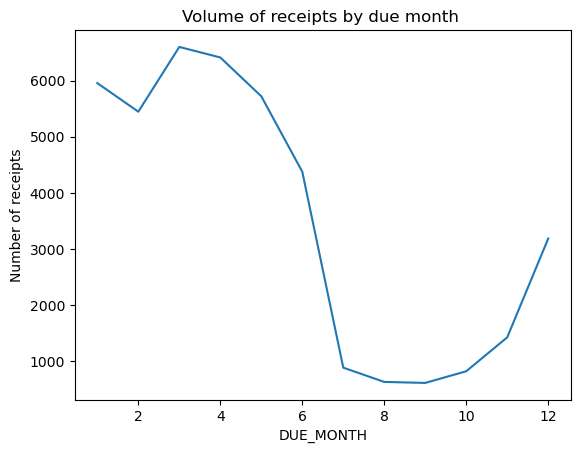

In [151]:
# Let us see the plot for due month.
# Out of the total recipts, most invoices for which payment received were due in March.
# Invoices generated and dues were highest in March
df_bb.groupby("DUE_MONTH")["TARGET"].count().plot()
plt.title("Volume of receipts by due month ")
plt.ylabel("Number of receipts")
plt.show()

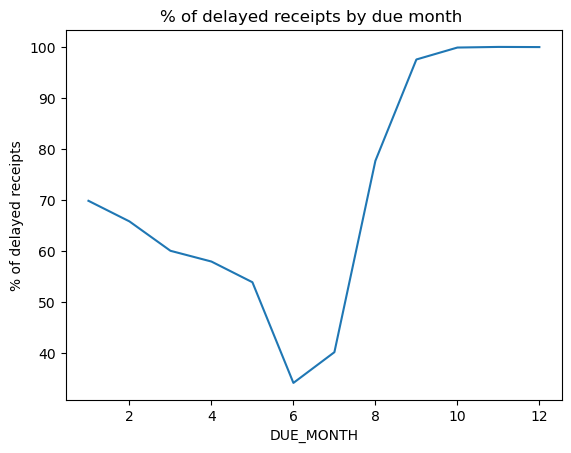

In [152]:
# Let us look at the plot of default rate by the due months
# Invoices due for receipt in the period Oct-Dec have been delayed
(df_bb.groupby("DUE_MONTH")["TARGET"].mean()*100).plot()
plt.title("% of delayed receipts by due month ")
plt.ylabel("% of delayed receipts")
plt.show()

In [153]:
# Let us see if the day of the week has any bearing on the delay
# Creating the column DUE_DAY and INVOICE_DAY
# Please note here 0 refers to Monday and 6 refers to sunday
df_bb["DUE_DAY"]=df_bb["DUE_DATE"].dt.weekday
df_bb["INVOICE_DAY"]=df_bb["INVOICE_CREATION_DATE"].dt.weekday
df_bb.head()

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,TARGET,PAYMENT_TIME_DAYS,INVOICE_MONTH,INVOICE_YEAR,DUE_MONTH,DUE_DAY,INVOICE_DAY
0,WIRE,C EA Corp,2021-04-20,USD,101018.63040,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1,111,11,2020,12,2,0
1,WIRE,RADW Corp,2021-01-31,SAR,48990.21133,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1,3,12,2020,1,3,1
2,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0,-29,1,2021,3,0,5
3,WIRE,FARO Corp,2021-01-31,SAR,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,17,12,2020,1,3,1
4,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,17,12,2020,1,3,1


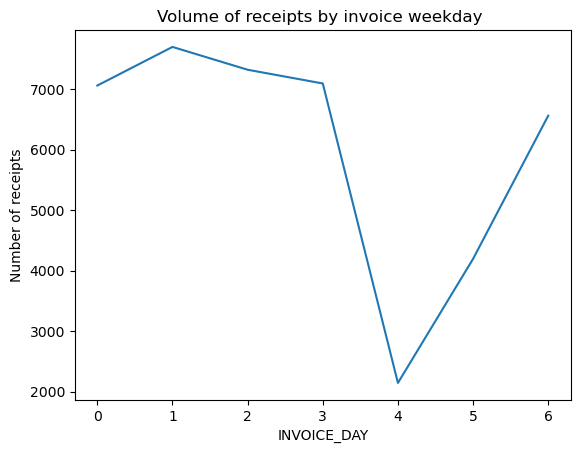

In [154]:
# Schuster raises very less invoices on friday of the week
df_bb.groupby("INVOICE_DAY")["TARGET"].count().plot()
plt.title("Volume of receipts by invoice weekday ")
plt.ylabel("Number of receipts")
plt.show()

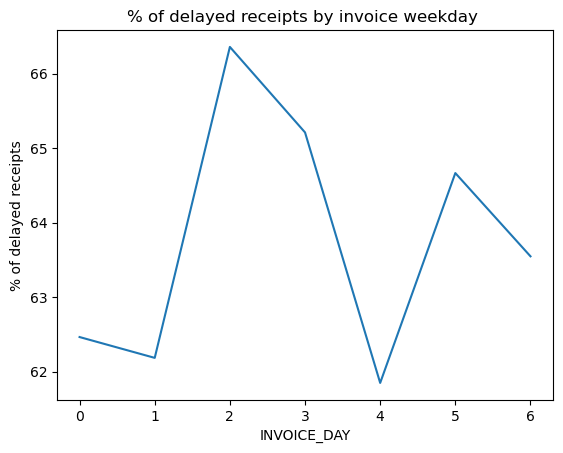

In [155]:
# invoices raised on wednesday have the highest delay rate
(df_bb.groupby("INVOICE_DAY")["TARGET"].mean()*100).plot()
plt.title("% of delayed receipts by invoice weekday ")
plt.ylabel("% of delayed receipts")
plt.show()

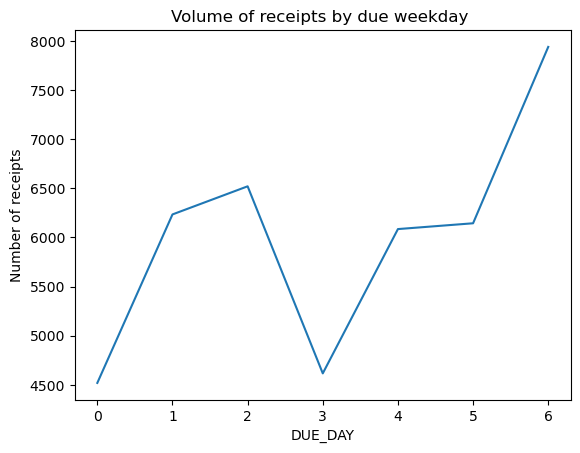

In [156]:
# Of the received payments, highest number of invoices were due on sunday
df_bb.groupby("DUE_DAY")["TARGET"].count().plot()
plt.title("Volume of receipts by due weekday ")
plt.ylabel("Number of receipts")
plt.show()

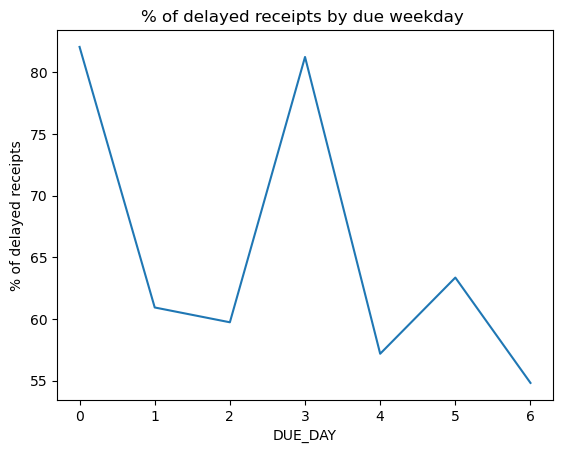

In [157]:
# Invoices due on Monday and thursday have high delay rates
(df_bb.groupby("DUE_DAY")["TARGET"].mean()*100).plot()
plt.title("% of delayed receipts by due weekday ")
plt.ylabel("% of delayed receipts")
plt.show()

In [158]:
# All variables have been looked into
df_bb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42058 entries, 0 to 93931
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         42058 non-null  object        
 1   CUSTOMER_NAME          42058 non-null  object        
 2   RECEIPT_DATE           42058 non-null  datetime64[ns]
 3   CURRENCY_CODE          42058 non-null  object        
 4   USD Amount             42058 non-null  float64       
 5   INVOICE_CREATION_DATE  42058 non-null  datetime64[ns]
 6   DUE_DATE               42058 non-null  datetime64[ns]
 7   PAYMENT_TERM           42058 non-null  object        
 8   INVOICE_CLASS          42058 non-null  object        
 9   INVOICE_CURRENCY_CODE  42058 non-null  object        
 10  INVOICE_TYPE           42058 non-null  object        
 11  TARGET                 42058 non-null  int32         
 12  PAYMENT_TIME_DAYS      42058 non-null  int64         
 13  I

In [159]:
# Let us look at the numeric variables as created few variables
df_bb.describe()

,USD Amount,TARGET,PAYMENT_TIME_DAYS,INVOICE_MONTH,INVOICE_YEAR,DUE_MONTH,DUE_DAY,INVOICE_DAY
count,4.205800e+04,42058.000000,42058.000000,42058.000000,42058.000000,42058.000000,42058.000000,42058.000000
mean,3.041674e+05,0.639094,78.830591,5.353084,2020.537948,4.657687,3.229184,2.674973
std,7.109582e+05,0.480269,220.199745,3.930782,0.739735,3.172182,2.022473,2.040550
min,1.287743e+00,0.000000,-340.000000,1.000000,2015.000000,1.000000,0.000000,0.000000
25%,1.579608e+04,0.000000,-6.000000,2.000000,2020.000000,2.000000,1.000000,1.000000
50%,6.861197e+04,1.000000,15.000000,4.000000,2021.000000,4.000000,3.000000,2.000000
75%,2.754132e+05,1.000000,54.000000,10.000000,2021.000000,6.000000,5.000000,5.000000
max,1.084983e+07,1.000000,3873.000000,12.000000,2021.000000,12.000000,6.000000,6.000000


<Axes: ylabel='TARGET'>

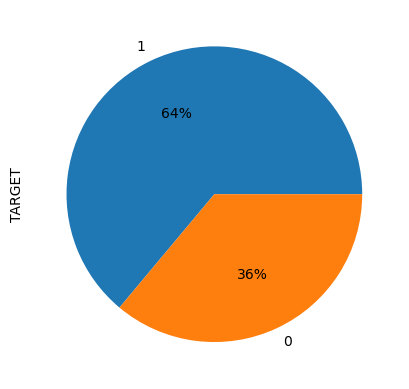

In [160]:
# Let us see the split of the target variable once again. No major change.
np.round(df_bb.TARGET.value_counts(normalize=True)*100,2).plot.pie(autopct="%.f%%")

#### Categorisation of variables

In [161]:
# Let us check the column names to categorise the same
df_bb.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'RECEIPT_DATE', 'CURRENCY_CODE',
       'USD Amount', 'INVOICE_CREATION_DATE', 'DUE_DATE', 'PAYMENT_TERM',
       'INVOICE_CLASS', 'INVOICE_CURRENCY_CODE', 'INVOICE_TYPE', 'TARGET',
       'PAYMENT_TIME_DAYS', 'INVOICE_MONTH', 'INVOICE_YEAR', 'DUE_MONTH',
       'DUE_DAY', 'INVOICE_DAY'],
      dtype='object')

In [162]:
# categorising the variables
var_cat=["RECEIPT_METHOD",'CURRENCY_CODE','PAYMENT_TERM', 'INVOICE_CLASS', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE']
var_num=["USD Amount","PAYMENT_TIME_DAYS","TARGET",'INVOICE_MONTH', 'INVOICE_YEAR', 'DUE_MONTH',
       'DUE_DAY', 'INVOICE_DAY']
var_oth=['CUSTOMER_NAME', 'RECEIPT_DATE','INVOICE_CREATION_DATE', 'DUE_DATE']

## 3. Data Visualisation

#### Univariate , Bivariate Analysis

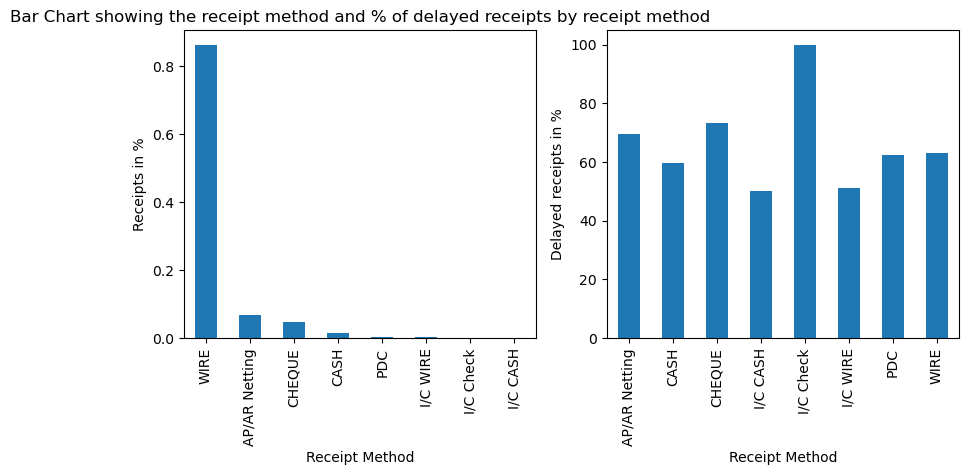

In [163]:
# Amount received mostly through WIRE, delay in receipts almost 100% in case of I/C check.
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
df_bb["RECEIPT_METHOD"].value_counts(normalize=True).plot.bar()
plt.title("Bar Chart showing the receipt method and % of delayed receipts by receipt method",loc="center")
plt.xlabel("Receipt Method")
plt.ylabel("Receipts in %")

plt.subplot(1,2,2)
(df_bb.groupby("RECEIPT_METHOD")["TARGET"].mean()*100).plot.bar()
plt.xlabel("Receipt Method")
plt.ylabel("Delayed receipts in %")
plt.show()

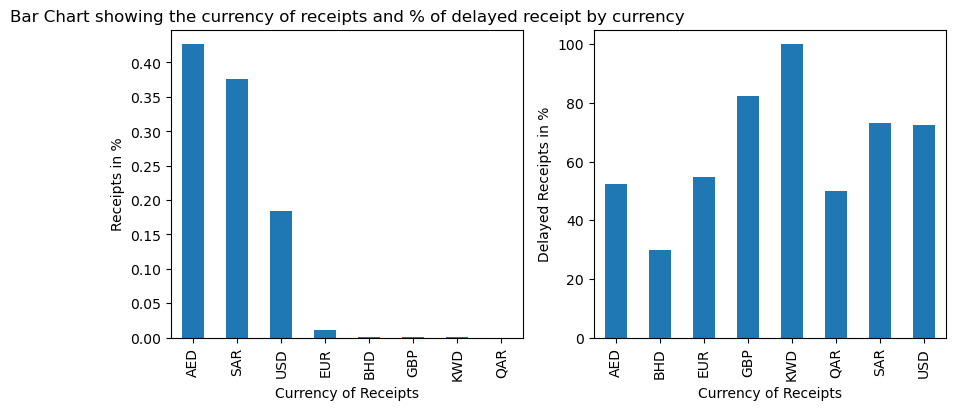

In [164]:
# Receipts are more in AED followed by SAR and USD. Delay in receipts highest where receipts are in KWD followed by GBP.
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
df_bb["CURRENCY_CODE"].value_counts(normalize=True).plot.bar()
plt.title("Bar Chart showing the currency of receipts and % of delayed receipt by currency",loc="center")
plt.xlabel("Currency of Receipts")
plt.ylabel("Receipts in %")

plt.subplot(1,2,2)
(df_bb.groupby("CURRENCY_CODE")["TARGET"].mean()*100).plot.bar()
plt.xlabel("Currency of Receipts")
plt.ylabel("Delayed Receipts in %")
plt.show()

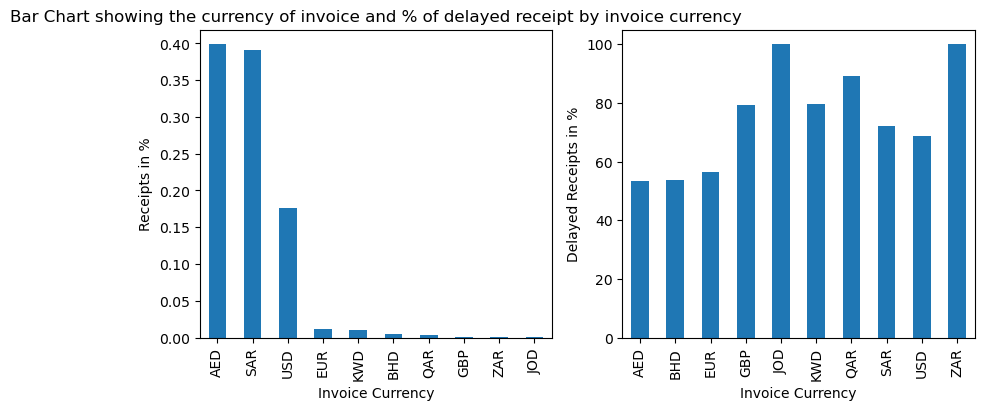

In [165]:
# Delay in receipts where invoicing currency in JOD and ZAR- 100% of the cases
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
df_bb["INVOICE_CURRENCY_CODE"].value_counts(normalize=True).plot.bar()
plt.title("Bar Chart showing the currency of invoice and % of delayed receipt by invoice currency",loc="center")
plt.xlabel("Invoice Currency")
plt.ylabel("Receipts in %")

plt.subplot(1,2,2)
(df_bb.groupby("INVOICE_CURRENCY_CODE")["TARGET"].mean()*100).plot.bar()
plt.xlabel("Invoice Currency")
plt.ylabel("Delayed Receipts in %")
plt.show()

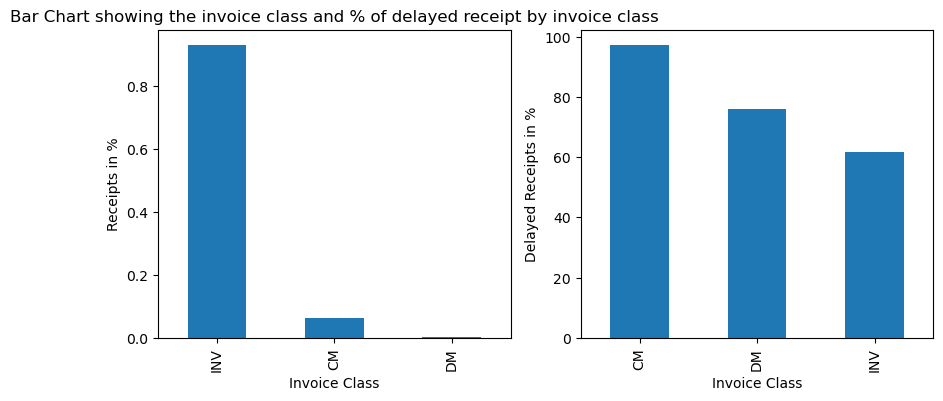

In [166]:
# Though few in number, very significant receipts delays in CM
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
df_bb["INVOICE_CLASS"].value_counts(normalize=True).plot.bar()
plt.title("Bar Chart showing the invoice class and % of delayed receipt by invoice class",loc="center")
plt.xlabel("Invoice Class")
plt.ylabel("Receipts in %")

plt.subplot(1,2,2)
(df_bb.groupby("INVOICE_CLASS")["TARGET"].mean()*100).plot.bar()
plt.xlabel("Invoice Class")
plt.ylabel("Delayed Receipts in %")
plt.show()

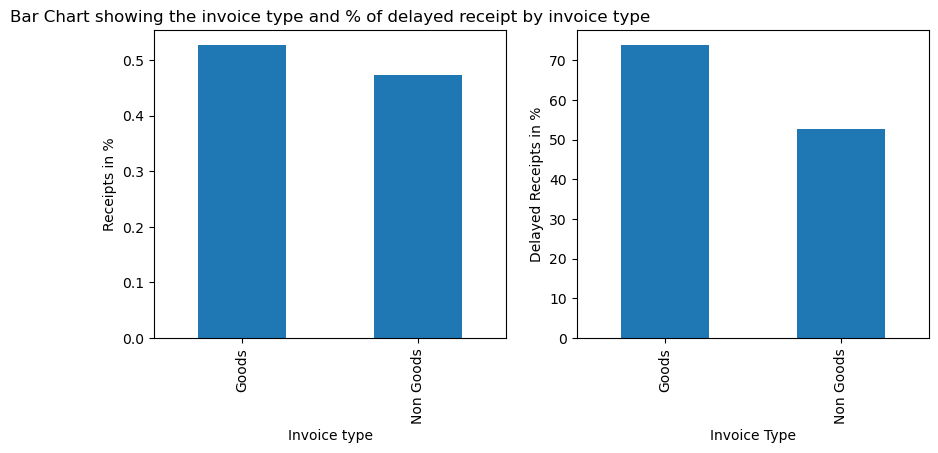

In [167]:
# No significant observation
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
df_bb["INVOICE_TYPE"].value_counts(normalize=True).plot.bar()
plt.title("Bar Chart showing the invoice type and % of delayed receipt by invoice type",loc="center")
plt.xlabel("Invoice type")
plt.ylabel("Receipts in %")

plt.subplot(1,2,2)
(df_bb.groupby("INVOICE_TYPE")["TARGET"].mean()*100).plot.bar()
plt.xlabel("Invoice Type")
plt.ylabel("Delayed Receipts in %")
plt.show()

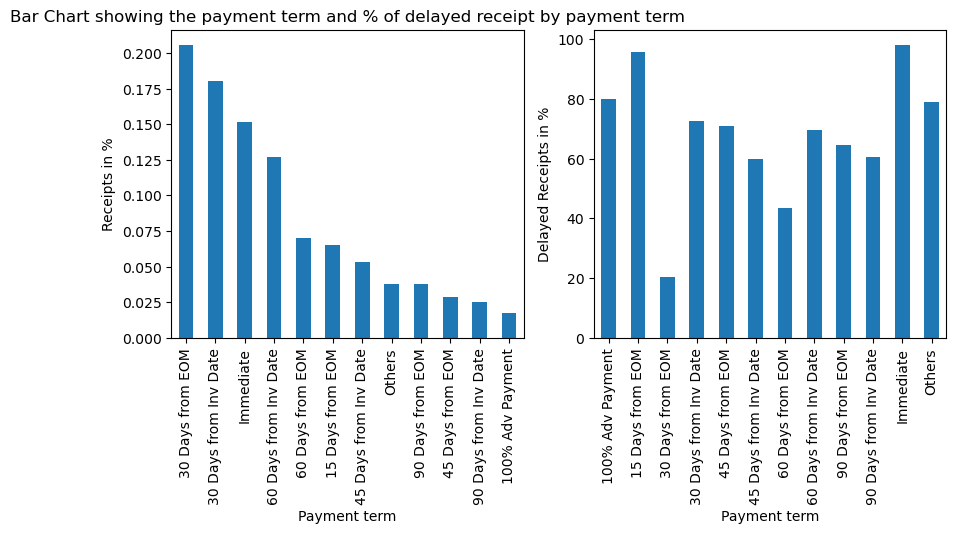

In [168]:
# Payment terms of Immediate and 15 days from EOM see delays most times.
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
df_bb["PAYMENT_TERM"].value_counts(normalize=True).plot.bar()
plt.title("Bar Chart showing the payment term and % of delayed receipt by payment term",loc="center")
plt.xlabel("Payment term")
plt.ylabel("Receipts in %")

plt.subplot(1,2,2)
(df_bb.groupby("PAYMENT_TERM")["TARGET"].mean()*100).plot.bar()
plt.xlabel("Payment term")
plt.ylabel("Delayed Receipts in %")
plt.show()

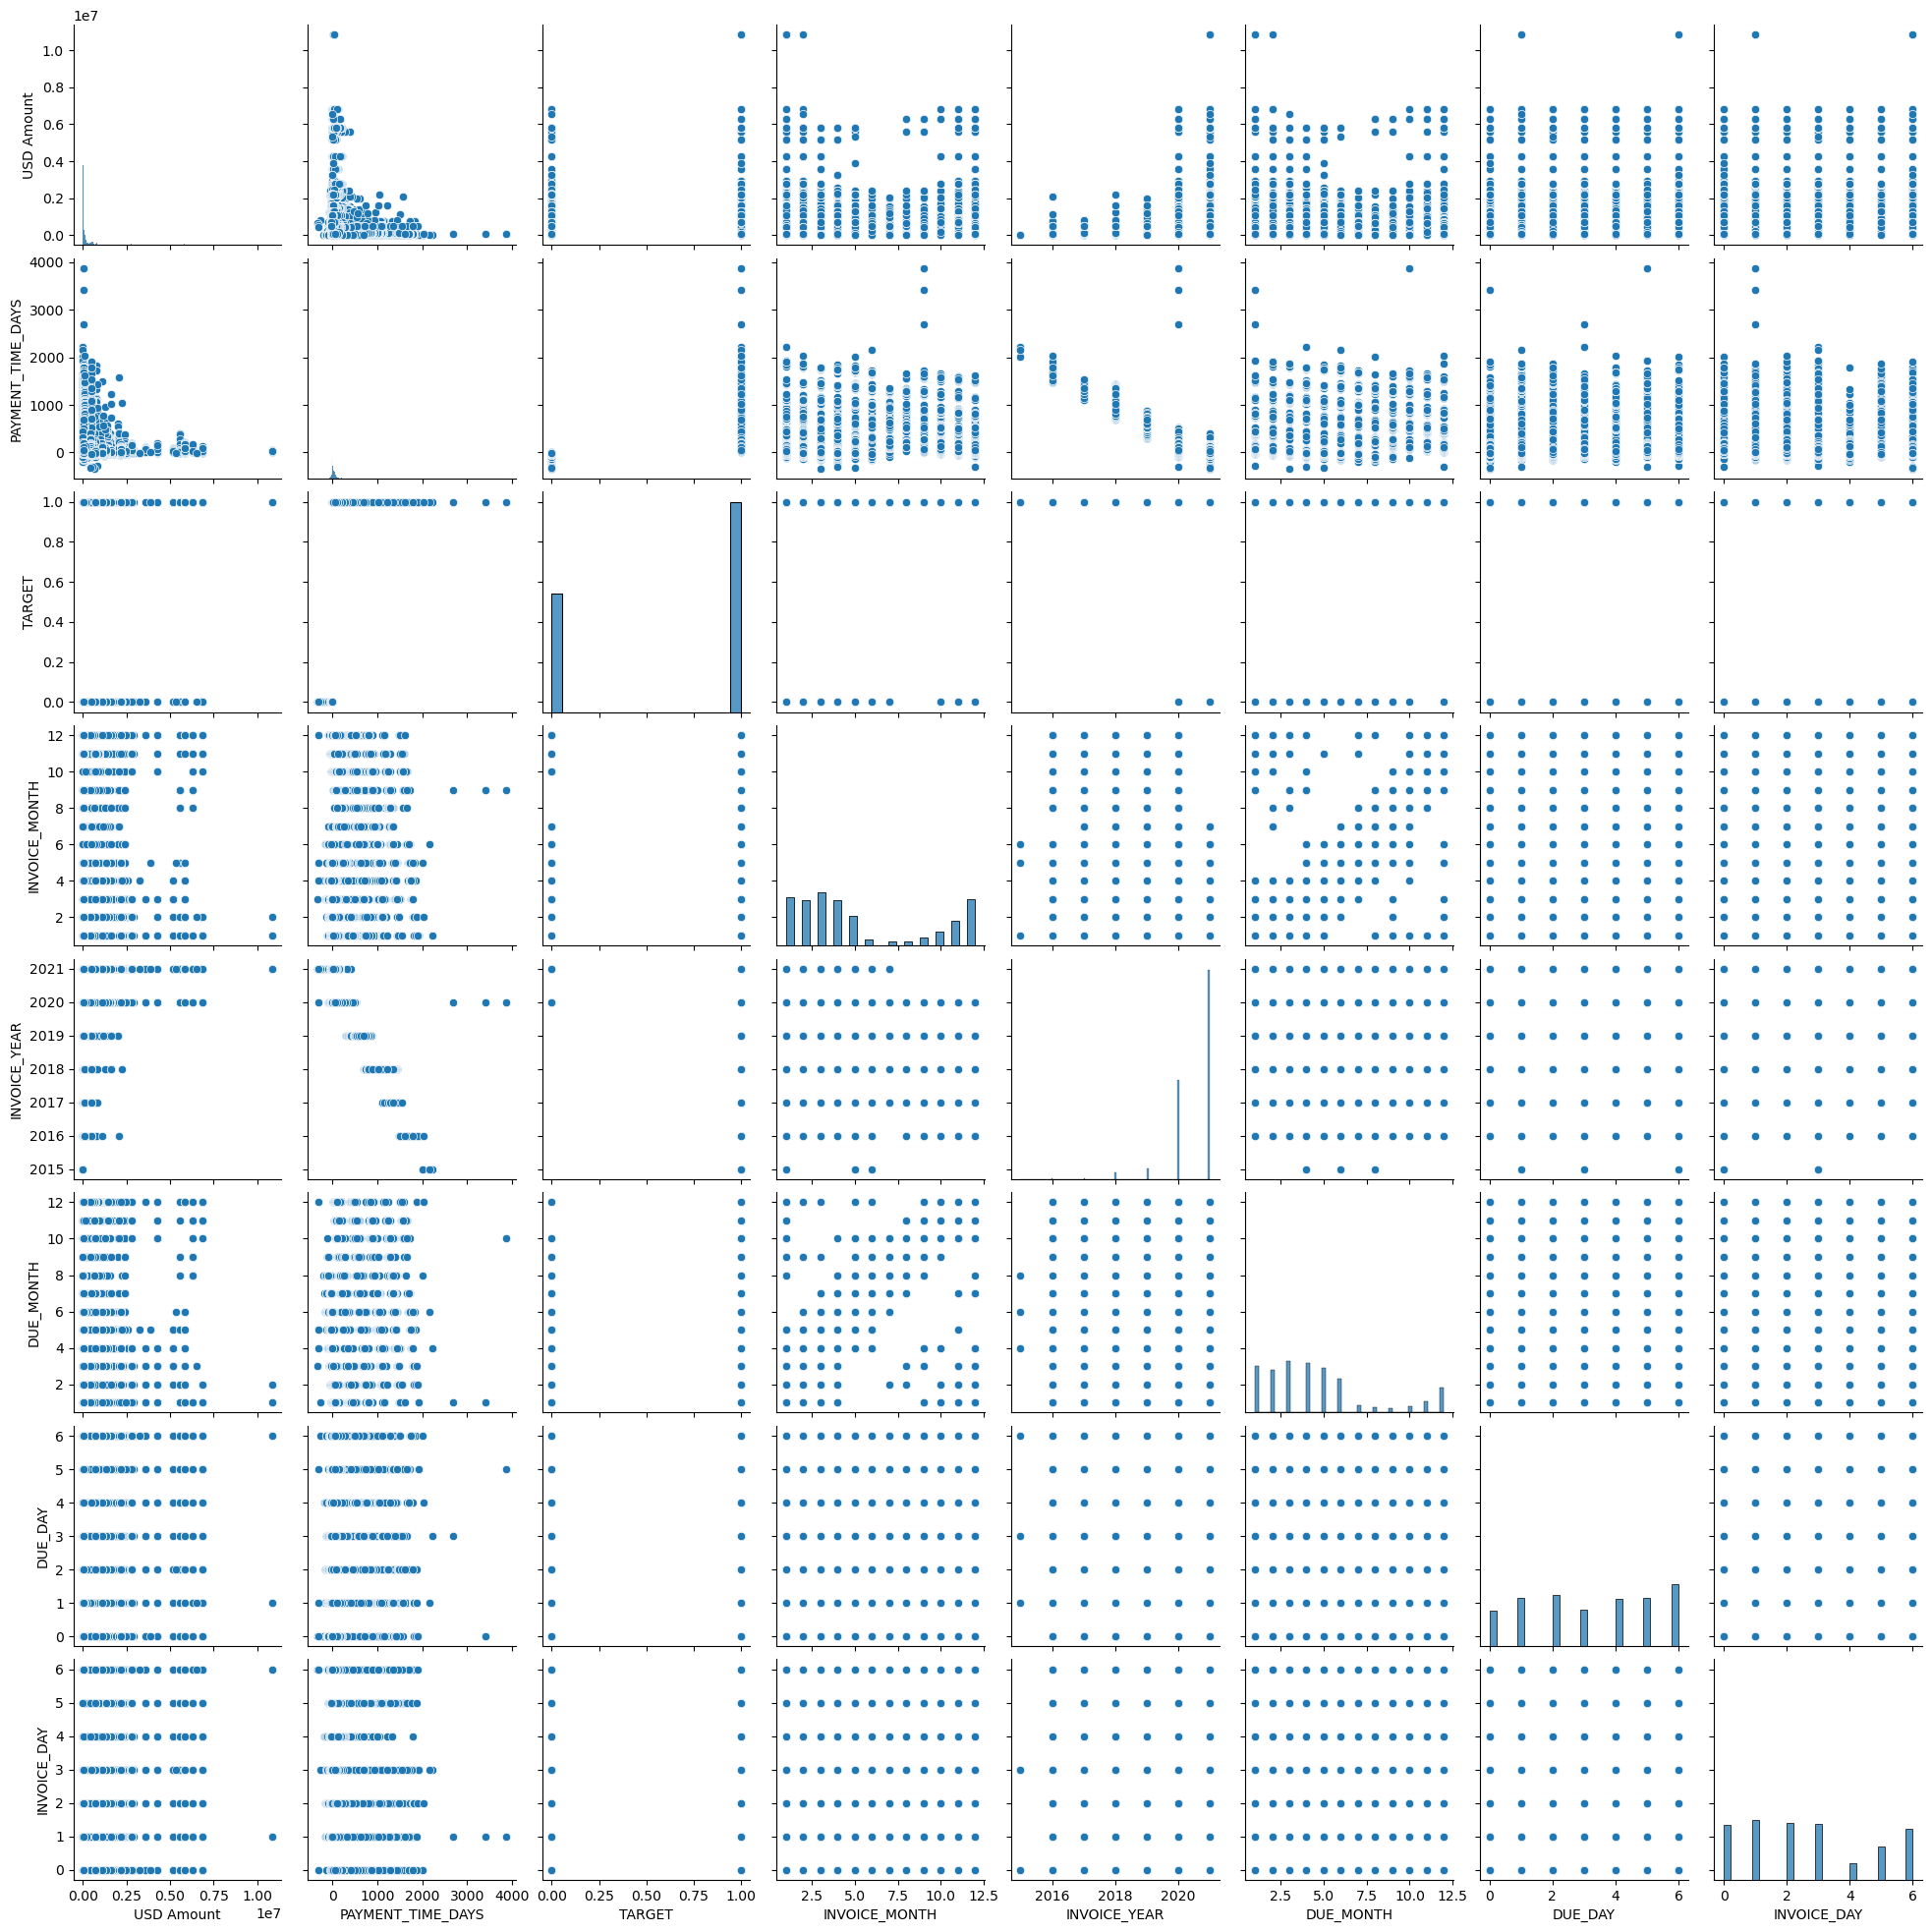

In [169]:
# Univariate Analysis of numeric variables has been done in the checking for outliers step. 
sns.pairplot(data= df_bb,vars=var_num)
plt.show()

Boxplot RECEIPT_METHOD Vs USD Amount


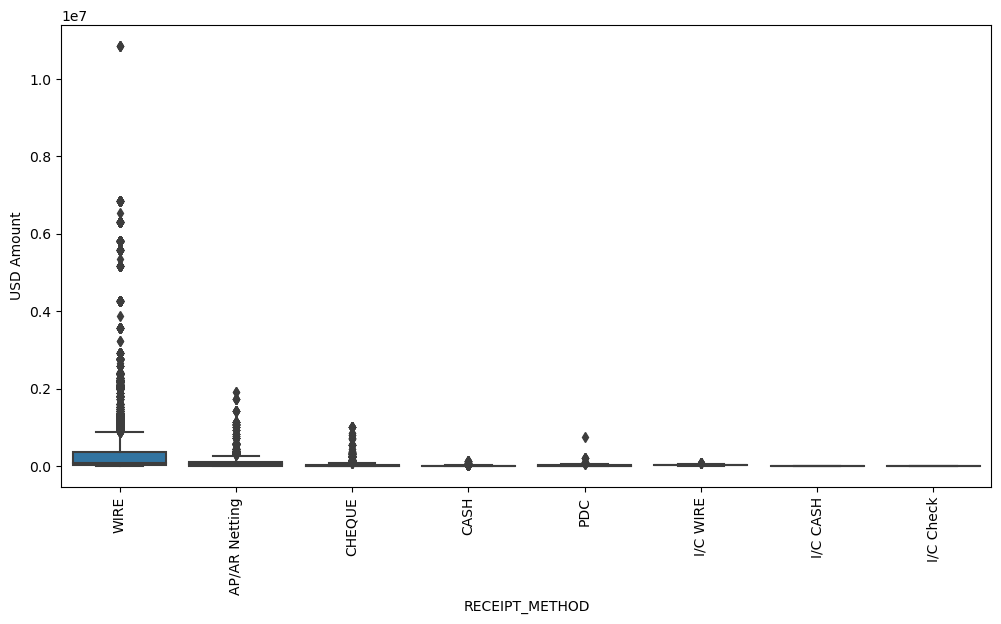

Boxplot CURRENCY_CODE Vs USD Amount


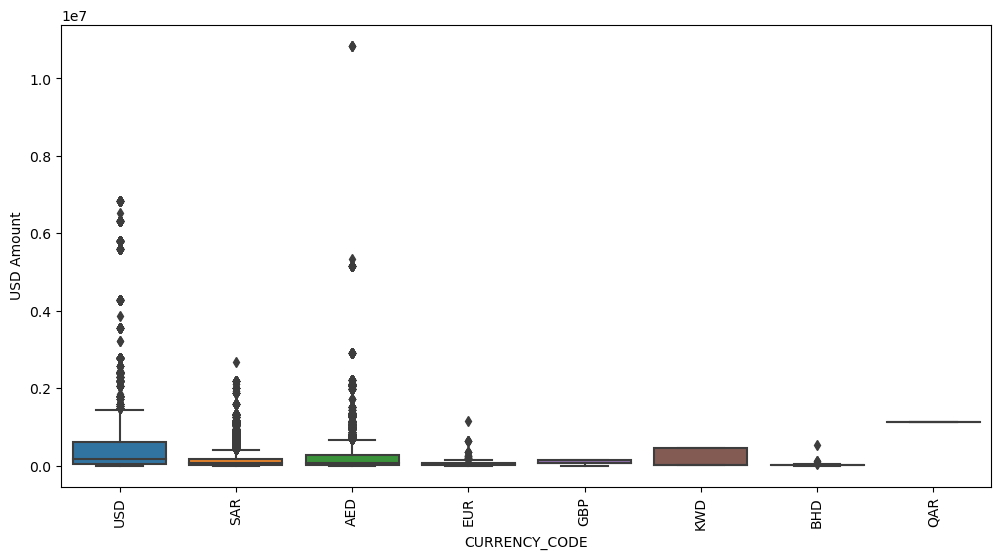

Boxplot PAYMENT_TERM Vs USD Amount


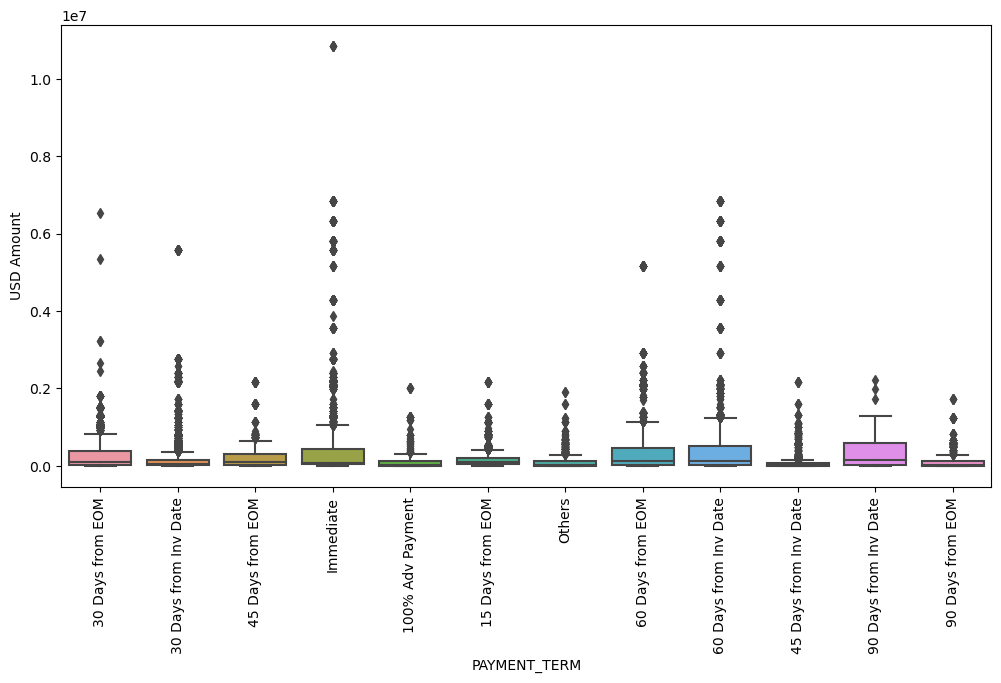

Boxplot INVOICE_CLASS Vs USD Amount


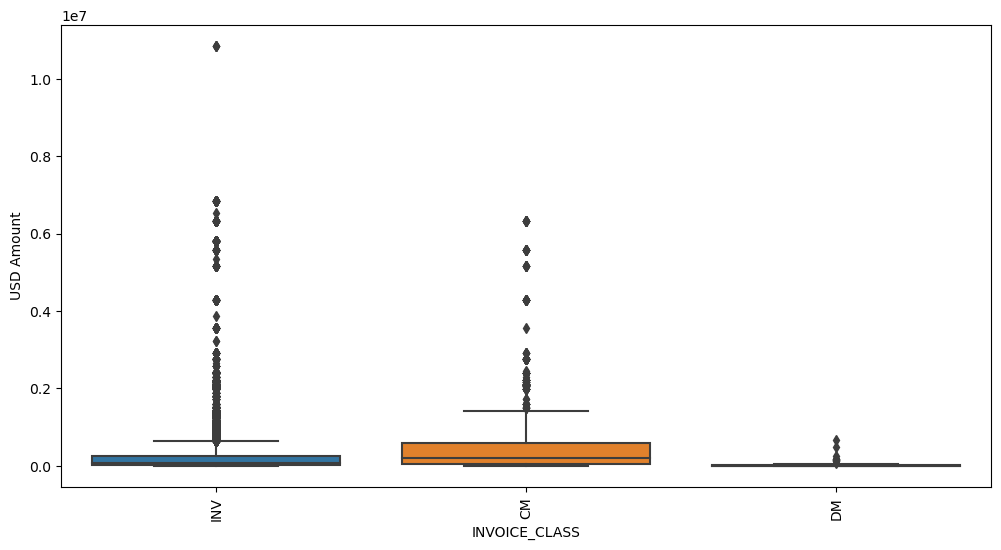

Boxplot INVOICE_CURRENCY_CODE Vs USD Amount


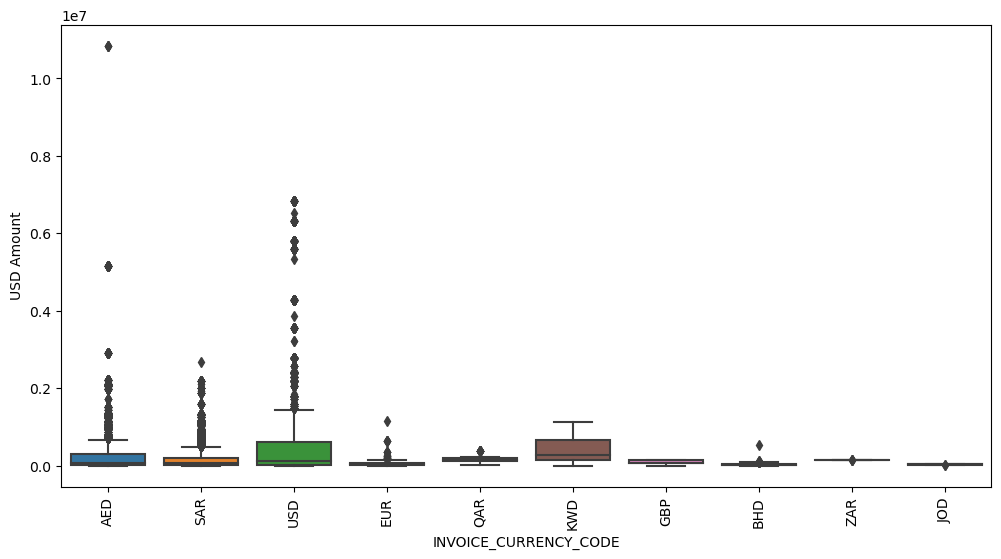

Boxplot INVOICE_TYPE Vs USD Amount


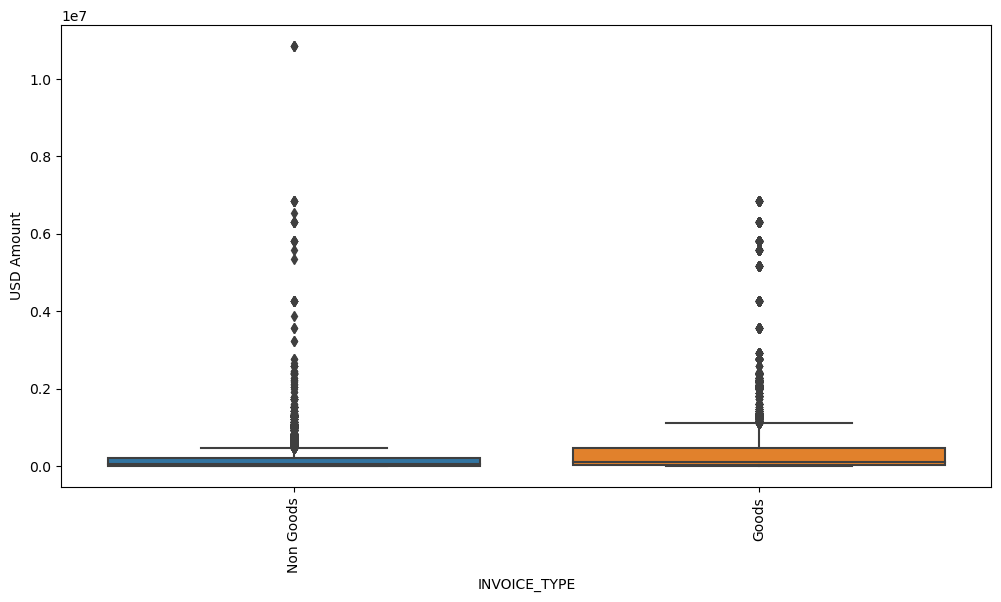

In [170]:
# Bivariate Analysis between numeric and categorical variables
for i in var_cat:        
    plt.figure(figsize=(12,6))
    print("Boxplot", i, "Vs USD Amount")
    sns.boxplot(data=df_bb, x= i, y="USD Amount")
    plt.xticks(rotation=90)
    plt.show()

Boxplot RECEIPT_METHOD Vs PAYMENT_TIME_DAYS


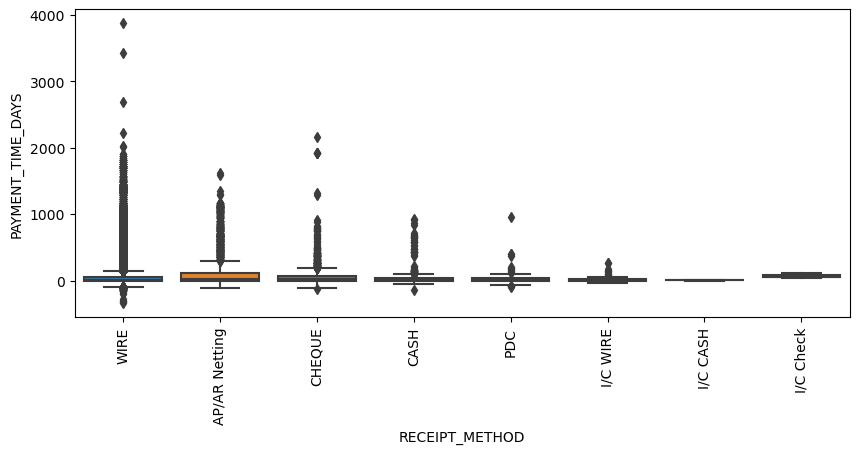

Boxplot CURRENCY_CODE Vs PAYMENT_TIME_DAYS


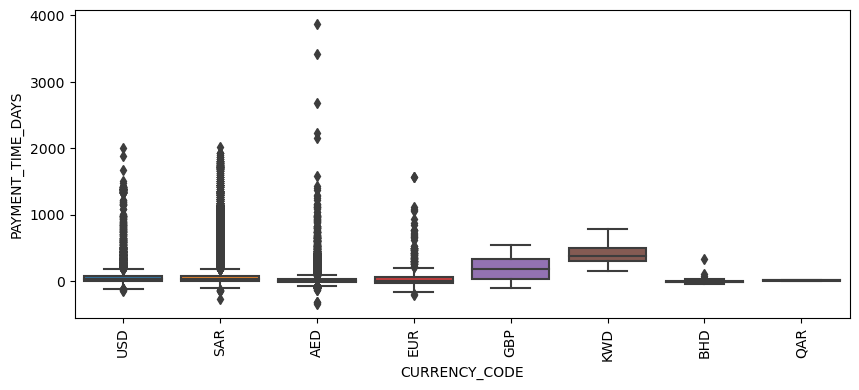

Boxplot PAYMENT_TERM Vs PAYMENT_TIME_DAYS


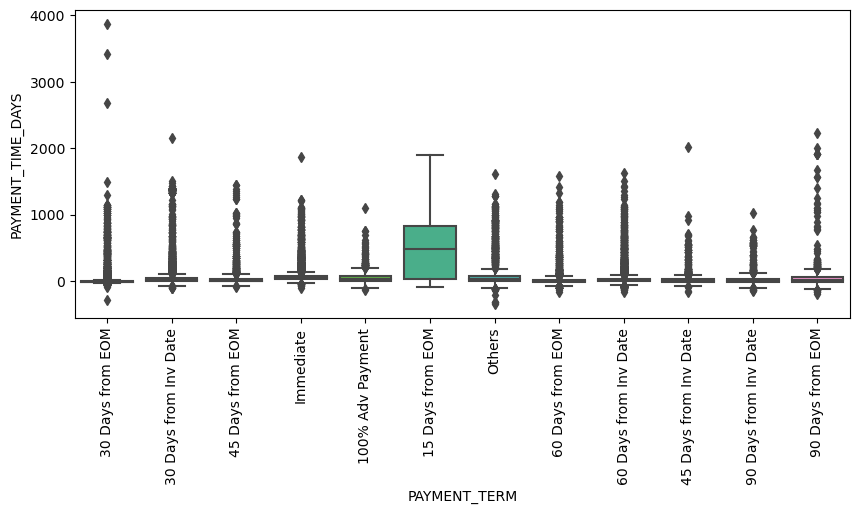

Boxplot INVOICE_CLASS Vs PAYMENT_TIME_DAYS


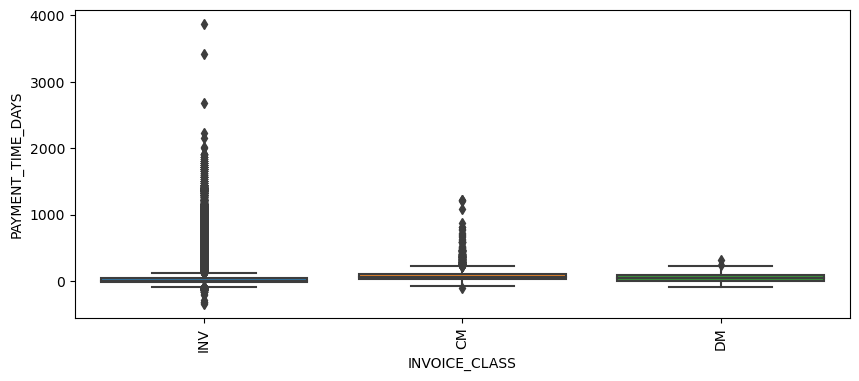

Boxplot INVOICE_CURRENCY_CODE Vs PAYMENT_TIME_DAYS


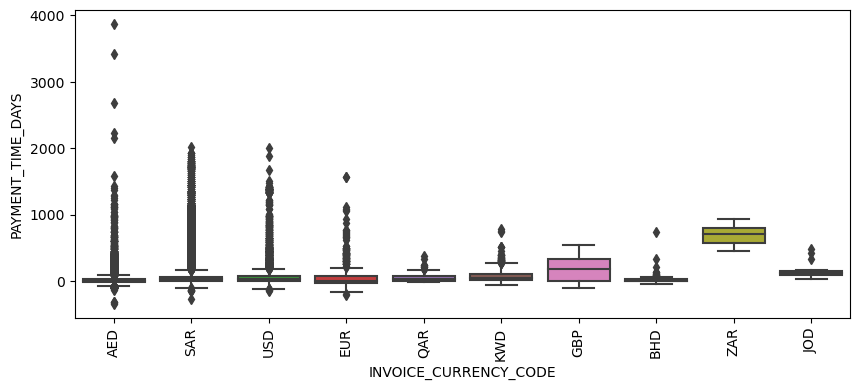

Boxplot INVOICE_TYPE Vs PAYMENT_TIME_DAYS


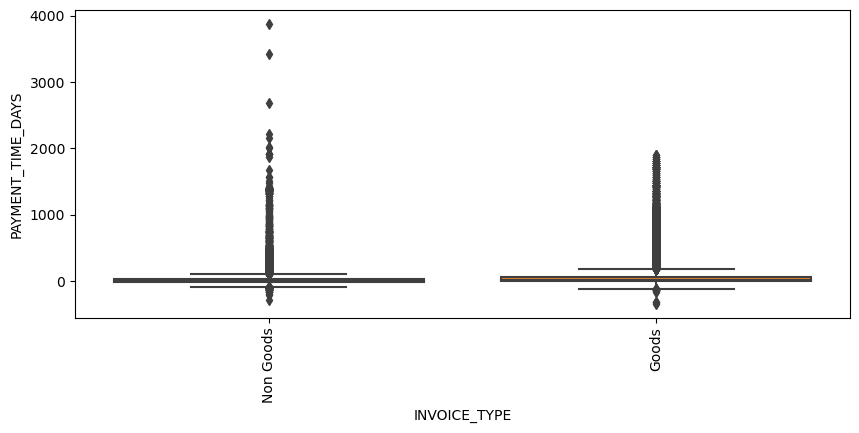

In [171]:
for i in var_cat:        
    plt.figure(figsize=(10,4))
    print("Boxplot", i, "Vs PAYMENT_TIME_DAYS")
    sns.boxplot(data=df_bb, x= i, y="PAYMENT_TIME_DAYS")
    plt.xticks(rotation=90)
    plt.show()

#### Multi variate Analysis

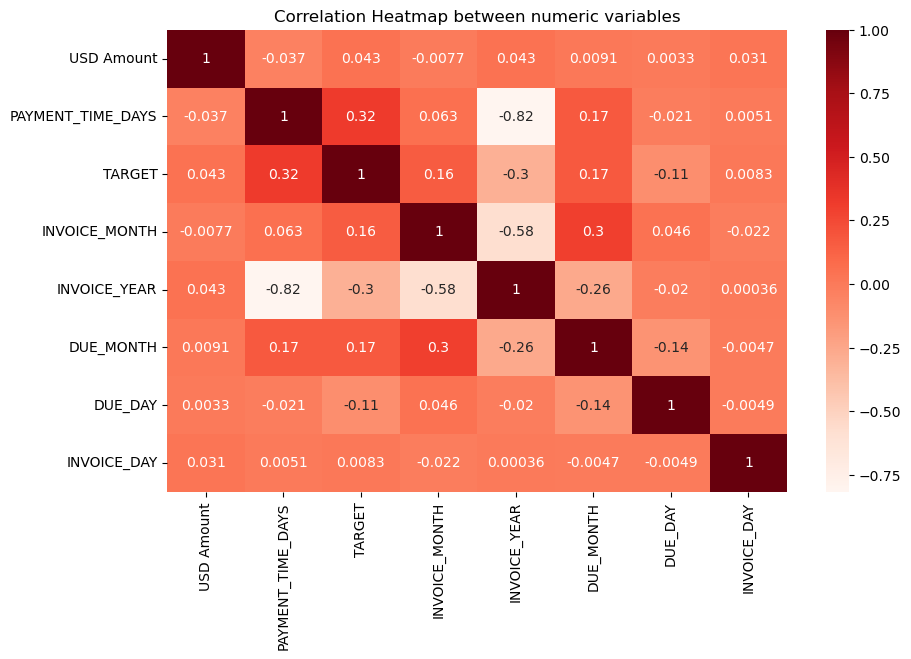

In [173]:
# Heatmap showing correlation between numeric variables

plt.figure(figsize=(10, 6))
plt.title("Correlation Heatmap between numeric variables")
sns.heatmap(data=df_bb[var_num].corr(), annot=True, cmap="Reds")
plt.show()

#### No strong correlation seen between numeric variables.

#### EDA Highlights
* Customers overwhelmingly prefer the WIRE payment mode, while I/C check defaults to 100%.
* Payment terms of 30 days from EOM or invoice date are commonly chosen, but there is a significant delay for terms such as 15 days from EOM, Immediate, and 100% Advance Payment.
* Schuster's Non-Goods Invoices exhibit a delay rate comparable to Goods Invoices.
* Invoices are primarily in AED, SAR, and USD; however, a 100% delay rate is observed for JOD or ZAR invoice currencies.
* Customers paying in KWD consistently experience a 100% delay in payments.
* Schuster has received payments for invoices dating back to 2015.
* Invoices generated from July to September consistently face delays in payments.
* Invoices due on Mondays and Thursdays are frequently delayed.
* Schuster raises fewer invoices on Fridays compared to other days.
* The majority of Schuster's billings are below 1 Mn, but some transactions reach values as high as 10 Mn.
* The ratio of delayed to timely payments is 64:36.

## 4.Customer Segmentation

#### Data Preparation for clustering

In [90]:
# Let us look at the sample records before proceeding with customer segmentation
df_bb.head()

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,TARGET,PAYMENT_TIME_DAYS,INVOICE_MONTH,INVOICE_YEAR,DUE_MONTH,DUE_DAY,INVOICE_DAY
0,WIRE,C EA Corp,2021-04-20,USD,101018.63040,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1,111,11,2020,12,2,0
1,WIRE,RADW Corp,2021-01-31,SAR,48990.21133,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1,3,12,2020,1,3,1
2,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0,-29,1,2021,3,0,5
3,WIRE,FARO Corp,2021-01-31,SAR,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,17,12,2020,1,3,1
4,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,17,12,2020,1,3,1


In [91]:
# Let us create the first variable for customer segmentation- Average Payment time in days
seg=df_bb.groupby(["CUSTOMER_NAME"])["PAYMENT_TIME_DAYS"].mean()
seg=pd.DataFrame(seg)
seg.reset_index
seg.rename(columns={"PAYMENT_TIME_DAYS":"AVERAGE_PAYMENT_DAYS"},inplace=True)
seg.head()

,AVERAGE_PAYMENT_DAYS
CUSTOMER_NAME,
3D D Corp,-8.681529
6TH Corp,-42.666667
A3 D Corp,28.000000
ABC Corp,-74.000000
ABDU Corp,3.473118


In [92]:
# Let us create the second variable for customer segmentation- Standard Deviation Payment time
seg_2=df_bb.groupby(["CUSTOMER_NAME"])["PAYMENT_TIME_DAYS"].std()
seg_2=pd.DataFrame(seg_2)
seg_2.reset_index
seg_2.rename(columns={"PAYMENT_TIME_DAYS":"STD_DEV_PAYMENT_TIME"},inplace=True)
seg_2.head()

,STD_DEV_PAYMENT_TIME
CUSTOMER_NAME,
3D D Corp,17.803787
6TH Corp,11.183321
A3 D Corp,65.053824
ABC Corp,NaN
ABDU Corp,40.854678


In [93]:
# Let us merge the two dataframes to get the data customer wise
df_seg=pd.merge(seg,seg_2,how="inner",on="CUSTOMER_NAME")
df_seg.head()

,AVERAGE_PAYMENT_DAYS,STD_DEV_PAYMENT_TIME
CUSTOMER_NAME,,
3D D Corp,-8.681529,17.803787
6TH Corp,-42.666667,11.183321
A3 D Corp,28.000000,65.053824
ABC Corp,-74.000000,NaN
ABDU Corp,3.473118,40.854678


In [94]:
# Let us check the shape of the dataframe
df_seg.shape

(689, 2)

In [95]:
# Let us check for missing values
df_seg.isnull().mean()

AVERAGE_PAYMENT_DAYS    0.000000
STD_DEV_PAYMENT_TIME    0.164006
dtype: float64

In [96]:
# Let us check records with null values
df_seg[df_seg.STD_DEV_PAYMENT_TIME.isnull()== True]

,AVERAGE_PAYMENT_DAYS,STD_DEV_PAYMENT_TIME
CUSTOMER_NAME,,
ABC Corp,-74.0,NaN
AHIA Corp,22.0,NaN
AHL Corp,30.0,NaN
AIN Corp,-46.0,NaN
AL O Corp,-34.0,NaN
...,...,...
VICT Corp,29.0,NaN
VISA Corp,64.0,NaN
VITA Corp,22.0,NaN


In [97]:
# Let us check record for one of the customer.
# It is seen that STD DEV is null where there is only one record for the customer.
df_bb[df_bb["CUSTOMER_NAME"]=="WORO Corp"]

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,TARGET,PAYMENT_TIME_DAYS,INVOICE_MONTH,INVOICE_YEAR,DUE_MONTH,DUE_DAY,INVOICE_DAY
91211,WIRE,WORO Corp,2021-05-30,AED,604.5,2021-03-22,2021-03-22,Others,INV,AED,Goods,1,69,3,2021,3,0,0


In [98]:
# Let us replace null values with 0
df_seg["STD_DEV_PAYMENT_TIME"].fillna(0,inplace=True)
df_seg.isnull().mean()

AVERAGE_PAYMENT_DAYS    0.0
STD_DEV_PAYMENT_TIME    0.0
dtype: float64

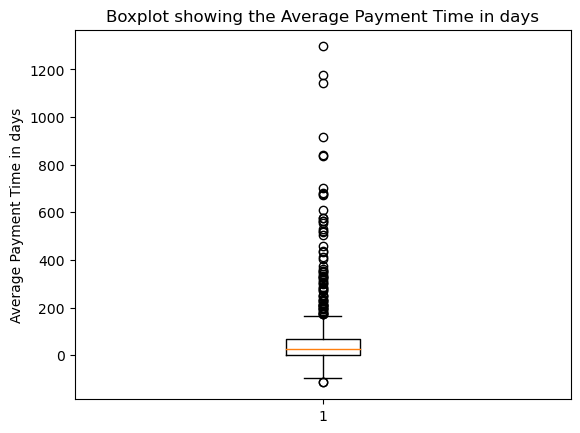

In [99]:
# Boxplot for Average Payment Days.
# Negative values are cases where customer has paid in advance.
plt.boxplot(df_seg["AVERAGE_PAYMENT_DAYS"])
plt.title("Boxplot showing the Average Payment Time in days")
plt.ylabel("Average Payment Time in days")
plt.show()

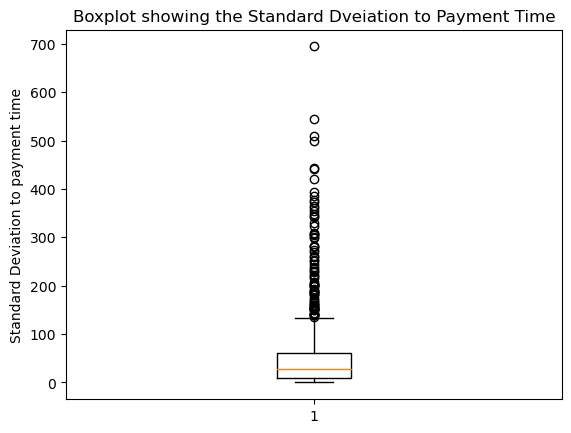

In [100]:
# Boxplot for Std deviation in payment time.
plt.boxplot(df_seg["STD_DEV_PAYMENT_TIME"])
plt.title("Boxplot showing the Standard Dveiation to Payment Time")
plt.ylabel("Standard Deviation to payment time")
plt.show()

In [101]:
# Let us create a dataframe for clustering after delting customer name
df_cl=df_seg.copy()
df_cl.reset_index(inplace=True)
df_cl.drop("CUSTOMER_NAME",axis=1,inplace=True)
df_cl.head()

,AVERAGE_PAYMENT_DAYS,STD_DEV_PAYMENT_TIME
0,-8.681529,17.803787
1,-42.666667,11.183321
2,28.000000,65.053824
3,-74.000000,0.000000
4,3.473118,40.854678


#### Clustering

In [102]:
# importing the required Scaler.
from sklearn.preprocessing import StandardScaler


In [103]:
# Instantiate for scaling
scaler=StandardScaler()
df_cl_scaled=scaler.fit_transform(df_cl)
df_cl_scaled.shape

(689, 2)

In [104]:
# Put the scaled data in a DataFrame
df_cl_scaled=pd.DataFrame(df_cl_scaled)
df_cl_scaled.head()

,0,1
0,-0.501758,-0.453592
1,-0.737405,-0.530766
2,-0.247416,0.097198
3,-0.954664,-0.661129
4,-0.417480,-0.184889


In [105]:
# importing the required metrics and methods
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

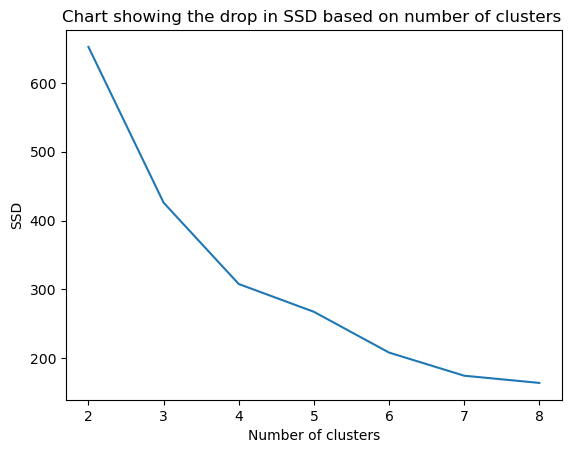

In [106]:
# Finding the optimal number of clusters
# Create a list to add the inertia- sum of squared distance
# We can see that there's a big drop from cluster 2 to 3. Hence 3 is the optimal number of cluster
import os
os.environ["OMP_NUM_THREADS"] = "1"

ssd=[]
range_n_cluster=[2,3,4,5,6,7,8]
for num_cluster in range_n_cluster:
        kmeans=KMeans(n_clusters=num_cluster,max_iter=50)
        kmeans.fit(df_cl_scaled)
        
        ssd.append(kmeans.inertia_)
plt.plot(ssd)
plt.xticks(ticks=(0,1,2,3,4,5,6),labels=range_n_cluster)
plt.title("Chart showing the drop in SSD based on number of clusters ")
plt.xlabel("Number of clusters")
plt.ylabel("SSD")
plt.show()

In [107]:
# Silhouette Analysis to check the optimal number of clusters

range_n_cluster=[2,3,4,5,6,7,8]
for num_cluster in range_n_cluster:
        kmeans=KMeans(n_clusters=num_cluster,max_iter=50)
        kmeans.fit(df_cl_scaled)
        
        cluster_labels=kmeans.labels_
        
        # Check for silhouette score
        silhouette_avg=silhouette_score(df_cl_scaled,cluster_labels)
        print("For n_cluster={0},the silhouette score is {1}".format(num_cluster,silhouette_avg))

For n_cluster=2,the silhouette score is 0.757127769694936
For n_cluster=3,the silhouette score is 0.7480532464904536
For n_cluster=4,the silhouette score is 0.6116271806489411
For n_cluster=5,the silhouette score is 0.6225314184356432
For n_cluster=6,the silhouette score is 0.40115728325519656
For n_cluster=7,the silhouette score is 0.5569451251212458
For n_cluster=8,the silhouette score is 0.41576301972250324


In [108]:
# Both elbow curve and silhouette score indicate that the optimal number of clusters is 3
kmeans=KMeans(n_clusters=3,max_iter=50,random_state=42)
kmeans.fit(df_cl_scaled)


KMeans(max_iter=50, n_clusters=3, random_state=42)

In [109]:
# Cluster ID's
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [110]:
# incorporating the cluster id into the dataframe
df_seg["CLUSTER_ID"]=kmeans.labels_

In [111]:
# Let us look at the records in cust_seg
df_seg.head()

,AVERAGE_PAYMENT_DAYS,STD_DEV_PAYMENT_TIME,CLUSTER_ID
CUSTOMER_NAME,,,
3D D Corp,-8.681529,17.803787,1
6TH Corp,-42.666667,11.183321,1
A3 D Corp,28.000000,65.053824,1
ABC Corp,-74.000000,0.000000,1
ABDU Corp,3.473118,40.854678,1


In [112]:
# Let us check the count of customers in each cluster.
df_seg.groupby("CLUSTER_ID")["CLUSTER_ID"].count()

CLUSTER_ID
0     59
1    611
2     19
Name: CLUSTER_ID, dtype: int64

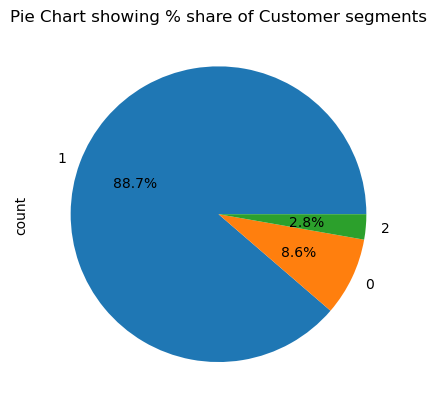

In [113]:
df_seg["CLUSTER_ID"].value_counts().plot.pie(autopct="%.1f%%")
plt.title("Pie Chart showing % share of Customer segments")
plt.show()

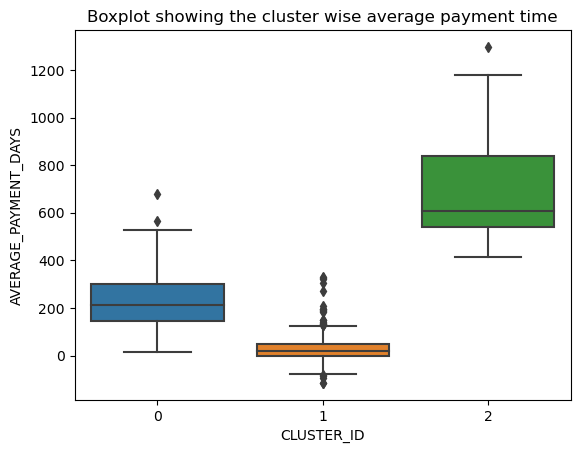

In [114]:
# Let us plot a boxplot to understand the clusters better.
sns.boxplot(x="CLUSTER_ID",y="AVERAGE_PAYMENT_DAYS",data=df_seg)
plt.title("Boxplot showing the cluster wise average payment time")
plt.show()

In [115]:
# Cluster 2 has the customers with prolonged payment. Let us look at those customers. 
df_seg[df_seg["CLUSTER_ID"]==2]

,AVERAGE_PAYMENT_DAYS,STD_DEV_PAYMENT_TIME,CLUSTER_ID
CUSTOMER_NAME,,,
ADMI Corp,575.384615,73.868733,2
ALAM Corp,459.000000,0.000000,2
ALSU Corp,565.500000,198.545405,2
ANTH Corp,553.625000,168.085809,2
BASI Corp,1176.666667,440.380801,2
EYEW Corp,917.000000,0.000000,2
HANI Corp,1142.000000,281.428499,2
I BE Corp,672.000000,21.213203,2
JUBA Corp,680.000000,0.000000,2


#### They customers take more than a year to make payment from the due date.

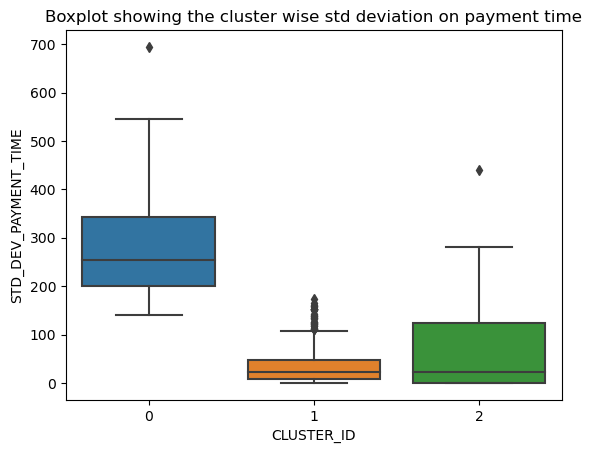

In [116]:
# Boxplot showing cluster wise standard deviation to payment time.
sns.boxplot(x="CLUSTER_ID",y="STD_DEV_PAYMENT_TIME",data=df_seg)
plt.title("Boxplot showing the cluster wise std deviation on payment time")
plt.show()

#### The 3 clusters formed are :
* Cluster 2: Prolonged delays with moderate stand deviation

* Cluster 1: Early Payments with low std deviation

* Cluster 0: Moderate Delays with high standard deviation

In [117]:
# creating a dictionary with customer name and cluster id
df_dict=df_seg.copy()
df_dict.drop(["AVERAGE_PAYMENT_DAYS","STD_DEV_PAYMENT_TIME"],axis=1,inplace=True)
df_dict.head()

,CLUSTER_ID
CUSTOMER_NAME,
3D D Corp,1
6TH Corp,1
A3 D Corp,1
ABC Corp,1
ABDU Corp,1


In [118]:
df_dict.info()

<class 'pandas.core.frame.DataFrame'>
Index: 689 entries, 3D D Corp to ZV F Corp
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   CLUSTER_ID  689 non-null    int32
dtypes: int32(1)
memory usage: 24.2+ KB


In [119]:
# We will merge the cust_dict with the rec_payment_data
merged_df=pd.merge(df_bb,df_dict, how="inner",on="CUSTOMER_NAME")
merged_df.shape

(42058, 19)

In [120]:
merged_df.head()

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,TARGET,PAYMENT_TIME_DAYS,INVOICE_MONTH,INVOICE_YEAR,DUE_MONTH,DUE_DAY,INVOICE_DAY,CLUSTER_ID
0,WIRE,C EA Corp,2021-04-20,USD,101018.63040,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1,111,11,2020,12,2,0,1
1,WIRE,RADW Corp,2021-01-31,SAR,48990.21133,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1,3,12,2020,1,3,1,1
2,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0,-29,1,2021,3,0,5,1
3,WIRE,FARO Corp,2021-01-31,SAR,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,17,12,2020,1,3,1,0
4,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,17,12,2020,1,3,1,1


## 5. Data Preparation

In [121]:
# Now that we can proceed to the next step, let us see what are the columns that are irrelevant for building the model
merged_df.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'RECEIPT_DATE', 'CURRENCY_CODE',
       'USD Amount', 'INVOICE_CREATION_DATE', 'DUE_DATE', 'PAYMENT_TERM',
       'INVOICE_CLASS', 'INVOICE_CURRENCY_CODE', 'INVOICE_TYPE', 'TARGET',
       'PAYMENT_TIME_DAYS', 'INVOICE_MONTH', 'INVOICE_YEAR', 'DUE_MONTH',
       'DUE_DAY', 'INVOICE_DAY', 'CLUSTER_ID'],
      dtype='object')

In [122]:
# Let us also check the columns in open invoices file to see what columns need to be retained in rec_payment_data.
df_op.columns

Index(['AS_OF_DATE', 'Customer Type', 'Customer_Name', 'Customer Account No',
       'Transaction Number', 'Transaction Date', 'Payment Term', 'Due Date',
       'Transaction Currency', 'Local Amount', 'Transaction Class', 'AGE',
       'USD Amount', 'INV_CREATION_DATE'],
      dtype='object')

In [123]:
# dropping the columns that are not required/cannot be used for building the model
merged_df.drop(['RECEIPT_METHOD', 'CUSTOMER_NAME','RECEIPT_DATE',
       'CURRENCY_CODE', 'INVOICE_CREATION_DATE', 'DUE_DATE', 
       'INVOICE_TYPE', 'PAYMENT_TIME_DAYS',"INVOICE_YEAR","INVOICE_MONTH","INVOICE_DAY"],axis=1,inplace=True)
merged_df.shape

(42058, 8)

In [124]:
# Let us check the unique records to have an idea of the dummy variables required.
merged_df.nunique()

USD Amount               7819
PAYMENT_TERM               12
INVOICE_CLASS               3
INVOICE_CURRENCY_CODE      10
TARGET                      2
DUE_MONTH                  12
DUE_DAY                     7
CLUSTER_ID                  3
dtype: int64

#### Dummy Variable

In [125]:
# Creation of dummy variable
dummy1=pd.get_dummies(merged_df[["PAYMENT_TERM","INVOICE_CLASS","INVOICE_CURRENCY_CODE"]],drop_first=True)

In [126]:
# Merging the dummy variables with the main dataframe.
merged_df=pd.concat([merged_df,dummy1],axis=1)
merged_df.shape

(42058, 30)

In [127]:
# checking the dataframe
merged_df.head()

,USD Amount,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,TARGET,DUE_MONTH,DUE_DAY,CLUSTER_ID,PAYMENT_TERM_15 Days from EOM,PAYMENT_TERM_30 Days from EOM,PAYMENT_TERM_30 Days from Inv Date,PAYMENT_TERM_45 Days from EOM,PAYMENT_TERM_45 Days from Inv Date,PAYMENT_TERM_60 Days from EOM,PAYMENT_TERM_60 Days from Inv Date,PAYMENT_TERM_90 Days from EOM,PAYMENT_TERM_90 Days from Inv Date,PAYMENT_TERM_Immediate,PAYMENT_TERM_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR
0,101018.63040,30 Days from EOM,INV,AED,1,12,2,1,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,48990.21133,30 Days from Inv Date,INV,SAR,1,1,3,1,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False
2,41991.60971,30 Days from Inv Date,INV,SAR,0,3,0,1,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False
3,41991.60971,30 Days from Inv Date,INV,SAR,1,1,3,0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False
4,41991.60971,30 Days from Inv Date,INV,SAR,1,1,3,1,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False


In [128]:
# dropping the columns after creation of dummy variables
# Drop columns
merged_df.drop(["PAYMENT_TERM", "INVOICE_CLASS", "INVOICE_CURRENCY_CODE"], axis=1, inplace=True)

# Convert DataFrame to integer datatype
merged_df = merged_df.astype(int)

# Check the shape
print(merged_df.shape)


(42058, 27)


In [129]:
# Let us look at some records to see what other columns need to be addressed.
merged_df.head()

,USD Amount,TARGET,DUE_MONTH,DUE_DAY,CLUSTER_ID,PAYMENT_TERM_15 Days from EOM,PAYMENT_TERM_30 Days from EOM,PAYMENT_TERM_30 Days from Inv Date,PAYMENT_TERM_45 Days from EOM,PAYMENT_TERM_45 Days from Inv Date,PAYMENT_TERM_60 Days from EOM,PAYMENT_TERM_60 Days from Inv Date,PAYMENT_TERM_90 Days from EOM,PAYMENT_TERM_90 Days from Inv Date,PAYMENT_TERM_Immediate,PAYMENT_TERM_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR
0,101018,1,12,2,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,48990,1,1,3,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,41991,0,3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,41991,1,1,3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,41991,1,1,3,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [130]:
# creation of dummy variables for DUE_MONTH
dummy2=pd.get_dummies(merged_df["DUE_MONTH"],prefix="DUE_MONTH",drop_first=True,dtype= int)
dummy2.head()

,DUE_MONTH_2,DUE_MONTH_3,DUE_MONTH_4,DUE_MONTH_5,DUE_MONTH_6,DUE_MONTH_7,DUE_MONTH_8,DUE_MONTH_9,DUE_MONTH_10,DUE_MONTH_11,DUE_MONTH_12
0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [131]:
# merging with main dataframe
merged_df=pd.concat([merged_df,dummy2],axis=1)
merged_df.shape

(42058, 38)

In [132]:
# creation of dummy variables for DUE_DAY
dummy3=pd.get_dummies(merged_df["DUE_DAY"],prefix="DUE_DAY",drop_first=True,dtype=int)
dummy3.head()

,DUE_DAY_1,DUE_DAY_2,DUE_DAY_3,DUE_DAY_4,DUE_DAY_5,DUE_DAY_6
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,0,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [133]:
# merging with main dataframe
merged_df=pd.concat([merged_df,dummy3],axis=1)
merged_df.shape

(42058, 44)

In [134]:
# creation dummy variable for CLUSTER_ID
dummy4=pd.get_dummies(merged_df["CLUSTER_ID"],prefix="CLUSTER_ID",drop_first=True,dtype=int)
dummy4.head()

,CLUSTER_ID_1,CLUSTER_ID_2
0,1,0
1,1,0
2,1,0
3,0,0
4,1,0


In [135]:
# merging with main dataframe
merged_df=pd.concat([merged_df,dummy4],axis=1)
merged_df.head()

,USD Amount,TARGET,DUE_MONTH,DUE_DAY,CLUSTER_ID,PAYMENT_TERM_15 Days from EOM,PAYMENT_TERM_30 Days from EOM,PAYMENT_TERM_30 Days from Inv Date,PAYMENT_TERM_45 Days from EOM,PAYMENT_TERM_45 Days from Inv Date,PAYMENT_TERM_60 Days from EOM,PAYMENT_TERM_60 Days from Inv Date,PAYMENT_TERM_90 Days from EOM,PAYMENT_TERM_90 Days from Inv Date,PAYMENT_TERM_Immediate,PAYMENT_TERM_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR,DUE_MONTH_2,DUE_MONTH_3,DUE_MONTH_4,DUE_MONTH_5,DUE_MONTH_6,DUE_MONTH_7,DUE_MONTH_8,DUE_MONTH_9,DUE_MONTH_10,DUE_MONTH_11,DUE_MONTH_12,DUE_DAY_1,DUE_DAY_2,DUE_DAY_3,DUE_DAY_4,DUE_DAY_5,DUE_DAY_6,CLUSTER_ID_1,CLUSTER_ID_2
0,101018,1,12,2,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
1,48990,1,1,3,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,41991,0,3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,41991,1,1,3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,41991,1,1,3,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [136]:
# dropping the columns after creation of dummy variables
merged_df.drop(["DUE_DAY","DUE_MONTH","CLUSTER_ID"],axis=1,inplace=True)
merged_df.shape

(42058, 43)

#### Data Imbalance Check

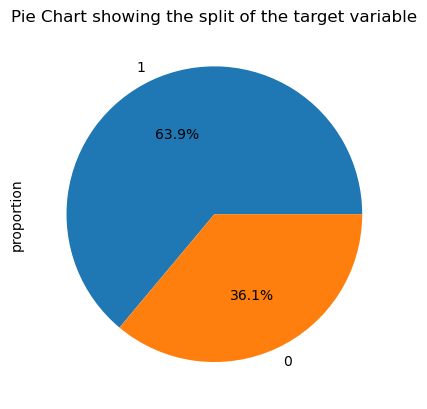

In [137]:
# Let us check the split of the target variable
# There is no major data imbalance. Hence we will proceed as is.
np.round(merged_df.TARGET.value_counts(normalize=True)*100,2).plot.pie(autopct="%.1f%%")
plt.title("Pie Chart showing the split of the target variable")
plt.show()

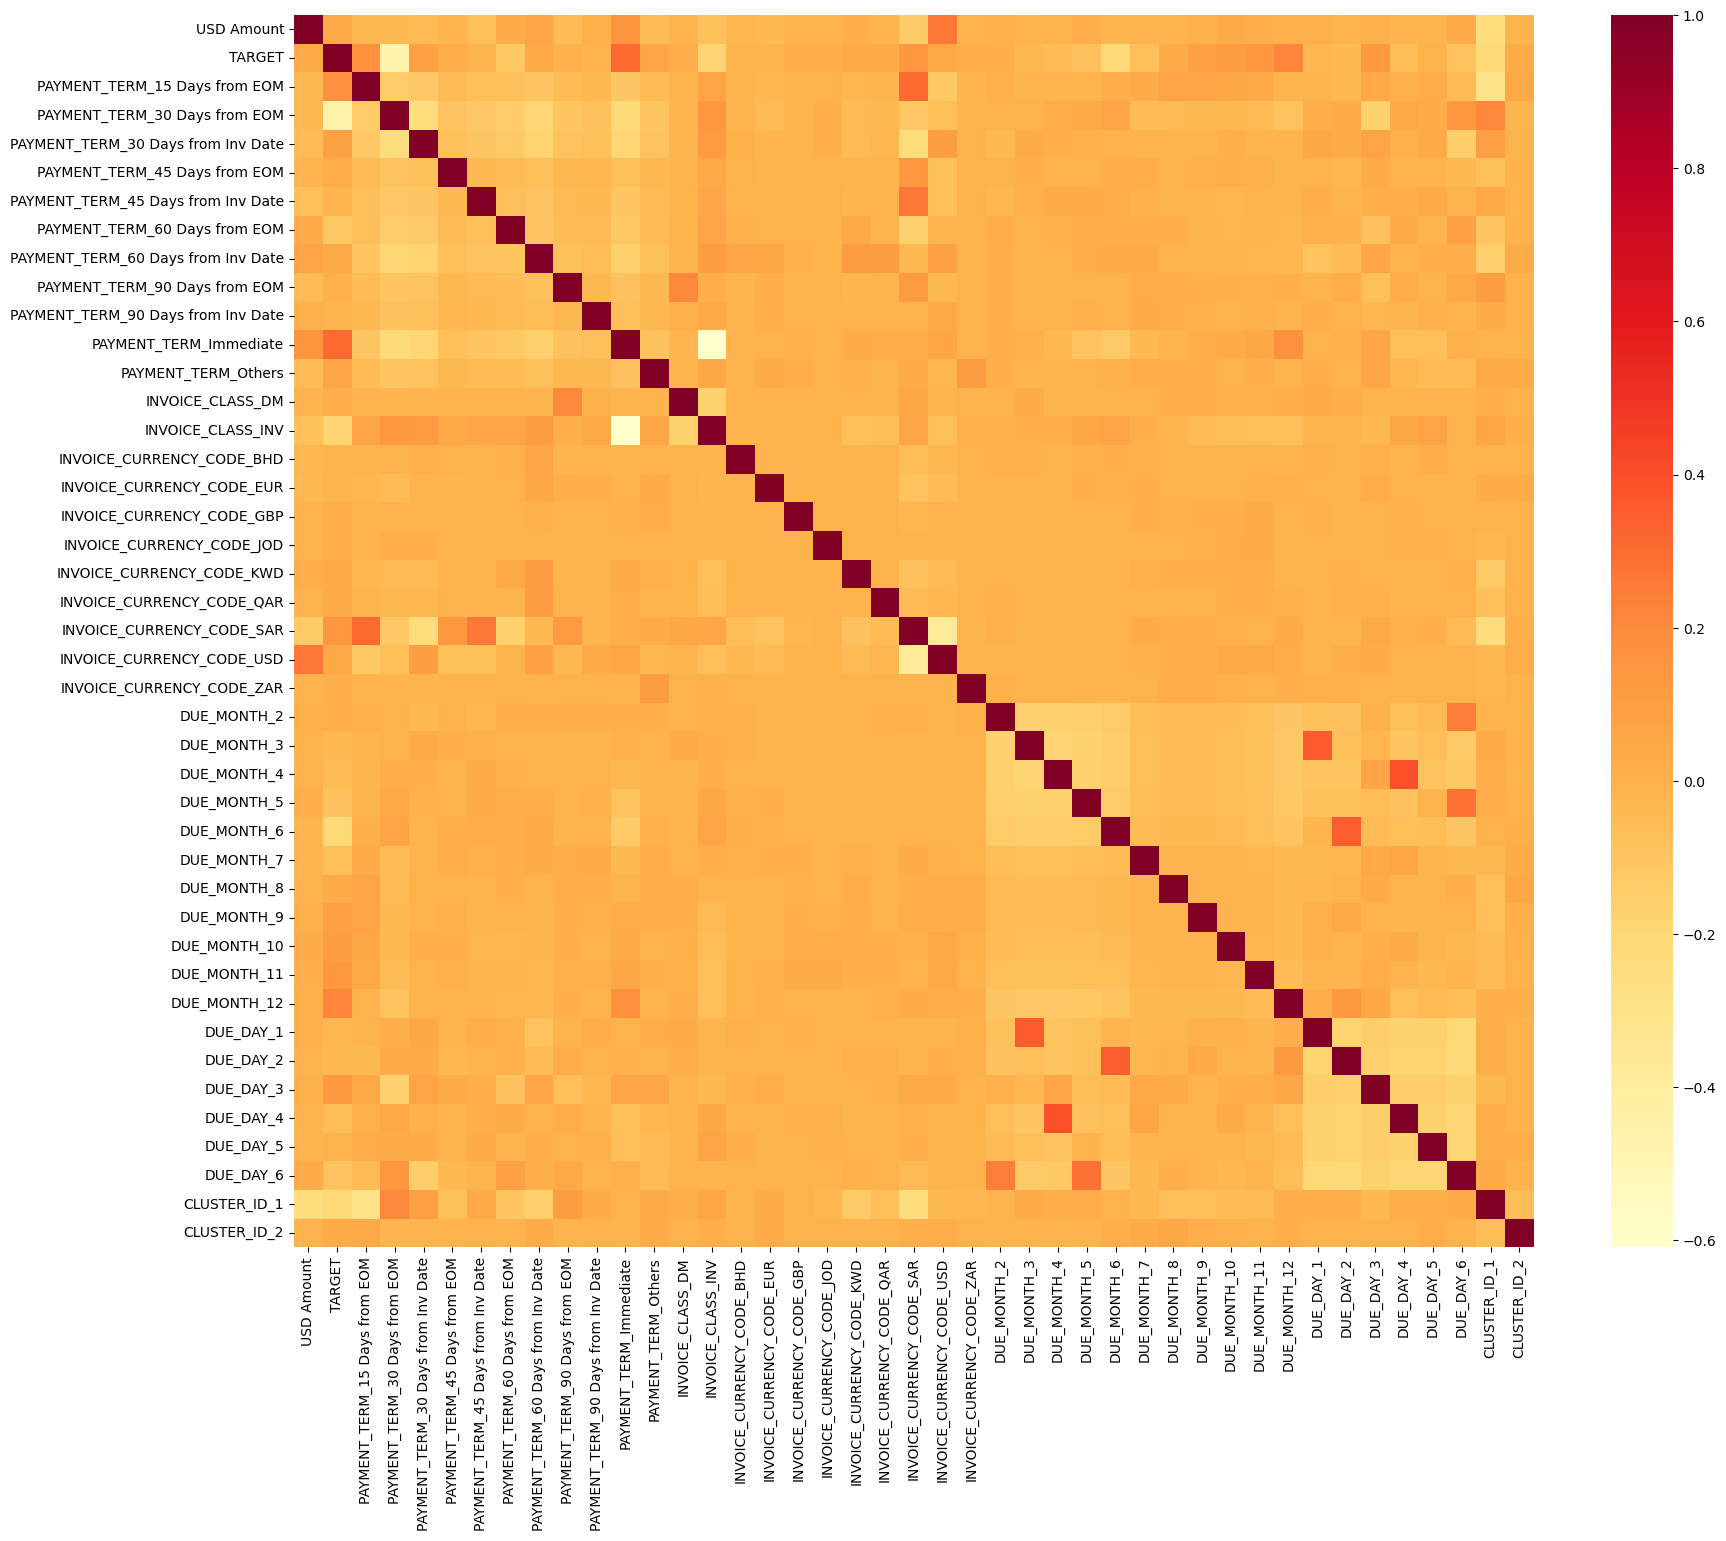

In [138]:
# plotting heatmap to check correlation between the variables
# There are correlations, but we will not drop any variable at this point of time.
plt.figure(figsize=(20,16))
sns.heatmap(merged_df.corr(),cmap="YlOrRd")
plt.show()

## 6.Model Building - Logistic Regression and Evaluation

#### Train Test Split

In [139]:
# Let us create the X and y
X=merged_df.drop("TARGET",axis=1)
y=merged_df["TARGET"]
X.shape,y.shape

((42058, 42), (42058,))

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
# Let us split the data into train and test set.
# As required train and test data is split in the ratio of 0.7:0.3
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=42,stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((29440, 42), (12618, 42), (29440,), (12618,))

In [142]:
# checking the split of the target variable in the train set.It is same as original data set as stratify was y
y_train.value_counts(normalize=True)

TARGET
1    0.639096
0    0.360904
Name: proportion, dtype: float64

In [143]:
# checking the split of the target variable in the train set.It is same as original data set as stratify was y
y_test.value_counts(normalize=True)

TARGET
1    0.639087
0    0.360913
Name: proportion, dtype: float64

In [144]:
# importing MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

In [145]:
#instantiate
scaler=MinMaxScaler()

In [146]:
# Let us scale the train and test dataset
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [147]:
# converting the scaled train data to a Dataframe
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_train_scaled.head()

,USD Amount,PAYMENT_TERM_15 Days from EOM,PAYMENT_TERM_30 Days from EOM,PAYMENT_TERM_30 Days from Inv Date,PAYMENT_TERM_45 Days from EOM,PAYMENT_TERM_45 Days from Inv Date,PAYMENT_TERM_60 Days from EOM,PAYMENT_TERM_60 Days from Inv Date,PAYMENT_TERM_90 Days from EOM,PAYMENT_TERM_90 Days from Inv Date,PAYMENT_TERM_Immediate,PAYMENT_TERM_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR,DUE_MONTH_2,DUE_MONTH_3,DUE_MONTH_4,DUE_MONTH_5,DUE_MONTH_6,DUE_MONTH_7,DUE_MONTH_8,DUE_MONTH_9,DUE_MONTH_10,DUE_MONTH_11,DUE_MONTH_12,DUE_DAY_1,DUE_DAY_2,DUE_DAY_3,DUE_DAY_4,DUE_DAY_5,DUE_DAY_6,CLUSTER_ID_1,CLUSTER_ID_2
0,0.003134,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.004454,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000034,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.004337,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.055265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [148]:
# converting the scaled test data to a Dataframe
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)
X_test_scaled.head()

,USD Amount,PAYMENT_TERM_15 Days from EOM,PAYMENT_TERM_30 Days from EOM,PAYMENT_TERM_30 Days from Inv Date,PAYMENT_TERM_45 Days from EOM,PAYMENT_TERM_45 Days from Inv Date,PAYMENT_TERM_60 Days from EOM,PAYMENT_TERM_60 Days from Inv Date,PAYMENT_TERM_90 Days from EOM,PAYMENT_TERM_90 Days from Inv Date,PAYMENT_TERM_Immediate,PAYMENT_TERM_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR,DUE_MONTH_2,DUE_MONTH_3,DUE_MONTH_4,DUE_MONTH_5,DUE_MONTH_6,DUE_MONTH_7,DUE_MONTH_8,DUE_MONTH_9,DUE_MONTH_10,DUE_MONTH_11,DUE_MONTH_12,DUE_DAY_1,DUE_DAY_2,DUE_DAY_3,DUE_DAY_4,DUE_DAY_5,DUE_DAY_6,CLUSTER_ID_1,CLUSTER_ID_2
0,0.000134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.188971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.012474,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.002445,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.001981,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


#### The data is prepared for model construction, with the initial focus on building a logistic regression model.

#### Logistic Regression Model

In [149]:
# Since there are 42 features we will use RFECV to decide on the number of features to be selected in the model
# importing the methods for building the model and feature selection
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

#### Selecting number of features using RFECV

In [150]:
# instantiate
logreg=LogisticRegression(random_state=42,max_iter=200)

In [151]:
# Fitting of train data
rfecv=RFECV(estimator=logreg,cv=5,n_jobs=-1)
rfecv.fit(X_train_scaled,y_train)

RFECV(cv=5, estimator=LogisticRegression(max_iter=200, random_state=42),
      n_jobs=-1)

In [152]:
# Checking the scores of cross validation across different number of features
print(rfecv.cv_results_)

{'mean_test_score': array([0.63909647, 0.63909647, 0.63909647, 0.63909647, 0.64025136,
       0.65244565, 0.74884511, 0.77330163, 0.78138587, 0.79548234,
       0.79935462, 0.79850543, 0.79976223, 0.80213995, 0.80411005,
       0.80329484, 0.80108696, 0.80183424, 0.80271739, 0.80305707,
       0.80394022, 0.80407609, 0.80373641, 0.80380435, 0.80397418,
       0.80400815, 0.80360054, 0.80356658, 0.80431386, 0.80414402,
       0.80431386, 0.80444973, 0.8048913 , 0.80492527, 0.80366848,
       0.80319293, 0.80285326, 0.80319293, 0.80278533, 0.80285326,
       0.80370245, 0.80370245]), 'std_test_score': array([0.        , 0.        , 0.        , 0.        , 0.00145069,
       0.00464447, 0.0488138 , 0.00615401, 0.00614744, 0.00646131,
       0.00553325, 0.00549768, 0.00541884, 0.00672863, 0.00624169,
       0.00728709, 0.00882786, 0.00732421, 0.00544814, 0.00594051,
       0.00666367, 0.00662721, 0.00628589, 0.006593  , 0.00589449,
       0.00609334, 0.00574902, 0.00567632, 0.00650668, 0.0

In [153]:
# Number of features in X_train_scaled
num_features=X_train_scaled.shape[1]
num_features

42

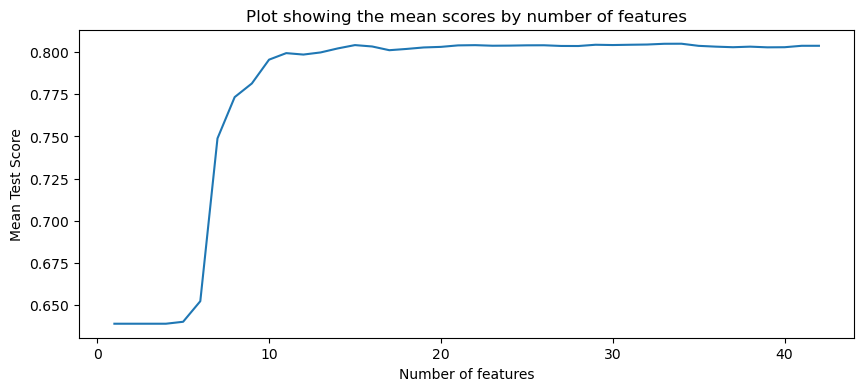

In [154]:
# Plotting the results of mean score across the number of features
plt.figure(figsize=(10, 4))
plt.plot(range(1, num_features + 1), rfecv.cv_results_['mean_test_score'])
plt.title("Plot showing the mean scores by number of features")
plt.xlabel("Number of features")
plt.ylabel("Mean Test Score")
plt.show()


In [155]:
# Let us find the best number of features
rfecv.n_features_

34

In [156]:
# Check the boolean value of variables selected.
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False, False, False, False,  True,  True])

In [157]:
# The rank of the variables 
rfecv.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 9, 5, 4, 6, 1, 1])

In [158]:
# Let us check the variables considered by the model using best of features 34.
cols_to_keep=X_train_scaled.columns[rfecv.support_]
cols_to_keep

Index(['USD Amount', 'PAYMENT_TERM_15 Days from EOM',
       'PAYMENT_TERM_30 Days from EOM', 'PAYMENT_TERM_30 Days from Inv Date',
       'PAYMENT_TERM_45 Days from EOM', 'PAYMENT_TERM_45 Days from Inv Date',
       'PAYMENT_TERM_60 Days from EOM', 'PAYMENT_TERM_60 Days from Inv Date',
       'PAYMENT_TERM_90 Days from EOM', 'PAYMENT_TERM_90 Days from Inv Date',
       'PAYMENT_TERM_Immediate', 'INVOICE_CLASS_DM', 'INVOICE_CLASS_INV',
       'INVOICE_CURRENCY_CODE_BHD', 'INVOICE_CURRENCY_CODE_EUR',
       'INVOICE_CURRENCY_CODE_GBP', 'INVOICE_CURRENCY_CODE_JOD',
       'INVOICE_CURRENCY_CODE_QAR', 'INVOICE_CURRENCY_CODE_SAR',
       'INVOICE_CURRENCY_CODE_ZAR', 'DUE_MONTH_2', 'DUE_MONTH_3',
       'DUE_MONTH_4', 'DUE_MONTH_5', 'DUE_MONTH_6', 'DUE_MONTH_7',
       'DUE_MONTH_8', 'DUE_MONTH_9', 'DUE_MONTH_10', 'DUE_MONTH_11',
       'DUE_MONTH_12', 'DUE_DAY_2', 'CLUSTER_ID_1', 'CLUSTER_ID_2'],
      dtype='object')

#### Buidling the first model

In [159]:
# importing RFE from scikit learn
from sklearn.feature_selection import RFE

In [160]:
# Now that we know 34 is the best number of features, let us build the first model using 34 features
rfe1=RFE(estimator=logreg,n_features_to_select=34)
rfe1.fit(X_train_scaled,y_train)

RFE(estimator=LogisticRegression(max_iter=200, random_state=42),
    n_features_to_select=34)

In [161]:
# Finding the columns in rfe1.
cols_to_keep=X_train_scaled.columns[rfe1.support_]
cols_to_keep

Index(['USD Amount', 'PAYMENT_TERM_15 Days from EOM',
       'PAYMENT_TERM_30 Days from EOM', 'PAYMENT_TERM_30 Days from Inv Date',
       'PAYMENT_TERM_45 Days from EOM', 'PAYMENT_TERM_45 Days from Inv Date',
       'PAYMENT_TERM_60 Days from EOM', 'PAYMENT_TERM_60 Days from Inv Date',
       'PAYMENT_TERM_90 Days from EOM', 'PAYMENT_TERM_90 Days from Inv Date',
       'PAYMENT_TERM_Immediate', 'INVOICE_CLASS_DM', 'INVOICE_CLASS_INV',
       'INVOICE_CURRENCY_CODE_BHD', 'INVOICE_CURRENCY_CODE_EUR',
       'INVOICE_CURRENCY_CODE_GBP', 'INVOICE_CURRENCY_CODE_JOD',
       'INVOICE_CURRENCY_CODE_QAR', 'INVOICE_CURRENCY_CODE_SAR',
       'INVOICE_CURRENCY_CODE_ZAR', 'DUE_MONTH_2', 'DUE_MONTH_3',
       'DUE_MONTH_4', 'DUE_MONTH_5', 'DUE_MONTH_6', 'DUE_MONTH_7',
       'DUE_MONTH_8', 'DUE_MONTH_9', 'DUE_MONTH_10', 'DUE_MONTH_11',
       'DUE_MONTH_12', 'DUE_DAY_2', 'CLUSTER_ID_1', 'CLUSTER_ID_2'],
      dtype='object')

In [162]:
# Keeping the required columns in X_train and X_test
X_train=X_train_scaled[cols_to_keep]
X_test=X_test_scaled[cols_to_keep]
X_train.shape,X_test.shape

((29440, 34), (12618, 34))

In [163]:
import statsmodels.api as sm

In [164]:
# Adding a constant
X_train_sm=sm.add_constant(X_train,has_constant="add")
X_test_sm=sm.add_constant(X_test,has_constant="add")

In [165]:
# building the first model
model1=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())
result1=model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                29440
Model:                            GLM   Df Residuals:                    29405
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11881.
Date:                Tue, 05 Mar 2024   Deviance:                       23763.
Time:                        12:28:20   Pearson chi2:                 3.14e+04
No. Iterations:                    26   Pseudo R-squ. (CS):             0.3939
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  1.5915      0.253      6.281      0.000       1.095       2.088
USD Amount                            -0.5142      0.317     -1.623      0.105      -1.135       0.107
PAYMENT_TERM_15 Days from EOM          1.4905      0.139     10.735      0.000       1.218       1.763
PAYMENT_TERM_30 Days from EOM         -2.8601      0.076    -37.593      0.000      -3.009      -2.711
PAYMENT_TERM_30 Days from Inv Date    -0.2771      0.074     -3.727      0.000      -0.423      -0.131
PAYMENT_TERM_45 Days from EOM         -0.6570      0.107     -6.131      0.000      -0.867      -0.447
PAYMENT_TERM_45 Days from Inv Date    -0.9137      0.089    -10.238      0.000      -1.089      -0.739
PAYMENT_TERM_60 Days from EOM         -1.8135      0.085    -21.323      0.000      -1.980      -1.647
PAYMENT_TERM_60 Days from Inv Date    -0.5717      0.077     -7.410      0.000      -0.723      -0.420
PAYMENT_TERM_90 Days from EOM         -0.8003      0.098     -8.154      0.000      -0.993      -0.608
PAYMENT_TERM_90 Days from Inv Date    -0.8450      0.106     -7.991      0.000      -1.052      -0.638
PAYMENT_TERM_Immediate                 2.7960      0.193     14.454      0.000       2.417       3.175
INVOICE_CLASS_DM                       0.7363      0.405      1.817      0.069      -0.058       1.530
INVOICE_CLASS_INV                      0.6923      0.239      2.897      0.004       0.224       1.161
INVOICE_CURRENCY_CODE_BHD             -0.6230      0.199     -3.135      0.002      -1.012      -0.234
INVOICE_CURRENCY_CODE_EUR             -0.8746      0.140     -6.265      0.000      -1.148      -0.601
INVOICE_CURRENCY_CODE_GBP              0.2618      0.503      0.521      0.603      -0.724       1.247
INVOICE_CURRENCY_CODE_JOD             26.0504   1.14e+05      0.000      1.000   -2.24e+05    2.24e+05
INVOICE_CURRENCY_CODE_QAR              0.6423      0.314      2.047      0.041       0.027       1.257
INVOICE_CURRENCY_CODE_SAR              0.2017      0.041      4.889      0.000       0.121       0.283
INVOICE_CURRENCY_CODE_ZAR             25.2474   1.39e+05      0.000      1.000   -2.72e+05    2.72e+05
DUE_MONTH_2                           -0.3316      0.060     -5.537      0.000      -0.449      -0.214
DUE_MONTH_3                           -0.7174      0.056    -12.728      0.000      -0.828      -0.607
DUE_MONTH_4                           -0.6900      0.057    -12.207      0.000      -0.801      -0.579
DUE_MONTH_5                           -0.7245      0.057    -12.717      0.000      -0.836      -0.613
DUE_MONTH_6                           -1.6077      0.065    -24.720      0.000      -1.735      -1.480
DUE_MONTH_7                           -2.1774      0.108    -20.199      0.000      -2.389      

#### In the model with 34 features, certain variables exhibit high p-values. For the second model, we will exclude one of these variables and assess the model's performance.

#### Second Model Building

In [166]:
# Dropping the variable "INVOICE_CURRENCY_CODE_JOD" from train and test dataset
X_train_sm=X_train_sm.drop("INVOICE_CURRENCY_CODE_JOD",axis=1)
X_test_sm=X_test_sm.drop("INVOICE_CURRENCY_CODE_JOD",axis=1)
X_train_sm.shape,X_test_sm.shape

((29440, 34), (12618, 34))

In [167]:
# building the second model
model2=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())

In [168]:
#summary results of the second model
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                29440
Model:                            GLM   Df Residuals:                    29406
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11884.
Date:                Tue, 05 Mar 2024   Deviance:                       23768.
Time:                        12:28:21   Pearson chi2:                 3.14e+04
No. Iterations:                    26   Pseudo R-squ. (CS):             0.3938
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  1.5946      0.253      6.293      0.000       1.098       2.091
USD Amount                            -0.5228      0.317     -1.650      0.099      -1.144       0.098
PAYMENT_TERM_15 Days from EOM          1.4899      0.139     10.730      0.000       1.218       1.762
PAYMENT_TERM_30 Days from EOM         -2.8582      0.076    -37.574      0.000      -3.007      -2.709
PAYMENT_TERM_30 Days from Inv Date    -0.2773      0.074     -3.730      0.000      -0.423      -0.132
PAYMENT_TERM_45 Days from EOM         -0.6572      0.107     -6.133      0.000      -0.867      -0.447
PAYMENT_TERM_45 Days from Inv Date    -0.9130      0.089    -10.230      0.000      -1.088      -0.738
PAYMENT_TERM_60 Days from EOM         -1.8147      0.085    -21.336      0.000      -1.981      -1.648
PAYMENT_TERM_60 Days from Inv Date    -0.5723      0.077     -7.418      0.000      -0.724      -0.421
PAYMENT_TERM_90 Days from EOM         -0.7996      0.098     -8.147      0.000      -0.992      -0.607
PAYMENT_TERM_90 Days from Inv Date    -0.8450      0.106     -7.991      0.000      -1.052      -0.638
PAYMENT_TERM_Immediate                 2.7962      0.193     14.456      0.000       2.417       3.175
INVOICE_CLASS_DM                       0.7363      0.405      1.817      0.069      -0.058       1.530
INVOICE_CLASS_INV                      0.6925      0.239      2.897      0.004       0.224       1.161
INVOICE_CURRENCY_CODE_BHD             -0.6244      0.199     -3.142      0.002      -1.014      -0.235
INVOICE_CURRENCY_CODE_EUR             -0.8750      0.140     -6.267      0.000      -1.149      -0.601
INVOICE_CURRENCY_CODE_GBP              0.2605      0.503      0.518      0.604      -0.725       1.246
INVOICE_CURRENCY_CODE_QAR              0.6406      0.314      2.042      0.041       0.026       1.255
INVOICE_CURRENCY_CODE_SAR              0.2001      0.041      4.851      0.000       0.119       0.281
INVOICE_CURRENCY_CODE_ZAR             25.2445   1.39e+05      0.000      1.000   -2.72e+05    2.72e+05
DUE_MONTH_2                           -0.3323      0.060     -5.549      0.000      -0.450      -0.215
DUE_MONTH_3                           -0.7171      0.056    -12.727      0.000      -0.828      -0.607
DUE_MONTH_4                           -0.6909      0.057    -12.226      0.000      -0.802      -0.580
DUE_MONTH_5                           -0.7253      0.057    -12.734      0.000      -0.837      -0.614
DUE_MONTH_6                           -1.6084      0.065    -24.733      0.000      -1.736      -1.481
DUE_MONTH_7                           -2.1781      0.108    -20.205      0.000      -2.389      -1.967
DUE_MONTH_8                           -0.3378      0.139     -2.430      0.015      -0.610      

#### Thrid Model building

In [169]:
# Dropping the variable "INVOICE_CURRENCY_CODE_ZAR" from train and test dataset
X_train_sm=X_train_sm.drop("INVOICE_CURRENCY_CODE_ZAR",axis=1)
X_test_sm=X_test_sm.drop("INVOICE_CURRENCY_CODE_ZAR",axis=1)
X_train_sm.shape,X_test_sm.shape

((29440, 33), (12618, 33))

In [170]:
# building the third model
model3=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())

In [171]:
#summary results of the third model
result3=model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                29440
Model:                            GLM   Df Residuals:                    29407
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11886.
Date:                Tue, 05 Mar 2024   Deviance:                       23772.
Time:                        12:28:23   Pearson chi2:                 3.14e+04
No. Iterations:                    26   Pseudo R-squ. (CS):             0.3937
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  1.6025      0.253      6.325      0.000       1.106       2.099
USD Amount                            -0.5266      0.317     -1.662      0.096      -1.148       0.094
PAYMENT_TERM_15 Days from EOM          1.4830      0.139     10.685      0.000       1.211       1.755
PAYMENT_TERM_30 Days from EOM         -2.8647      0.076    -37.698      0.000      -3.014      -2.716
PAYMENT_TERM_30 Days from Inv Date    -0.2841      0.074     -3.826      0.000      -0.430      -0.139
PAYMENT_TERM_45 Days from EOM         -0.6637      0.107     -6.196      0.000      -0.874      -0.454
PAYMENT_TERM_45 Days from Inv Date    -0.9186      0.089    -10.296      0.000      -1.093      -0.744
PAYMENT_TERM_60 Days from EOM         -1.8224      0.085    -21.457      0.000      -1.989      -1.656
PAYMENT_TERM_60 Days from Inv Date    -0.5793      0.077     -7.517      0.000      -0.730      -0.428
PAYMENT_TERM_90 Days from EOM         -0.8055      0.098     -8.210      0.000      -0.998      -0.613
PAYMENT_TERM_90 Days from Inv Date    -0.8516      0.106     -8.057      0.000      -1.059      -0.644
PAYMENT_TERM_Immediate                 2.7901      0.193     14.425      0.000       2.411       3.169
INVOICE_CLASS_DM                       0.7372      0.405      1.819      0.069      -0.057       1.531
INVOICE_CLASS_INV                      0.6932      0.239      2.900      0.004       0.225       1.162
INVOICE_CURRENCY_CODE_BHD             -0.6253      0.199     -3.146      0.002      -1.015      -0.236
INVOICE_CURRENCY_CODE_EUR             -0.8772      0.140     -6.281      0.000      -1.151      -0.603
INVOICE_CURRENCY_CODE_GBP              0.2575      0.503      0.512      0.609      -0.729       1.244
INVOICE_CURRENCY_CODE_QAR              0.6393      0.314      2.038      0.042       0.024       1.254
INVOICE_CURRENCY_CODE_SAR              0.1986      0.041      4.815      0.000       0.118       0.279
DUE_MONTH_2                           -0.3317      0.060     -5.539      0.000      -0.449      -0.214
DUE_MONTH_3                           -0.7171      0.056    -12.725      0.000      -0.828      -0.607
DUE_MONTH_4                           -0.6906      0.057    -12.220      0.000      -0.801      -0.580
DUE_MONTH_5                           -0.7252      0.057    -12.731      0.000      -0.837      -0.614
DUE_MONTH_6                           -1.6088      0.065    -24.736      0.000      -1.736      -1.481
DUE_MONTH_7                           -2.1787      0.108    -20.209      0.000      -2.390      -1.967
DUE_MONTH_8                           -0.3317      0.139     -2.390      0.017      -0.604      -0.060
DUE_MONTH_9                            2.3906      0.328      7.286      0.000       1.748      

#### Fourth Model Building

In [172]:
# Dropping the variable "CLUSTER_ID_2" from train and test dataset
X_train_sm=X_train_sm.drop("CLUSTER_ID_2",axis=1)
X_test_sm=X_test_sm.drop("CLUSTER_ID_2",axis=1)
X_train_sm.shape,X_test_sm.shape

((29440, 32), (12618, 32))

In [173]:
# building the fourth model
model4=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())

In [174]:
#summary results of the fourth model
result4=model4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                29440
Model:                            GLM   Df Residuals:                    29408
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11901.
Date:                Tue, 05 Mar 2024   Deviance:                       23801.
Time:                        12:28:24   Pearson chi2:                 3.15e+04
No. Iterations:                    26   Pseudo R-squ. (CS):             0.3931
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  1.6125      0.253      6.367      0.000       1.116       2.109
USD Amount                            -0.5716      0.316     -1.806      0.071      -1.192       0.049
PAYMENT_TERM_15 Days from EOM          1.4894      0.139     10.740      0.000       1.218       1.761
PAYMENT_TERM_30 Days from EOM         -2.8662      0.076    -37.771      0.000      -3.015      -2.717
PAYMENT_TERM_30 Days from Inv Date    -0.2866      0.074     -3.866      0.000      -0.432      -0.141
PAYMENT_TERM_45 Days from EOM         -0.6691      0.107     -6.252      0.000      -0.879      -0.459
PAYMENT_TERM_45 Days from Inv Date    -0.9182      0.089    -10.304      0.000      -1.093      -0.744
PAYMENT_TERM_60 Days from EOM         -1.8299      0.085    -21.572      0.000      -1.996      -1.664
PAYMENT_TERM_60 Days from Inv Date    -0.5776      0.077     -7.508      0.000      -0.728      -0.427
PAYMENT_TERM_90 Days from EOM         -0.8070      0.098     -8.232      0.000      -0.999      -0.615
PAYMENT_TERM_90 Days from Inv Date    -0.8511      0.106     -8.064      0.000      -1.058      -0.644
PAYMENT_TERM_Immediate                 2.7886      0.193     14.421      0.000       2.410       3.168
INVOICE_CLASS_DM                       0.7424      0.405      1.832      0.067      -0.052       1.537
INVOICE_CLASS_INV                      0.6974      0.239      2.918      0.004       0.229       1.166
INVOICE_CURRENCY_CODE_BHD             -0.6341      0.199     -3.190      0.001      -1.024      -0.244
INVOICE_CURRENCY_CODE_EUR             -0.8507      0.138     -6.153      0.000      -1.122      -0.580
INVOICE_CURRENCY_CODE_GBP              0.2489      0.503      0.495      0.621      -0.737       1.235
INVOICE_CURRENCY_CODE_QAR              0.6264      0.314      1.997      0.046       0.011       1.241
INVOICE_CURRENCY_CODE_SAR              0.1937      0.041      4.701      0.000       0.113       0.274
DUE_MONTH_2                           -0.3340      0.060     -5.577      0.000      -0.451      -0.217
DUE_MONTH_3                           -0.7173      0.056    -12.731      0.000      -0.828      -0.607
DUE_MONTH_4                           -0.6922      0.057    -12.247      0.000      -0.803      -0.581
DUE_MONTH_5                           -0.7255      0.057    -12.737      0.000      -0.837      -0.614
DUE_MONTH_6                           -1.6082      0.065    -24.742      0.000      -1.736      -1.481
DUE_MONTH_7                           -2.1553      0.107    -20.145      0.000      -2.365      -1.946
DUE_MONTH_8                           -0.3151      0.138     -2.280      0.023      -0.586      -0.044
DUE_MONTH_9                            2.3929      0.328      7.297      0.000       1.750      

#### Fifth Model Building

In [175]:
# Dropping the variable "DUE_MONTH_11" from train and test dataset
X_train_sm=X_train_sm.drop("DUE_MONTH_11",axis=1)
X_test_sm=X_test_sm.drop("DUE_MONTH_11",axis=1)
X_train_sm.shape,X_test_sm.shape

((29440, 31), (12618, 31))

In [176]:
# building the fifth model
model5=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())

In [177]:
#summary results of the fifth model
result5=model5.fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                29440
Model:                            GLM   Df Residuals:                    29409
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12160.
Date:                Tue, 05 Mar 2024   Deviance:                       24320.
Time:                        12:28:25   Pearson chi2:                 3.23e+04
No. Iterations:                    11   Pseudo R-squ. (CS):             0.3823
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  1.9741      0.253      7.818      0.000       1.479       2.469
USD Amount                            -0.7292      0.315     -2.317      0.021      -1.346      -0.112
PAYMENT_TERM_15 Days from EOM          1.5044      0.138     10.873      0.000       1.233       1.776
PAYMENT_TERM_30 Days from EOM         -2.8532      0.075    -37.974      0.000      -3.000      -2.706
PAYMENT_TERM_30 Days from Inv Date    -0.3079      0.074     -4.168      0.000      -0.453      -0.163
PAYMENT_TERM_45 Days from EOM         -0.6524      0.106     -6.138      0.000      -0.861      -0.444
PAYMENT_TERM_45 Days from Inv Date    -0.9060      0.089    -10.233      0.000      -1.080      -0.733
PAYMENT_TERM_60 Days from EOM         -1.8410      0.084    -21.849      0.000      -2.006      -1.676
PAYMENT_TERM_60 Days from Inv Date    -0.6015      0.077     -7.843      0.000      -0.752      -0.451
PAYMENT_TERM_90 Days from EOM         -0.8070      0.097     -8.279      0.000      -0.998      -0.616
PAYMENT_TERM_90 Days from Inv Date    -0.8573      0.105     -8.168      0.000      -1.063      -0.652
PAYMENT_TERM_Immediate                 2.7614      0.193     14.283      0.000       2.382       3.140
INVOICE_CLASS_DM                       0.7305      0.403      1.811      0.070      -0.060       1.521
INVOICE_CLASS_INV                      0.6622      0.239      2.772      0.006       0.194       1.130
INVOICE_CURRENCY_CODE_BHD             -0.6384      0.198     -3.220      0.001      -1.027      -0.250
INVOICE_CURRENCY_CODE_EUR             -0.8200      0.136     -6.025      0.000      -1.087      -0.553
INVOICE_CURRENCY_CODE_GBP              0.3314      0.487      0.681      0.496      -0.623       1.285
INVOICE_CURRENCY_CODE_QAR              0.6176      0.313      1.971      0.049       0.003       1.232
INVOICE_CURRENCY_CODE_SAR              0.1709      0.041      4.200      0.000       0.091       0.251
DUE_MONTH_2                           -0.6371      0.058    -10.914      0.000      -0.751      -0.523
DUE_MONTH_3                           -1.0193      0.055    -18.583      0.000      -1.127      -0.912
DUE_MONTH_4                           -0.9947      0.055    -18.087      0.000      -1.103      -0.887
DUE_MONTH_5                           -1.0267      0.055    -18.509      0.000      -1.135      -0.918
DUE_MONTH_6                           -1.9103      0.064    -29.967      0.000      -2.035      -1.785
DUE_MONTH_7                           -2.4560      0.106    -23.094      0.000      -2.664      -2.248
DUE_MONTH_8                           -0.6194      0.138     -4.504      0.000      -0.889      -0.350
DUE_MONTH_9                            2.0753      0.327      6.343      0.000       1.434      

#### Sixth Model Building

In [178]:
# Dropping the variable "INVOICE_CURRENCY_CODE_GBP" from train and test dataset
X_train_sm=X_train_sm.drop("INVOICE_CURRENCY_CODE_GBP",axis=1)
X_test_sm=X_test_sm.drop("INVOICE_CURRENCY_CODE_GBP",axis=1)
X_train_sm.shape,X_test_sm.shape

((29440, 30), (12618, 30))

In [179]:
# building the sixth model
model6=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())

In [180]:
#summary results of the sixth model
result6=model6.fit()
result6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                29440
Model:                            GLM   Df Residuals:                    29410
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12160.
Date:                Tue, 05 Mar 2024   Deviance:                       24320.
Time:                        12:28:26   Pearson chi2:                 3.23e+04
No. Iterations:                    11   Pseudo R-squ. (CS):             0.3823
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  1.9777      0.252      7.834      0.000       1.483       2.473
USD Amount                            -0.7326      0.315     -2.328      0.020      -1.349      -0.116
PAYMENT_TERM_15 Days from EOM          1.5023      0.138     10.861      0.000       1.231       1.773
PAYMENT_TERM_30 Days from EOM         -2.8553      0.075    -38.034      0.000      -3.002      -2.708
PAYMENT_TERM_30 Days from Inv Date    -0.3103      0.074     -4.205      0.000      -0.455      -0.166
PAYMENT_TERM_45 Days from EOM         -0.6544      0.106     -6.160      0.000      -0.863      -0.446
PAYMENT_TERM_45 Days from Inv Date    -0.9076      0.089    -10.253      0.000      -1.081      -0.734
PAYMENT_TERM_60 Days from EOM         -1.8434      0.084    -21.898      0.000      -2.008      -1.678
PAYMENT_TERM_60 Days from Inv Date    -0.6032      0.077     -7.870      0.000      -0.753      -0.453
PAYMENT_TERM_90 Days from EOM         -0.8089      0.097     -8.302      0.000      -1.000      -0.618
PAYMENT_TERM_90 Days from Inv Date    -0.8595      0.105     -8.193      0.000      -1.065      -0.654
PAYMENT_TERM_Immediate                 2.7594      0.193     14.275      0.000       2.381       3.138
INVOICE_CLASS_DM                       0.7303      0.403      1.811      0.070      -0.060       1.521
INVOICE_CLASS_INV                      0.6617      0.239      2.770      0.006       0.194       1.130
INVOICE_CURRENCY_CODE_BHD             -0.6393      0.198     -3.225      0.001      -1.028      -0.251
INVOICE_CURRENCY_CODE_EUR             -0.8213      0.136     -6.034      0.000      -1.088      -0.555
INVOICE_CURRENCY_CODE_QAR              0.6163      0.313      1.967      0.049       0.002       1.230
INVOICE_CURRENCY_CODE_SAR              0.1700      0.041      4.179      0.000       0.090       0.250
DUE_MONTH_2                           -0.6374      0.058    -10.920      0.000      -0.752      -0.523
DUE_MONTH_3                           -1.0195      0.055    -18.588      0.000      -1.127      -0.912
DUE_MONTH_4                           -0.9949      0.055    -18.089      0.000      -1.103      -0.887
DUE_MONTH_5                           -1.0268      0.055    -18.512      0.000      -1.135      -0.918
DUE_MONTH_6                           -1.9103      0.064    -29.968      0.000      -2.035      -1.785
DUE_MONTH_7                           -2.4559      0.106    -23.091      0.000      -2.664      -2.247
DUE_MONTH_8                           -0.6192      0.138     -4.503      0.000      -0.889      -0.350
DUE_MONTH_9                            2.0762      0.327      6.347      0.000       1.435       2.717
DUE_MONTH_10                           5.0440      1.005      5.018      0.000       3.074      

#### Seventh Model building

In [181]:
# Dropping the variable "INVOICE_CLASS_DM" from train and test dataset
X_train_sm=X_train_sm.drop("INVOICE_CLASS_DM",axis=1)
X_test_sm=X_test_sm.drop("INVOICE_CLASS_DM",axis=1)
X_train_sm.shape,X_test_sm.shape

((29440, 29), (12618, 29))

In [182]:
# building the seventh model
model7=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())

In [183]:
#summary results of the seventh model
result7=model7.fit()
result7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                29440
Model:                            GLM   Df Residuals:                    29411
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12162.
Date:                Tue, 05 Mar 2024   Deviance:                       24323.
Time:                        12:28:27   Pearson chi2:                 3.22e+04
No. Iterations:                    11   Pseudo R-squ. (CS):             0.3822
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  2.2359      0.206     10.844      0.000       1.832       2.640
USD Amount                            -0.7312      0.314     -2.328      0.020      -1.347      -0.116
PAYMENT_TERM_15 Days from EOM          1.5006      0.138     10.847      0.000       1.229       1.772
PAYMENT_TERM_30 Days from EOM         -2.8553      0.075    -38.029      0.000      -3.002      -2.708
PAYMENT_TERM_30 Days from Inv Date    -0.3095      0.074     -4.193      0.000      -0.454      -0.165
PAYMENT_TERM_45 Days from EOM         -0.6562      0.106     -6.176      0.000      -0.864      -0.448
PAYMENT_TERM_45 Days from Inv Date    -0.9104      0.089    -10.285      0.000      -1.084      -0.737
PAYMENT_TERM_60 Days from EOM         -1.8416      0.084    -21.878      0.000      -2.007      -1.677
PAYMENT_TERM_60 Days from Inv Date    -0.6025      0.077     -7.860      0.000      -0.753      -0.452
PAYMENT_TERM_90 Days from EOM         -0.7880      0.097     -8.136      0.000      -0.978      -0.598
PAYMENT_TERM_90 Days from Inv Date    -0.8586      0.105     -8.184      0.000      -1.064      -0.653
PAYMENT_TERM_Immediate                 2.6155      0.166     15.714      0.000       2.289       2.942
INVOICE_CLASS_INV                      0.4003      0.188      2.129      0.033       0.032       0.769
INVOICE_CURRENCY_CODE_BHD             -0.6404      0.198     -3.227      0.001      -1.029      -0.251
INVOICE_CURRENCY_CODE_EUR             -0.8251      0.136     -6.055      0.000      -1.092      -0.558
INVOICE_CURRENCY_CODE_QAR              0.6155      0.313      1.964      0.050       0.001       1.230
INVOICE_CURRENCY_CODE_SAR              0.1749      0.041      4.311      0.000       0.095       0.254
DUE_MONTH_2                           -0.6368      0.058    -10.909      0.000      -0.751      -0.522
DUE_MONTH_3                           -1.0155      0.055    -18.532      0.000      -1.123      -0.908
DUE_MONTH_4                           -0.9957      0.055    -18.102      0.000      -1.103      -0.888
DUE_MONTH_5                           -1.0272      0.055    -18.517      0.000      -1.136      -0.918
DUE_MONTH_6                           -1.9101      0.064    -29.962      0.000      -2.035      -1.785
DUE_MONTH_7                           -2.4587      0.106    -23.109      0.000      -2.667      -2.250
DUE_MONTH_8                           -0.6177      0.138     -4.491      0.000      -0.887      -0.348
DUE_MONTH_9                            2.0812      0.327      6.363      0.000       1.440       2.722
DUE_MONTH_10                           5.0448      1.005      5.019      0.000       3.075       7.015
DUE_MONTH_12                           6.7624      1.003      6.743      0.000       4.797      

#### Eight Model Building

In [184]:
# Dropping the variable "INVOICE_CURRENCY_CODE_QAR" from train and test dataset
X_train_sm=X_train_sm.drop("INVOICE_CURRENCY_CODE_QAR",axis=1)
X_test_sm=X_test_sm.drop("INVOICE_CURRENCY_CODE_QAR",axis=1)
X_train_sm.shape,X_test_sm.shape

((29440, 28), (12618, 28))

In [185]:
# building the eight model
model8=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())

In [186]:
#summary results of the eight model
result8=model8.fit()
result8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                29440
Model:                            GLM   Df Residuals:                    29412
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12164.
Date:                Tue, 05 Mar 2024   Deviance:                       24328.
Time:                        12:28:28   Pearson chi2:                 3.22e+04
No. Iterations:                    11   Pseudo R-squ. (CS):             0.3822
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  2.2460      0.206     10.896      0.000       1.842       2.650
USD Amount                            -0.7604      0.314     -2.423      0.015      -1.376      -0.145
PAYMENT_TERM_15 Days from EOM          1.5006      0.138     10.847      0.000       1.229       1.772
PAYMENT_TERM_30 Days from EOM         -2.8559      0.075    -38.032      0.000      -3.003      -2.709
PAYMENT_TERM_30 Days from Inv Date    -0.3110      0.074     -4.214      0.000      -0.456      -0.166
PAYMENT_TERM_45 Days from EOM         -0.6559      0.106     -6.172      0.000      -0.864      -0.448
PAYMENT_TERM_45 Days from Inv Date    -0.9080      0.089    -10.258      0.000      -1.082      -0.735
PAYMENT_TERM_60 Days from EOM         -1.8447      0.084    -21.913      0.000      -2.010      -1.680
PAYMENT_TERM_60 Days from Inv Date    -0.5928      0.077     -7.745      0.000      -0.743      -0.443
PAYMENT_TERM_90 Days from EOM         -0.7861      0.097     -8.116      0.000      -0.976      -0.596
PAYMENT_TERM_90 Days from Inv Date    -0.8588      0.105     -8.185      0.000      -1.064      -0.653
PAYMENT_TERM_Immediate                 2.6165      0.166     15.717      0.000       2.290       2.943
INVOICE_CLASS_INV                      0.3986      0.188      2.120      0.034       0.030       0.767
INVOICE_CURRENCY_CODE_BHD             -0.6494      0.199     -3.271      0.001      -1.038      -0.260
INVOICE_CURRENCY_CODE_EUR             -0.8311      0.136     -6.100      0.000      -1.098      -0.564
INVOICE_CURRENCY_CODE_SAR              0.1694      0.041      4.183      0.000       0.090       0.249
DUE_MONTH_2                           -0.6384      0.058    -10.939      0.000      -0.753      -0.524
DUE_MONTH_3                           -1.0162      0.055    -18.551      0.000      -1.124      -0.909
DUE_MONTH_4                           -0.9973      0.055    -18.134      0.000      -1.105      -0.889
DUE_MONTH_5                           -1.0292      0.055    -18.558      0.000      -1.138      -0.921
DUE_MONTH_6                           -1.9129      0.064    -30.019      0.000      -2.038      -1.788
DUE_MONTH_7                           -2.4631      0.106    -23.154      0.000      -2.672      -2.255
DUE_MONTH_8                           -0.6208      0.138     -4.514      0.000      -0.890      -0.351
DUE_MONTH_9                            2.0766      0.327      6.349      0.000       1.436       2.718
DUE_MONTH_10                           5.0433      1.005      5.018      0.000       3.073       7.013
DUE_MONTH_12                           6.7589      1.003      6.740      0.000       4.793       8.724
DUE_DAY_2                             -0.3030      0.051     -5.890      0.000      -0.404      

#### We can see that the p values of all variables is less than 0.05. Let us now check if the VIF is less than 5

In [187]:
# check the VIF's for the same as all values are less than 0.05
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data["Features"]=X_train_sm.columns
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Features,VIF
0,const,51.041037
1,USD Amount,1.165241
2,PAYMENT_TERM_15 Days from EOM,2.228195
3,PAYMENT_TERM_30 Days from EOM,3.834397
4,PAYMENT_TERM_30 Days from Inv Date,3.527586
5,PAYMENT_TERM_45 Days from EOM,1.496868
6,PAYMENT_TERM_45 Days from Inv Date,1.922476
7,PAYMENT_TERM_60 Days from EOM,2.195903
8,PAYMENT_TERM_60 Days from Inv Date,2.943596
9,PAYMENT_TERM_90 Days from EOM,1.640975


In [188]:
# Let us build the model with 9 features using sklearn and check the cross_val_score
rfe9=RFE(estimator=logreg,n_features_to_select=9)
rfe9.fit(X_train_scaled,y_train)

RFE(estimator=LogisticRegression(max_iter=200, random_state=42),
    n_features_to_select=9)

In [189]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score

In [190]:
# Accuracy using cross val score
cross_val_score(rfe9,X_train,y_train,cv=5,n_jobs=-1).mean()

0.7813858695652174

In [191]:
# recall using cross val score
cross_val_score(rfe9,X_train,y_train,cv=5,n_jobs=-1,scoring="recall").mean()

0.9464788732394366

In [192]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score

In [193]:
# Predictions on the training set
y_train_pred_lr=result8.predict(X_train_sm)
y_train_pred_lr.shape

(29440,)

In [194]:
# Creating a dataframe with the Actual Class, Predicted Probability and Predicted Class on training set 
train_lr=pd.DataFrame()
train_lr["Predicted_Prob"]=y_train_pred_lr
train_lr["Actual_Class"]=y_train.values
train_lr["Predicted_Class"]=np.where(train_lr["Predicted_Prob"]>0.5,1,0)
train_lr.head()

,Predicted_Prob,Actual_Class,Predicted_Class
0,0.870309,0,1
1,0.539468,0,1
2,0.676729,1,1
3,0.975231,1,1
4,0.606062,0,1


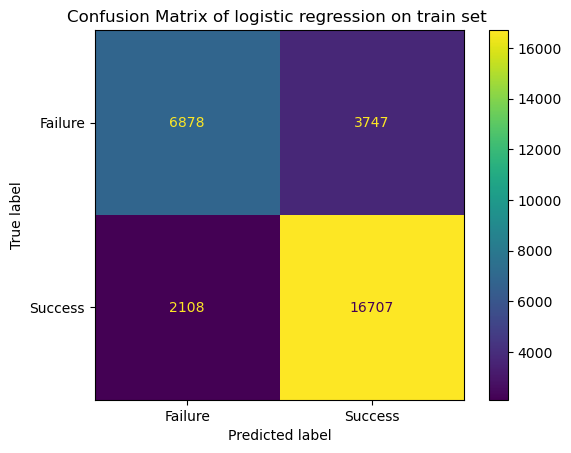

In [195]:
# confusion matrix of train set
confusion_matrix=metrics.confusion_matrix(train_lr["Actual_Class"],train_lr["Predicted_Class"])
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=["Failure","Success"])
cm_display.plot()
plt.title("Confusion Matrix of logistic regression on train set ")
plt.show()

In [196]:
# Let us check the accuracy on the train set
metrics.accuracy_score(train_lr["Actual_Class"],train_lr["Predicted_Class"])

0.8011209239130435

In [197]:
print(metrics.classification_report(train_lr["Actual_Class"],train_lr["Predicted_Class"]))

              precision    recall  f1-score   support

           0       0.77      0.65      0.70     10625
           1       0.82      0.89      0.85     18815

    accuracy                           0.80     29440
   macro avg       0.79      0.77      0.78     29440
weighted avg       0.80      0.80      0.80     29440



#### Model8 exhibits favorable metrics with a training accuracy of 78.26%, a recall of 89%, specificity at 60%, and precision reaching 80%. The ROC Curve will be plotted for a comprehensive evaluation of the model's performance.

In [198]:
# Creating function for ROC plot
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('Receiver operating characteristic')
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [199]:
fpr, tpr, thresholds = metrics.roc_curve(train_lr["Actual_Class"], train_lr["Predicted_Prob"], drop_intermediate = False )

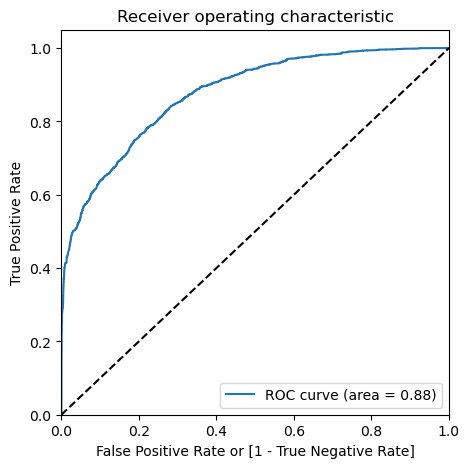

In [200]:
# ROC curve shows that this is a decent model
draw_roc(train_lr.Actual_Class, train_lr["Predicted_Prob"])

#### Finding the optimal cut off point for probability

In [201]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    train_lr[i]= train_lr["Predicted_Prob"].map(lambda x: 1 if x > i else 0)
train_lr.head()


,Predicted_Prob,Actual_Class,Predicted_Class,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.870309,0,1,1,1,1,1,1,1,1,1,1,0
1,0.539468,0,1,1,1,1,1,1,1,0,0,0,0
2,0.676729,1,1,1,1,1,1,1,1,1,0,0,0
3,0.975231,1,1,1,1,1,1,1,1,1,1,1,1
4,0.606062,0,1,1,1,1,1,1,1,1,0,0,0


In [202]:
# Now let's calculate accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(train_lr["Actual_Class"], train_lr[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.639096  1.000000  0.000000
0.1   0.1  0.670822  0.998512  0.090541
0.2   0.2  0.756726  0.976242  0.368000
0.3   0.3  0.784341  0.942758  0.503812
0.4   0.4  0.794293  0.917619  0.575906
0.5   0.5  0.801121  0.887962  0.647341
0.6   0.6  0.781895  0.795004  0.758682
0.7   0.7  0.748573  0.688174  0.855529
0.8   0.8  0.694260  0.551156  0.947671
0.9   0.9  0.635870  0.439862  0.982965


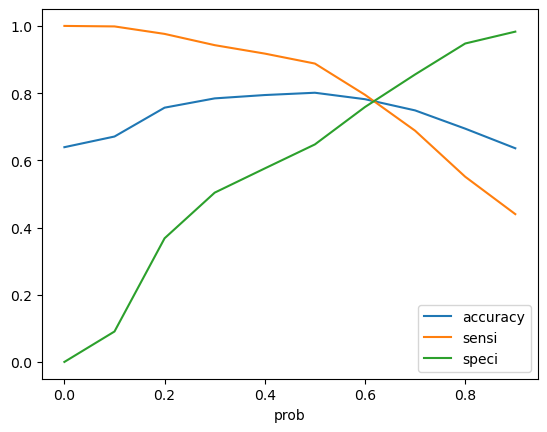

In [203]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()


#### The optimal cutoff point identified from the plot is approximately 0.62. Despite this, choosing a threshold of 0.5 is preferred, considering a slight reduction in sensitivity from 0.885 to 0.844 when shifting the probability threshold from 0.5 to 0.6.

## 7.Model Building- Random Forest, Hyper Parameter Tuning and Evaluation

#### For hyperparameter tuning, we'll explore different combinations to enhance the model's performance. Utilizing RandomForestClassifier, we aim to identify the optimal parameter set that yields a well-performing model before constructing it.

In [219]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create the RandomForestClassifier with default parameters
rc = RandomForestClassifier()

# Specify the parameter distributions for random search
param_distributions = {
    'max_depth': [5, 10, 15, 20],
    'max_features': [5, 10, 15, 20],
    'min_samples_leaf': [200, 500, 1000, 1500],
    'n_estimators': [25, 50, 80, 100]
}

# Create the RandomizedSearchCV object
randomized_search = RandomizedSearchCV(rc, param_distributions, n_iter=50, cv=5, n_jobs=-1)

# Fit the model on the scaled training data
randomized_search.fit(X_train_scaled, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'max_features': [5, 10, 15, 20],
                                        'min_samples_leaf': [200, 500, 1000,
                                                             1500],
                                        'n_estimators': [25, 50, 80, 100]})

In [222]:
# Checking the best random forest
best_random_forest = randomized_search.best_estimator_
best_random_forest

RandomForestClassifier(max_depth=15, max_features=20, min_samples_leaf=200,
                       n_estimators=80)

In [223]:
# Checking the score of the best random forest
best_random_forest_score = randomized_search.best_score_
best_random_forest_score


0.7947690217391304

In [225]:
# Assiging the results of grid serach in a dataframe
df_cv=pd.DataFrame(randomized_search.cv_results_)
df_cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.992660,0.029420,0.053770,0.004116,80,1500,15,10,"{'n_estimators': 80, 'min_samples_leaf': 1500,...",0.771230,0.752038,0.757133,0.759511,0.763247,0.760632,0.006427,35
1,0.656225,0.037135,0.021788,0.000748,25,1500,15,20,"{'n_estimators': 25, 'min_samples_leaf': 1500,...",0.771230,0.752038,0.757133,0.759511,0.763247,0.760632,0.006427,35
2,0.421158,0.032141,0.021788,0.000979,25,1000,5,5,"{'n_estimators': 25, 'min_samples_leaf': 1000,...",0.767154,0.754246,0.764096,0.755265,0.749830,0.758118,0.006468,48
3,1.927540,0.043166,0.056968,0.002279,50,200,10,20,"{'n_estimators': 50, 'min_samples_leaf': 200, ...",0.797724,0.782269,0.785156,0.791950,0.798913,0.791202,0.006617,5
4,0.798343,0.012945,0.030983,0.006030,25,500,10,20,"{'n_estimators': 25, 'min_samples_leaf': 500, ...",0.785666,0.772758,0.765115,0.783458,0.785666,0.778533,0.008239,20
5,4.232007,0.085801,0.072958,0.004688,80,500,20,20,"{'n_estimators': 80, 'min_samples_leaf': 500, ...",0.791610,0.771399,0.778872,0.779552,0.797045,0.783696,0.009300,11
6,0.545088,0.024664,0.022789,0.000747,25,1500,10,15,"{'n_estimators': 25, 'min_samples_leaf': 1500,...",0.762228,0.752208,0.757303,0.759511,0.763247,0.758899,0.003942,47
7,0.679667,0.024259,0.023415,0.002468,25,1500,15,5,"{'n_estimators': 25, 'min_samples_leaf': 1500,...",0.771230,0.751529,0.757133,0.759171,0.763247,0.760462,0.006577,44
8,5.173098,0.039248,0.109738,0.003427,100,200,15,15,"{'n_estimators': 100, 'min_samples_leaf': 200,...",0.805367,0.780571,0.789402,0.787194,0.799762,0.792459,0.008926,3
9,1.214563,0.041207,0.051571,0.002869,50,200,5,15,"{'n_estimators': 50, 'min_samples_leaf': 200, ...",0.795177,0.780061,0.775645,0.782099,0.791610,0.784918,0.007315,6


In [226]:
# sorting the values in df_cv
df_cv.sort_values("rank_test_score").head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
34,5.076654,0.052950,0.087750,0.003309,80,200,20,15,"{'n_estimators': 80, 'min_samples_leaf': 200, ...",0.808424,0.782439,0.788723,0.789742,0.804518,0.794769,0.009953,1
24,3.794612,0.086177,0.077754,0.003865,80,200,15,10,"{'n_estimators': 80, 'min_samples_leaf': 200, ...",0.798064,0.784477,0.789912,0.790591,0.800951,0.792799,0.005944,2
8,5.173098,0.039248,0.109738,0.003427,100,200,15,15,"{'n_estimators': 100, 'min_samples_leaf': 200,...",0.805367,0.780571,0.789402,0.787194,0.799762,0.792459,0.008926,3
12,1.614476,0.037580,0.035980,0.006538,25,200,20,15,"{'n_estimators': 25, 'min_samples_leaf': 200, ...",0.799762,0.782099,0.787364,0.784986,0.804008,0.791644,0.008632,4
3,1.927540,0.043166,0.056968,0.002279,50,200,10,20,"{'n_estimators': 50, 'min_samples_leaf': 200, ...",0.797724,0.782269,0.785156,0.791950,0.798913,0.791202,0.006617,5


#### Building the random forest model

In [228]:
# Fitting the random forest on train data
best_random_forest.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=15, max_features=20, min_samples_leaf=200,
                       n_estimators=80)

In [230]:
# cross val score of best_random forest
cross_val_score(best_random_forest,X_train_scaled,y_train,cv=5,n_jobs=-1).mean()

0.7946671195652174

In [233]:
from sklearn.ensemble import RandomForestClassifier

# Specify the parameter for the RandomForestClassifier, including oob_score=True
rc = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)

# Fit the model on your training data
rc.fit(X_train_scaled, y_train)

# Access the OOB score
oob_score = rc.oob_score_
print("Out-of-Bag (OOB) Score:", oob_score)


Out-of-Bag (OOB) Score: 0.8772758152173913


In [236]:
# recall score of best_rc
cross_val_score(best_random_forest,X_train_scaled,y_train,cv=5,n_jobs=-1,scoring="recall").mean()

0.8958809460536805

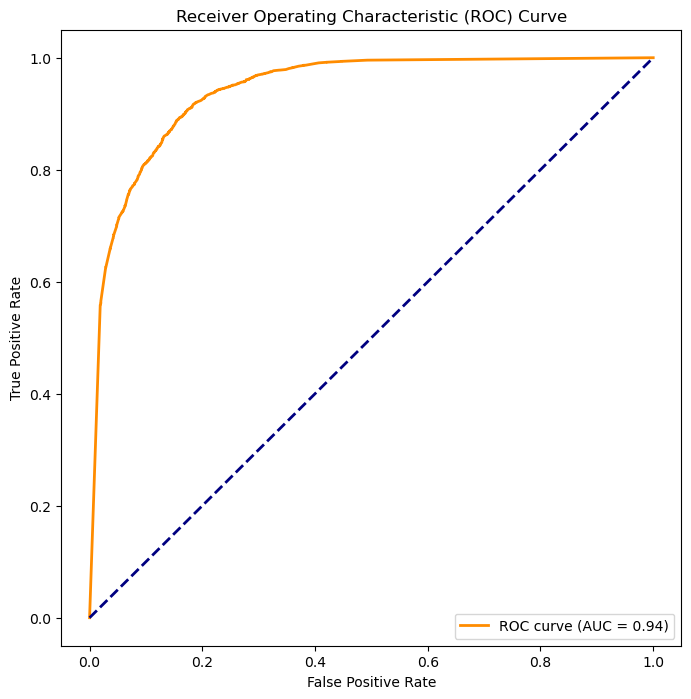

In [244]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Assuming you have X_train, y_train, X_test, y_test defined

# Instantiate RandomForestClassifier
best_classifier = RandomForestClassifier()

# Train the classifier on your training data
best_classifier.fit(X_train, y_train)

# Predict probabilities on the test set
y_score = best_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()





In [247]:
# Plotting the variable wise feature importance given by random forest
imp_df=pd.DataFrame({"VarName":X_train_scaled.columns,"Imp":best_random_forest.feature_importances_})
imp_df.sort_values(by="Imp",ascending=False)

,VarName,Imp
2,PAYMENT_TERM_30 Days from EOM,0.478427
10,PAYMENT_TERM_Immediate,0.132068
6,PAYMENT_TERM_60 Days from EOM,0.059973
40,CLUSTER_ID_1,0.059593
27,DUE_MONTH_6,0.052645
33,DUE_MONTH_12,0.045248
0,USD Amount,0.044287
1,PAYMENT_TERM_15 Days from EOM,0.036446
28,DUE_MONTH_7,0.016268
20,INVOICE_CURRENCY_CODE_SAR,0.008279


In [248]:
# Predictions on the train set using best_random_forestt
y_train_pred_rf=best_random_forest.predict(X_train_scaled)
y_train_pred_rf

array([1, 0, 1, ..., 1, 0, 1])

In [249]:
# Creating a dataframe with the Actual Class, Predicted Probability and Predicted Class on training set 
train_rf=pd.DataFrame()
train_rf["Predicted_Class"]=y_train_pred_rf
train_rf["Actual_Class"]=y_train.values
train_rf.head()

,Predicted_Class,Actual_Class
0,1,0
1,0,0
2,1,1
3,1,1
4,1,0


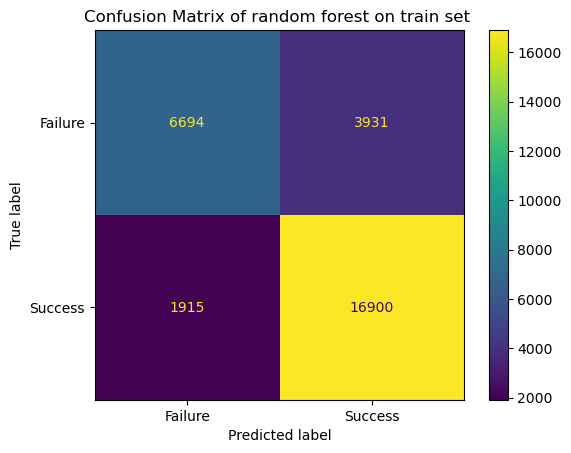

In [250]:
# confusion matrix ofbest_random_forest on train set
confusion_matrix=metrics.confusion_matrix(train_rf["Actual_Class"],train_rf["Predicted_Class"])
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=["Failure","Success"])
cm_display.plot()
plt.title("Confusion Matrix of random forest on train set ")
plt.show()

In [251]:
# The accuracy score on best_random_forest
metrics.accuracy_score(train_rf["Actual_Class"],train_rf["Predicted_Class"])

0.8014266304347826

In [253]:
# using classification report let check the performance of  best_random_forest
print(metrics.classification_report(train_rf["Actual_Class"],train_rf["Predicted_Class"]))

              precision    recall  f1-score   support

           0       0.78      0.63      0.70     10625
           1       0.81      0.90      0.85     18815

    accuracy                           0.80     29440
   macro avg       0.79      0.76      0.77     29440
weighted avg       0.80      0.80      0.80     29440



#### Random Forest best_random_forest gives an accuracy of 80%. Also it has a very good recall/sensitivity score of 90% on the train set. The auc in the roc curve is at 0.94.

## 8.Making predictions on the test set

In [ ]:
#### Let us see how our model performs on the test data. Let us start with logistic regression model- model 8

In [254]:
y_test_pred_lr=result8.predict(X_test_sm)
y_test_pred_lr.shape


(12618,)

In [255]:
lr_t=pd.DataFrame()
lr_t["Predicted_Prob"]=y_test_pred_lr
lr_t["Actual_Class"]=y_test.values
lr_t["Predicted_Class"]=np.where(lr_t["Predicted_Prob"]>0.5,1,0)
lr_t.head()

,Predicted_Prob,Actual_Class,Predicted_Class
0,0.671484,1,1
1,0.999980,1,1
2,0.690549,0,1
3,0.689403,1,1
4,0.109871,0,0


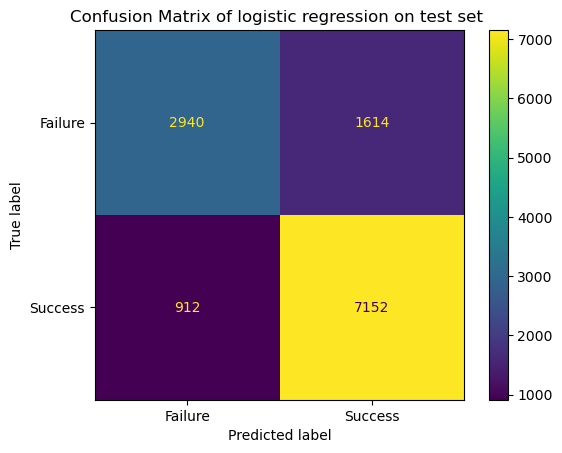

In [257]:
# confusion matrix on test data with model8
confusion_matrix=metrics.confusion_matrix(lr_t["Actual_Class"],lr_t["Predicted_Class"])
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=["Failure","Success"])
cm_display.plot()
plt.title("Confusion Matrix of logistic regression on test set ")
plt.show()

In [260]:
# accuracy score on test set
metrics.accuracy_score(lr_t["Actual_Class"],lr_t["Predicted_Class"])

0.7998097955301949

In [261]:
# Summary of evaluation metrics on test set
print(metrics.classification_report(lr_t["Actual_Class"],lr_t["Predicted_Class"]))

              precision    recall  f1-score   support

           0       0.76      0.65      0.70      4554
           1       0.82      0.89      0.85      8064

    accuracy                           0.80     12618
   macro avg       0.79      0.77      0.77     12618
weighted avg       0.80      0.80      0.80     12618



#### Good performance on test set.Sensitivity/recall score is 89% and accuracy is 80% and is very close to the test score

In [262]:
# Making predictions on the test set using best_random_forest. Let us create a DataFrame of the test set with the cut off point of 0.5
y_test_pred_rf=best_random_forest.predict(X_test_scaled)
rf_t=pd.DataFrame()
rf_t["Predicted_Class"]=y_test_pred_rf
rf_t["Actual_Class"]=y_test.values
rf_t.head()

,Predicted_Class,Actual_Class
0,1,1
1,1,1
2,1,0
3,1,1
4,0,0


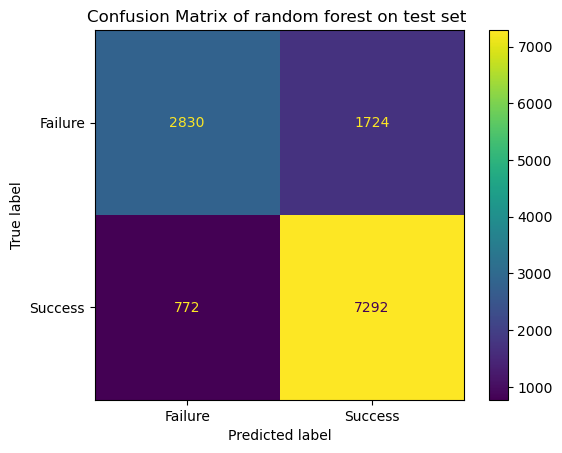

In [263]:
confusion_matrix=metrics.confusion_matrix(rf_t["Actual_Class"],rf_t["Predicted_Class"])
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=["Failure","Success"])
cm_display.plot()
plt.title("Confusion Matrix of random forest on test set ")
plt.show()

In [264]:
metrics.accuracy_score(rf_t.Actual_Class,rf_t["Predicted_Class"])

0.802187351402758

In [265]:
print(metrics.classification_report(rf_t["Actual_Class"],rf_t["Predicted_Class"]))

              precision    recall  f1-score   support

           0       0.79      0.62      0.69      4554
           1       0.81      0.90      0.85      8064

    accuracy                           0.80     12618
   macro avg       0.80      0.76      0.77     12618
weighted avg       0.80      0.80      0.80     12618



#### Good sensitivity/recall score on train and test data i. e 0.90.

## Summary

#### log reg - model 8

#### Train Data:
* Accuracy 0.80

* Sensitivity/Recall .89

* Precision 0.8

* AUC 0.85

#### Test Data:
* Accuracy - 0.80

* Sensitivity/Recall - 0.89

* Precision - 0.82

#### random forest- best_random_forest

#### Train Data:
* Accuracy - 0.80

* Sensitivity/Recall - 0.90

* Precision - 0.81

* AUC - 0.94

* oob_score - 0.88

#### Test Data:
* Accuracy - 0.8

* Sensitivity/Recall - 0.90

* Precision - 0.81

#### Since Random Forest performance is better, we will use this model best_random_forest for deployment.

## 9.Deployment on open invoices

#### Data Preparation

In [268]:
# Let us check the number of records
df_op.shape

(88204, 14)

In [270]:
df_op.head()

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,04-APR-2022 01:07:01,3rd Party,GIVE Corp,49144.0,100210000438,21/12/2021,Immediate,21/12/2021,AED,"-3,088",CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000052,01/02/2022,30 Days from Inv Date,03/03/2022,USD,"2,000",INVOICE,33,"2,000",2/1/2022 14:09
2,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000143,24/03/2022,30 Days from Inv Date,23/04/2022,USD,"2,000",INVOICE,-18,"2,000",3/24/2022 17:46
3,04-APR-2022 01:07:01,Related Party,AL R Corp,23312.0,100220000001,04/01/2022,15 Days from Inv Date,19/01/2022,AED,"2,415",INVOICE,76,"2,415",1/5/2022 11:49
4,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,03/03/2022,30 Days from EOM,30/04/2022,AED,"3,800",INVOICE,-25,"3,800",3/3/2022 22:30


In [271]:
df_op.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88204 entries, 0 to 88203
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AS_OF_DATE            88204 non-null  object 
 1   Customer Type         88204 non-null  object 
 2   Customer_Name         88204 non-null  object 
 3   Customer Account No   88201 non-null  float64
 4   Transaction Number    88195 non-null  object 
 5   Transaction Date      88204 non-null  object 
 6   Payment Term          88204 non-null  object 
 7   Due Date              88204 non-null  object 
 8   Transaction Currency  88204 non-null  object 
 9   Local Amount          88204 non-null  object 
 10  Transaction Class     88204 non-null  object 
 11  AGE                   88204 non-null  int64  
 12  USD Amount            88204 non-null  object 
 13  INV_CREATION_DATE     88204 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 9.4+ MB


In [274]:
df_op.duplicated().sum()

0

In [275]:
# Let us  look for missing records
df_op.isnull().sum()

AS_OF_DATE              0
Customer Type           0
Customer_Name           0
Customer Account No     3
Transaction Number      9
Transaction Date        0
Payment Term            0
Due Date                0
Transaction Currency    0
Local Amount            0
Transaction Class       0
AGE                     0
USD Amount              0
INV_CREATION_DATE       0
dtype: int64

In [276]:
# droping the columns "AS_OF_DATE, Customer Account No and Transaction Number"
df_op.drop(["AS_OF_DATE","Customer Account No","Transaction Number"],axis=1,inplace=True)
df_op.shape

(88204, 11)

In [277]:
df_op.isnull().sum()

Customer Type           0
Customer_Name           0
Transaction Date        0
Payment Term            0
Due Date                0
Transaction Currency    0
Local Amount            0
Transaction Class       0
AGE                     0
USD Amount              0
INV_CREATION_DATE       0
dtype: int64

In [278]:
df_op.describe()

,AGE
count,88204.000000
mean,183.430706
std,368.123334
min,-359.000000
25%,-17.000000
50%,47.000000
75%,242.000000
max,7343.000000


In [280]:
# only dealing with records where age is negative
df_op=df_op[df_op["AGE"]<0]
df_op.shape

(28080, 11)

In [281]:
df_op.head()

,Customer Type,Customer_Name,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
2,Related Party,AL J Corp,24/03/2022,30 Days from Inv Date,23/04/2022,USD,"2,000",INVOICE,-18,"2,000",3/24/2022 17:46
4,Related Party,ALLI Corp,03/03/2022,30 Days from EOM,30/04/2022,AED,"3,800",INVOICE,-25,"3,800",3/3/2022 22:30
5,Related Party,ALLI Corp,03/03/2022,30 Days from EOM,30/04/2022,AED,"1,264",INVOICE,-25,"1,264",3/3/2022 22:30
6,Related Party,ALLI Corp,15/03/2022,30 Days from EOM,30/04/2022,AED,"25,858",INVOICE,-25,"25,858",3/15/2022 19:06
7,Related Party,ALLI Corp,15/03/2022,30 Days from EOM,30/04/2022,AED,"39,873",INVOICE,-25,"39,873",3/15/2022 19:06


In [282]:
# Our final model best_random_forest had the below columns. We need to work on df_op to get the same.
X_train_scaled.columns

Index(['USD Amount', 'PAYMENT_TERM_15 Days from EOM',
       'PAYMENT_TERM_30 Days from EOM', 'PAYMENT_TERM_30 Days from Inv Date',
       'PAYMENT_TERM_45 Days from EOM', 'PAYMENT_TERM_45 Days from Inv Date',
       'PAYMENT_TERM_60 Days from EOM', 'PAYMENT_TERM_60 Days from Inv Date',
       'PAYMENT_TERM_90 Days from EOM', 'PAYMENT_TERM_90 Days from Inv Date',
       'PAYMENT_TERM_Immediate', 'PAYMENT_TERM_Others', 'INVOICE_CLASS_DM',
       'INVOICE_CLASS_INV', 'INVOICE_CURRENCY_CODE_BHD',
       'INVOICE_CURRENCY_CODE_EUR', 'INVOICE_CURRENCY_CODE_GBP',
       'INVOICE_CURRENCY_CODE_JOD', 'INVOICE_CURRENCY_CODE_KWD',
       'INVOICE_CURRENCY_CODE_QAR', 'INVOICE_CURRENCY_CODE_SAR',
       'INVOICE_CURRENCY_CODE_USD', 'INVOICE_CURRENCY_CODE_ZAR', 'DUE_MONTH_2',
       'DUE_MONTH_3', 'DUE_MONTH_4', 'DUE_MONTH_5', 'DUE_MONTH_6',
       'DUE_MONTH_7', 'DUE_MONTH_8', 'DUE_MONTH_9', 'DUE_MONTH_10',
       'DUE_MONTH_11', 'DUE_MONTH_12', 'DUE_DAY_1', 'DUE_DAY_2', 'DUE_DAY_3',
       'DUE_D

In [283]:
# Dropping the columns that are not required
df_op.drop(["Customer Type","Transaction Date","Local Amount","INV_CREATION_DATE"],axis=1,inplace=True)
df_op.head()

,Customer_Name,Payment Term,Due Date,Transaction Currency,Transaction Class,AGE,USD Amount
2,AL J Corp,30 Days from Inv Date,23/04/2022,USD,INVOICE,-18,"2,000"
4,ALLI Corp,30 Days from EOM,30/04/2022,AED,INVOICE,-25,"3,800"
5,ALLI Corp,30 Days from EOM,30/04/2022,AED,INVOICE,-25,"1,264"
6,ALLI Corp,30 Days from EOM,30/04/2022,AED,INVOICE,-25,"25,858"
7,ALLI Corp,30 Days from EOM,30/04/2022,AED,INVOICE,-25,"39,873"


In [285]:
# formatting the date
df_op["Due Date"]=pd.to_datetime(df_op["Due Date"],format="%d/%m/%Y")
df_op.head()

,Customer_Name,Payment Term,Due Date,Transaction Currency,Transaction Class,AGE,USD Amount
2,AL J Corp,30 Days from Inv Date,2022-04-23,USD,INVOICE,-18,"2,000"
4,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,"3,800"
5,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,"1,264"
6,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,"25,858"
7,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,"39,873"


In [286]:
# Let us change the format of USD amount
df_op["USD Amount"]=df_op["USD Amount"].apply(lambda x : x.replace(",",""))
df_op["USD Amount"]=df_op["USD Amount"].astype(int)

In [287]:
df_op.head()

,Customer_Name,Payment Term,Due Date,Transaction Currency,Transaction Class,AGE,USD Amount
2,AL J Corp,30 Days from Inv Date,2022-04-23,USD,INVOICE,-18,2000
4,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,3800
5,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,1264
6,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,25858
7,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,39873


In [288]:
df_op.describe()

,Due Date,AGE,USD Amount
count,28080,28080.000000,2.808000e+04
mean,2022-05-09 10:58:58.461538560,-34.457621,9.317022e+03
min,2022-04-06 00:00:00,-359.000000,-5.332270e+05
25%,2022-04-25 00:00:00,-55.000000,5.750000e+02
50%,2022-04-30 00:00:00,-25.000000,1.795000e+03
75%,2022-05-30 00:00:00,-20.000000,5.835250e+03
max,2023-03-30 00:00:00,-1.000000,5.978000e+06
std,NaN,21.659564,5.655069e+04


In [289]:
# let us see the records where invoice value is 0.
df_op[df_op["USD Amount"]<= 0]

,Customer_Name,Payment Term,Due Date,Transaction Currency,Transaction Class,AGE,USD Amount
1858,AHME Corp,Immediate,2022-05-01,SAR,PAYMENT,-26,-533227
1907,AL J Corp,Immediate,2022-05-17,SAR,PAYMENT,-42,-181596
2322,NAHR Corp,Immediate,2022-06-01,SAR,PAYMENT,-57,-266613
2517,RAWA Corp,60 Days from Inv Date,2022-05-01,SAR,INVOICE,-26,0
2579,SAYU Corp,60 Days from Inv Date,2022-04-06,SAR,INVOICE,-1,0
2615,SUHA Corp,Immediate,2022-06-15,SAR,PAYMENT,-71,-93315
7655,DAY Corp,Immediate,2022-04-10,AED,PAYMENT,-5,-1048
7656,DAY Corp,Immediate,2022-04-10,AED,PAYMENT,-5,-9162
8511,IHSA Corp,Immediate,2022-04-30,AED,PAYMENT,-25,-3049
11357,SLAS Corp,Immediate,2022-04-15,AED,PAYMENT,-10,-3790


In [290]:
df_op=df_op[df_op["USD Amount"]>0]
df_op.head()

,Customer_Name,Payment Term,Due Date,Transaction Currency,Transaction Class,AGE,USD Amount
2,AL J Corp,30 Days from Inv Date,2022-04-23,USD,INVOICE,-18,2000
4,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,3800
5,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,1264
6,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,25858
7,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,39873


In [291]:
# Lets see no payment related data.
df_op["Transaction Class"].value_counts()

Transaction Class
INVOICE       27732
DEBIT NOTE      283
Name: count, dtype: int64

In [292]:
# Rename the levels in Variable Transaction Class
df_op["Transaction Class"]=df_op["Transaction Class"].apply(lambda x: x.replace("INVOICE","INV"))
df_op["Transaction Class"]=df_op["Transaction Class"].apply(lambda x: x.replace("DEBIT NOTE","DM"))

In [293]:
df_op["Transaction Class"].value_counts()

Transaction Class
INV    27732
DM       283
Name: count, dtype: int64

In [294]:
# let see the levels in Payment Term in open invoices
df_op["Payment Term"].unique()

array(['30 Days from Inv Date', '30 Days from EOM', '15 Days from EOM',
       '25 DAYS FROM EOM', '45 Days from Inv Date',
       '60 Days from Inv Date', '45 Days from EOM', '60 Days from EOM',
       'LC at 60 days', '75 Days from EOM', '90 Days from EOM',
       '90 Days from Inv Date', '120 Days from Inv Date',
       '75 Days from Inv Date', '70 days from Invoice Date',
       '45 DAYS + EOM', '15 Days from Inv Date', '120 Days from EOM',
       '365 DAYS FROM INVOICE DATE', '40 DAYS FROM EOM',
       '180 DAYS FROM INV DATE',
       '30% advance 70% after 60 days from invoice date',
       '50% ADV 50% 30 Days'], dtype=object)

In [298]:
# lets see the levels in Payment Term in df_bb dataframe
df_bb["PAYMENT_TERM"].unique()

array(['30 Days from EOM', '30 Days from Inv Date', '45 Days from EOM',
       'Immediate', '100% Adv Payment', '15 Days from EOM', 'Others',
       '60 Days from EOM', '60 Days from Inv Date',
       '45 Days from Inv Date', '90 Days from Inv Date',
       '90 Days from EOM'], dtype=object)

In [301]:
# merging the names that are similar
df_op["Payment Term"]=df_op["Payment Term"].replace(["Immediate Payment"],"Immediate")
df_op["Payment Term"]=df_op["Payment Term"].replace(["45 DAYS + EOM",],"45 Days from EOM")
value_to_keep


Index(['30 Days from EOM', '30 Days from Inv Date', 'Immediate',
       '60 Days from Inv Date', '60 Days from EOM', '15 Days from EOM',
       '45 Days from Inv Date', '90 Days from EOM', '45 Days from EOM',
       '90 Days from Inv Date', '100% Adv Payment'],
      dtype='object', name='PAYMENT_TERM')

In [302]:
# checking the levels in payment term in open invoices data
df_op["Payment Term"]= df_op["Payment Term"].apply(lambda x: x if x in value_to_keep else "Others")

In [303]:
df_op["Payment Term"].value_counts()

Payment Term
60 Days from Inv Date    9781
60 Days from EOM         5693
30 Days from Inv Date    3057
30 Days from EOM         2628
Others                   2277
90 Days from EOM         1271
90 Days from Inv Date    1213
45 Days from EOM          752
45 Days from Inv Date     739
15 Days from EOM          604
Name: count, dtype: int64

In [304]:
# lets check due date and due month from due date
df_op["DUE_MONTH"]=df_op["Due Date"].dt.month
df_op["DUE_DAY"]=df_op["Due Date"].dt.weekday
df_op.head()

,Customer_Name,Payment Term,Due Date,Transaction Currency,Transaction Class,AGE,USD Amount,DUE_MONTH,DUE_DAY
2,AL J Corp,30 Days from Inv Date,2022-04-23,USD,INV,-18,2000,4,5
4,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,3800,4,5
5,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,1264,4,5
6,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,25858,4,5
7,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,39873,4,5


In [305]:
# rename the columns to bring parity in the names
df_op.rename(columns={"Customer_Name": "CUSTOMER_NAME","Payment Term":"PAYMENT_TERM",
                              "Transaction Class":"INVOICE_CLASS","Transaction Currency":"INVOICE_CURRENCY_CODE"
                             },inplace=True)
df_op.head()

,CUSTOMER_NAME,PAYMENT_TERM,Due Date,INVOICE_CURRENCY_CODE,INVOICE_CLASS,AGE,USD Amount,DUE_MONTH,DUE_DAY
2,AL J Corp,30 Days from Inv Date,2022-04-23,USD,INV,-18,2000,4,5
4,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,3800,4,5
5,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,1264,4,5
6,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,25858,4,5
7,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,39873,4,5


In [306]:
# let us check the data shape
df_op.shape

(28015, 9)

In [307]:
# checking the dictionary df_dict to inncorporate Cluster ID into the open invoices data
df_dict.info()

<class 'pandas.core.frame.DataFrame'>
Index: 689 entries, 3D D Corp to ZV F Corp
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   CLUSTER_ID  689 non-null    int32
dtypes: int32(1)
memory usage: 24.2+ KB


In [309]:
# merging open invoices data with cust dict
df_mer=pd.merge(df_op,df_dict, how="left",on="CUSTOMER_NAME")
df_mer.shape

(28015, 10)

In [310]:
# checking for null values after the merge
df_mer.isnull().mean()*100

CUSTOMER_NAME            0.000000
PAYMENT_TERM             0.000000
Due Date                 0.000000
INVOICE_CURRENCY_CODE    0.000000
INVOICE_CLASS            0.000000
AGE                      0.000000
USD Amount               0.000000
DUE_MONTH                0.000000
DUE_DAY                  0.000000
CLUSTER_ID               2.741389
dtype: float64

In [311]:
# Let us drop the rows with missing values as it of no use
df_mer.dropna(axis=0,inplace=True)
df_mer.shape

(27247, 10)

In [312]:
df_mer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27247 entries, 0 to 28014
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   CUSTOMER_NAME          27247 non-null  object        
 1   PAYMENT_TERM           27247 non-null  object        
 2   Due Date               27247 non-null  datetime64[ns]
 3   INVOICE_CURRENCY_CODE  27247 non-null  object        
 4   INVOICE_CLASS          27247 non-null  object        
 5   AGE                    27247 non-null  int64         
 6   USD Amount             27247 non-null  int32         
 7   DUE_MONTH              27247 non-null  int32         
 8   DUE_DAY                27247 non-null  int32         
 9   CLUSTER_ID             27247 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(3), int64(1), object(4)
memory usage: 2.0+ MB


In [313]:
# Since Cluster id is in float format, let us change the same to integer before dummy variable creation
df_mer["CLUSTER_ID"]=df_mer["CLUSTER_ID"].astype(int)

In [317]:
# Let us create the dummy variables 
dum_op=pd.get_dummies(df_mer[["PAYMENT_TERM","INVOICE_CLASS","INVOICE_CURRENCY_CODE"]],drop_first=False,dtype=int)
dum_op.head()

,PAYMENT_TERM_15 Days from EOM,PAYMENT_TERM_30 Days from EOM,PAYMENT_TERM_30 Days from Inv Date,PAYMENT_TERM_45 Days from EOM,PAYMENT_TERM_45 Days from Inv Date,PAYMENT_TERM_60 Days from EOM,PAYMENT_TERM_60 Days from Inv Date,PAYMENT_TERM_90 Days from EOM,PAYMENT_TERM_90 Days from Inv Date,PAYMENT_TERM_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,INVOICE_CURRENCY_CODE_AED,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EGP,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_HKD,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_OMR,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_SGD,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [319]:
# merging dummy variables with df_mer
df_mer=pd.concat([df_mer,dum_op],axis=1)

In [321]:
# creating dummy variable for DUE_MONTH
dum_op2=pd.get_dummies(df_mer["DUE_MONTH"],prefix="DUE_MONTH",drop_first=False,dtype=int)
dum_op2.head()

,DUE_MONTH_3,DUE_MONTH_4,DUE_MONTH_5,DUE_MONTH_6,DUE_MONTH_7,DUE_MONTH_8,DUE_MONTH_9,DUE_MONTH_10,DUE_MONTH_11,DUE_MONTH_12
0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0


In [322]:
# merging dummy variables with df_mer
df_mer=pd.concat([df_mer,dum_op2],axis=1)

In [324]:
# creating dummy variable for CLUSTER ID
dum_op3=pd.get_dummies(df_mer["CLUSTER_ID"],prefix="CLUSTER_ID",drop_first=False,dtype=int)
dum_op3.head()

,CLUSTER_ID_0,CLUSTER_ID_1,CLUSTER_ID_2
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [325]:
# merging dummy variables with merged_open_df
df_mer=pd.concat([df_mer,dum_op3],axis=1)
df_mer.head()

,CUSTOMER_NAME,PAYMENT_TERM,Due Date,INVOICE_CURRENCY_CODE,INVOICE_CLASS,AGE,USD Amount,DUE_MONTH,DUE_DAY,CLUSTER_ID,PAYMENT_TERM_15 Days from EOM,PAYMENT_TERM_30 Days from EOM,PAYMENT_TERM_30 Days from Inv Date,PAYMENT_TERM_45 Days from EOM,PAYMENT_TERM_45 Days from Inv Date,PAYMENT_TERM_60 Days from EOM,PAYMENT_TERM_60 Days from Inv Date,PAYMENT_TERM_90 Days from EOM,PAYMENT_TERM_90 Days from Inv Date,PAYMENT_TERM_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,INVOICE_CURRENCY_CODE_AED,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EGP,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_HKD,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_OMR,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_SGD,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR,DUE_MONTH_3,DUE_MONTH_4,DUE_MONTH_5,DUE_MONTH_6,DUE_MONTH_7,DUE_MONTH_8,DUE_MONTH_9,DUE_MONTH_10,DUE_MONTH_11,DUE_MONTH_12,CLUSTER_ID_0,CLUSTER_ID_1,CLUSTER_ID_2
0,AL J Corp,30 Days from Inv Date,2022-04-23,USD,INV,-18,2000,4,5,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,3800,4,5,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,1264,4,5,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,25858,4,5,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,39873,4,5,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [326]:
# creating dummy variable for DUE_DAY
dum_op4=pd.get_dummies(df_mer["DUE_DAY"],prefix="DUE_DAY",drop_first=False,dtype=int)
dum_op4.head()

,DUE_DAY_0,DUE_DAY_1,DUE_DAY_2,DUE_DAY_3,DUE_DAY_4,DUE_DAY_5,DUE_DAY_6
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0


In [327]:
df_mer=pd.concat([df_mer,dum_op4],axis=1)

In [328]:
# adding columns that are required for model deployment but are missing in open invoices.

list_feat=list(X_train_scaled.columns)
new=[]
for i in list_feat:
    if i not in df_mer.columns:
        df_mer[i]=df_mer[i].values[:]=0

df_mer.columns

Index(['CUSTOMER_NAME', 'PAYMENT_TERM', 'Due Date', 'INVOICE_CURRENCY_CODE',
       'INVOICE_CLASS', 'AGE', 'USD Amount', 'DUE_MONTH', 'DUE_DAY',
       'CLUSTER_ID', 'PAYMENT_TERM_15 Days from EOM',
       'PAYMENT_TERM_30 Days from EOM', 'PAYMENT_TERM_30 Days from Inv Date',
       'PAYMENT_TERM_45 Days from EOM', 'PAYMENT_TERM_45 Days from Inv Date',
       'PAYMENT_TERM_60 Days from EOM', 'PAYMENT_TERM_60 Days from Inv Date',
       'PAYMENT_TERM_90 Days from EOM', 'PAYMENT_TERM_90 Days from Inv Date',
       'PAYMENT_TERM_Others', 'INVOICE_CLASS_DM', 'INVOICE_CLASS_INV',
       'INVOICE_CURRENCY_CODE_AED', 'INVOICE_CURRENCY_CODE_BHD',
       'INVOICE_CURRENCY_CODE_EGP', 'INVOICE_CURRENCY_CODE_EUR',
       'INVOICE_CURRENCY_CODE_GBP', 'INVOICE_CURRENCY_CODE_HKD',
       'INVOICE_CURRENCY_CODE_JOD', 'INVOICE_CURRENCY_CODE_KWD',
       'INVOICE_CURRENCY_CODE_OMR', 'INVOICE_CURRENCY_CODE_QAR',
       'INVOICE_CURRENCY_CODE_SAR', 'INVOICE_CURRENCY_CODE_SGD',
       'INVOICE_CURRENCY_CO

#### # We can see that variable 'PAYMENT_TERM_Immediate', 'DUE_MONTH_2' were created

In [329]:
# Let us check the columns in X_train_scaled that was used for building the model
X_train_scaled.head()

,USD Amount,PAYMENT_TERM_15 Days from EOM,PAYMENT_TERM_30 Days from EOM,PAYMENT_TERM_30 Days from Inv Date,PAYMENT_TERM_45 Days from EOM,PAYMENT_TERM_45 Days from Inv Date,PAYMENT_TERM_60 Days from EOM,PAYMENT_TERM_60 Days from Inv Date,PAYMENT_TERM_90 Days from EOM,PAYMENT_TERM_90 Days from Inv Date,PAYMENT_TERM_Immediate,PAYMENT_TERM_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR,DUE_MONTH_2,DUE_MONTH_3,DUE_MONTH_4,DUE_MONTH_5,DUE_MONTH_6,DUE_MONTH_7,DUE_MONTH_8,DUE_MONTH_9,DUE_MONTH_10,DUE_MONTH_11,DUE_MONTH_12,DUE_DAY_1,DUE_DAY_2,DUE_DAY_3,DUE_DAY_4,DUE_DAY_5,DUE_DAY_6,CLUSTER_ID_1,CLUSTER_ID_2
0,0.003134,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.004454,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000034,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.004337,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.055265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [330]:
# Let us extract only the X_train_scaled columns from df_mer.
mer_final=df_mer[X_train_scaled.columns]
mer_final.head()

,USD Amount,PAYMENT_TERM_15 Days from EOM,PAYMENT_TERM_30 Days from EOM,PAYMENT_TERM_30 Days from Inv Date,PAYMENT_TERM_45 Days from EOM,PAYMENT_TERM_45 Days from Inv Date,PAYMENT_TERM_60 Days from EOM,PAYMENT_TERM_60 Days from Inv Date,PAYMENT_TERM_90 Days from EOM,PAYMENT_TERM_90 Days from Inv Date,PAYMENT_TERM_Immediate,PAYMENT_TERM_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR,DUE_MONTH_2,DUE_MONTH_3,DUE_MONTH_4,DUE_MONTH_5,DUE_MONTH_6,DUE_MONTH_7,DUE_MONTH_8,DUE_MONTH_9,DUE_MONTH_10,DUE_MONTH_11,DUE_MONTH_12,DUE_DAY_1,DUE_DAY_2,DUE_DAY_3,DUE_DAY_4,DUE_DAY_5,DUE_DAY_6,CLUSTER_ID_1,CLUSTER_ID_2
0,2000,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,3800,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,1264,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,25858,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,39873,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [332]:
# Scaling the data before deploying the model
mer_final_scaled=scaler.transform(mer_final)
mer_final_scaled=pd.DataFrame(mer_final_scaled,columns=mer_final.columns)
mer_final_scaled.head()

,USD Amount,PAYMENT_TERM_15 Days from EOM,PAYMENT_TERM_30 Days from EOM,PAYMENT_TERM_30 Days from Inv Date,PAYMENT_TERM_45 Days from EOM,PAYMENT_TERM_45 Days from Inv Date,PAYMENT_TERM_60 Days from EOM,PAYMENT_TERM_60 Days from Inv Date,PAYMENT_TERM_90 Days from EOM,PAYMENT_TERM_90 Days from Inv Date,PAYMENT_TERM_Immediate,PAYMENT_TERM_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR,DUE_MONTH_2,DUE_MONTH_3,DUE_MONTH_4,DUE_MONTH_5,DUE_MONTH_6,DUE_MONTH_7,DUE_MONTH_8,DUE_MONTH_9,DUE_MONTH_10,DUE_MONTH_11,DUE_MONTH_12,DUE_DAY_1,DUE_DAY_2,DUE_DAY_3,DUE_DAY_4,DUE_DAY_5,DUE_DAY_6,CLUSTER_ID_1,CLUSTER_ID_2
0,0.000184,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.000350,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.000116,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.002383,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.003675,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [333]:
# Using random forest best_random_forest for predicting the probability of delayed payments on open invoices
y_open_invoices=best_random_forest.predict_proba(mer_final_scaled)[:,1]
y_open_invoices

array([0.73275532, 0.28785277, 0.31936642, ..., 0.70272617, 0.7028961 ,
       0.6887492 ])

In [334]:
# Let us create a column for the probability of delay in merged_open_df
df_mer["Prob_Pred_rf"]=y_open_invoices
df_mer.head()

,CUSTOMER_NAME,PAYMENT_TERM,Due Date,INVOICE_CURRENCY_CODE,INVOICE_CLASS,AGE,USD Amount,DUE_MONTH,DUE_DAY,CLUSTER_ID,PAYMENT_TERM_15 Days from EOM,PAYMENT_TERM_30 Days from EOM,PAYMENT_TERM_30 Days from Inv Date,PAYMENT_TERM_45 Days from EOM,PAYMENT_TERM_45 Days from Inv Date,PAYMENT_TERM_60 Days from EOM,PAYMENT_TERM_60 Days from Inv Date,PAYMENT_TERM_90 Days from EOM,PAYMENT_TERM_90 Days from Inv Date,PAYMENT_TERM_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,INVOICE_CURRENCY_CODE_AED,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EGP,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_HKD,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_OMR,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_SGD,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR,DUE_MONTH_3,DUE_MONTH_4,DUE_MONTH_5,DUE_MONTH_6,DUE_MONTH_7,DUE_MONTH_8,DUE_MONTH_9,DUE_MONTH_10,DUE_MONTH_11,DUE_MONTH_12,CLUSTER_ID_0,CLUSTER_ID_1,CLUSTER_ID_2,DUE_DAY_0,DUE_DAY_1,DUE_DAY_2,DUE_DAY_3,DUE_DAY_4,DUE_DAY_5,DUE_DAY_6,PAYMENT_TERM_Immediate,DUE_MONTH_2,Prob_Pred_rf
0,AL J Corp,30 Days from Inv Date,2022-04-23,USD,INV,-18,2000,4,5,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0.732755
1,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,3800,4,5,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0.287853
2,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,1264,4,5,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0.319366
3,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,25858,4,5,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0.242271
4,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,39873,4,5,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0.208646


In [335]:
# Let us map the Predicted Class using the probability threshold of 0.5
df_mer["Final_Prediction"]=df_mer["Prob_Pred_rf"].apply(lambda x: 1 if x>0.5 else 0)
df_mer.head()

,CUSTOMER_NAME,PAYMENT_TERM,Due Date,INVOICE_CURRENCY_CODE,INVOICE_CLASS,AGE,USD Amount,DUE_MONTH,DUE_DAY,CLUSTER_ID,PAYMENT_TERM_15 Days from EOM,PAYMENT_TERM_30 Days from EOM,PAYMENT_TERM_30 Days from Inv Date,PAYMENT_TERM_45 Days from EOM,PAYMENT_TERM_45 Days from Inv Date,PAYMENT_TERM_60 Days from EOM,PAYMENT_TERM_60 Days from Inv Date,PAYMENT_TERM_90 Days from EOM,PAYMENT_TERM_90 Days from Inv Date,PAYMENT_TERM_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,INVOICE_CURRENCY_CODE_AED,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EGP,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_HKD,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_OMR,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_SGD,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR,DUE_MONTH_3,DUE_MONTH_4,DUE_MONTH_5,DUE_MONTH_6,DUE_MONTH_7,DUE_MONTH_8,DUE_MONTH_9,DUE_MONTH_10,DUE_MONTH_11,DUE_MONTH_12,CLUSTER_ID_0,CLUSTER_ID_1,CLUSTER_ID_2,DUE_DAY_0,DUE_DAY_1,DUE_DAY_2,DUE_DAY_3,DUE_DAY_4,DUE_DAY_5,DUE_DAY_6,PAYMENT_TERM_Immediate,DUE_MONTH_2,Prob_Pred_rf,Final_Prediction
0,AL J Corp,30 Days from Inv Date,2022-04-23,USD,INV,-18,2000,4,5,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0.732755,1
1,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,3800,4,5,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0.287853,0
2,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,1264,4,5,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0.319366,0
3,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,25858,4,5,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0.242271,0
4,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,39873,4,5,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0.208646,0


## 10. Insights on Deployed Data

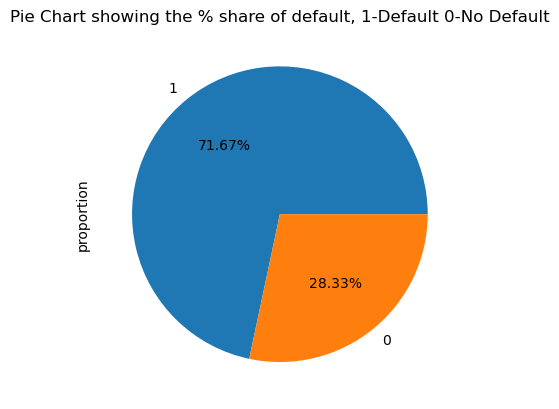

In [336]:
# Let us see the split of predicted delayed and timely payments
df_mer["Final_Prediction"].value_counts(normalize=True).plot.pie(autopct="%.2f%%")
plt.title("Pie Chart showing the % share of default, 1-Default 0-No Default")
plt.show()

In [337]:
# Aggregating probability of late payments at customer level
df_mer.groupby("CUSTOMER_NAME")["Prob_Pred_rf"].mean().sort_values(ascending=False)

CUSTOMER_NAME
MAYC Corp    0.827827
HUCK Corp    0.783632
CUTE Corp    0.778526
VELO Corp    0.778526
BECC Corp    0.777862
               ...   
MCT  Corp    0.306412
JUMB Corp    0.305950
GROS Corp    0.303610
J A  Corp    0.292085
ARMA Corp    0.280675
Name: Prob_Pred_rf, Length: 396, dtype: float64

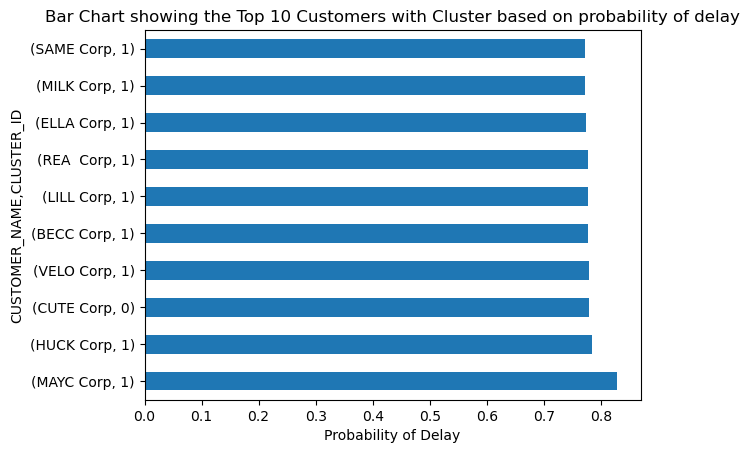

In [338]:
# Top 10 customers based on probability of delay with the customer segmentation cluster they belong
df_mer.groupby(["CUSTOMER_NAME","CLUSTER_ID"])["Prob_Pred_rf"].mean().sort_values(ascending=False).head(10).plot.barh()
plt.title("Bar Chart showing the Top 10 Customers with Cluster based on probability of delay")
plt.xlabel("Probability of Delay")
plt.show()

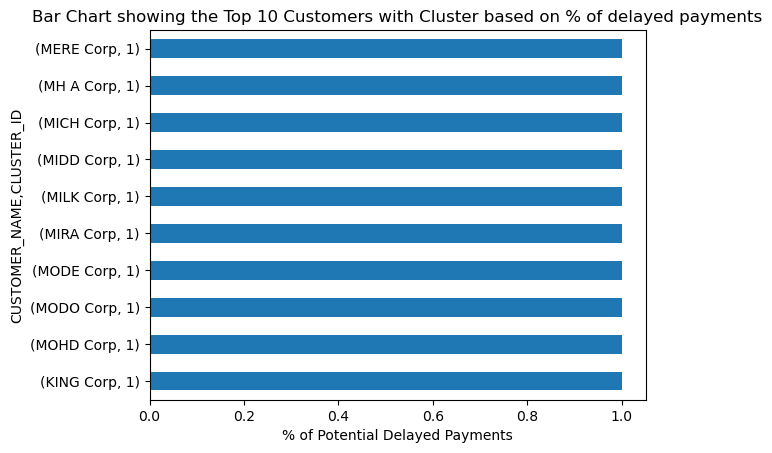

In [339]:
# Top 10 customers based on % of potential delays with the customer segmentation cluster they belong
df_mer.groupby(["CUSTOMER_NAME","CLUSTER_ID"])["Final_Prediction"].mean().sort_values(ascending=False).head(10).plot.barh()
plt.title("Bar Chart showing the Top 10 Customers with Cluster based on % of delayed payments")
plt.xlabel("% of Potential Delayed Payments")
plt.show()

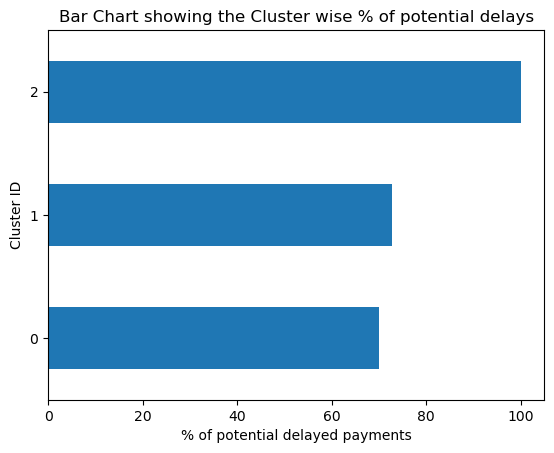

In [340]:
# Let us see the predictions cluster wise 
(df_mer.groupby(["CLUSTER_ID"])["Final_Prediction"].mean()*100).plot.barh()
plt.title("Bar Chart showing the Cluster wise % of potential delays")
plt.xlabel("% of potential delayed payments")
plt.ylabel("Cluster ID")
plt.show()

In [341]:
# Let us see the number of customers in each cluster.
df_mer.groupby(["CLUSTER_ID"])["CUSTOMER_NAME"].nunique()

CLUSTER_ID
0     43
1    351
2      2
Name: CUSTOMER_NAME, dtype: int64

In [342]:
# Let us see the names of the customers in cluster 0 as there will 100% delays in these cases
df_mer[df_mer["CLUSTER_ID"]==0].groupby("CUSTOMER_NAME")["Prob_Pred_rf"].mean()

CUSTOMER_NAME
AFRI Corp    0.679520
AL M Corp    0.744656
AL N Corp    0.666344
AL S Corp    0.614989
AL Y Corp    0.742051
APPA Corp    0.666455
CAIR Corp    0.708181
CITY Corp    0.703112
CUTE Corp    0.778526
DCLA Corp    0.468419
DEBE Corp    0.607278
DELH Corp    0.697932
DUBA Corp    0.709807
EBDA Corp    0.696533
FARM Corp    0.744152
FARO Corp    0.580085
FEND Corp    0.651078
FREN Corp    0.589218
FUN  Corp    0.664825
GALE Corp    0.524648
GOEL Corp    0.470378
HABC Corp    0.605844
IHSA Corp    0.765081
IL G Corp    0.712403
INGI Corp    0.612719
JASH Corp    0.696564
JAZI Corp    0.694145
LIFE Corp    0.642881
LOUI Corp    0.644479
LUXU Corp    0.646890
MABR Corp    0.703592
MAC  Corp    0.659091
MANS Corp    0.765156
ORFE Corp    0.671916
PARI Corp    0.734710
QATA Corp    0.708503
SAUD Corp    0.756527
SENS Corp    0.534785
SEPH Corp    0.644138
SONO Corp    0.416591
SUHA Corp    0.709106
VALE Corp    0.637241
VAVA Corp    0.706723
Name: Prob_Pred_rf, dtype: float64

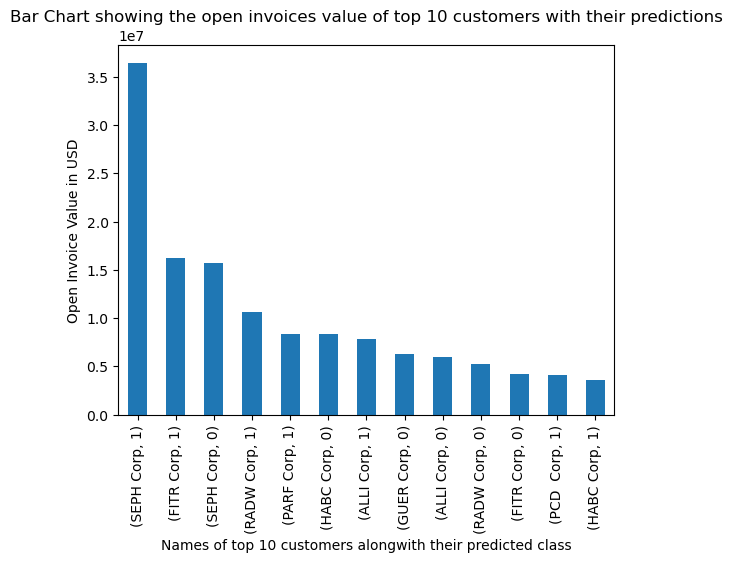

In [343]:
# Top 10 customers based on value of open invoices. Schuster needs to focus on those customers for whom Final Prediction is 1
df_mer.groupby(["CUSTOMER_NAME","Final_Prediction"])["USD Amount"].sum().sort_values(ascending=False).head(13).plot.bar()
plt.title("Bar Chart showing the open invoices value of top 10 customers with their predictions")
plt.xlabel("Names of top 10 customers alongwith their predicted class")
plt.ylabel("Open Invoice Value in USD")
plt.show()   

In [344]:
# Let us check the total number of open invoices customer wise
inv_ct=df_mer.groupby("CUSTOMER_NAME")["Final_Prediction"].count()
inv_ct=inv_ct.to_frame()
inv_ct.rename(columns={"Final_Prediction":"Number of Open Invoices"},inplace=True)
inv_ct.head()

,Number of Open Invoices
CUSTOMER_NAME,
3D D Corp,30
6TH Corp,2
ABDU Corp,77
ABEE Corp,2
ABU Corp,5


In [345]:
# Let us check the % of predicted delayed invoices customer wise
inv_del=df_mer.groupby("CUSTOMER_NAME")["Final_Prediction"].mean()
inv_del=inv_del.to_frame()
inv_del.rename(columns={"Final_Prediction":"% of Predicted Delayed Invoices"},inplace=True)
inv_del.head()

,% of Predicted Delayed Invoices
CUSTOMER_NAME,
3D D Corp,0.000000
6TH Corp,1.000000
ABDU Corp,0.701299
ABEE Corp,1.000000
ABU Corp,0.800000


In [346]:
# Merging the two, let us see how many invoices will be delayed in terms of volume
inv_cust=pd.merge(inv_ct,inv_del,how="inner",on="CUSTOMER_NAME")
inv_cust["Delayed Invoices Count"]=(inv_cust["Number of Open Invoices"]*inv_cust["% of Predicted Delayed Invoices"])
inv_cust.sort_values(by ="Delayed Invoices Count",ascending=False)

,Number of Open Invoices,% of Predicted Delayed Invoices,Delayed Invoices Count
CUSTOMER_NAME,,,
SEPH Corp,8260,0.685714,5664.0
FITR Corp,3454,0.862768,2980.0
PARF Corp,1717,0.842749,1447.0
AREE Corp,1117,0.468218,523.0
ALLI Corp,1042,0.428023,446.0
...,...,...,...
ST R Corp,3,0.000000,0.0
JIHA Corp,2,0.000000,0.0
J A Corp,1,0.000000,0.0


In [347]:
# Top 10 customer in terms of volume of delayed invoices
inv_cust.sort_values(by ="Delayed Invoices Count",ascending=False).head(10)

,Number of Open Invoices,% of Predicted Delayed Invoices,Delayed Invoices Count
CUSTOMER_NAME,,,
SEPH Corp,8260,0.685714,5664.0
FITR Corp,3454,0.862768,2980.0
PARF Corp,1717,0.842749,1447.0
AREE Corp,1117,0.468218,523.0
ALLI Corp,1042,0.428023,446.0
HABC Corp,517,0.702128,363.0
AL T Corp,584,0.558219,326.0
DEBE Corp,654,0.469419,307.0
RADW Corp,490,0.583673,286.0


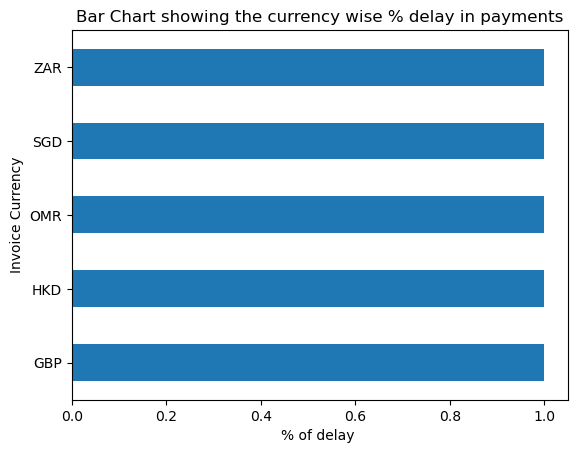

In [348]:
# Top 5 currencies where there is 100% delay
df_mer.groupby(["INVOICE_CURRENCY_CODE"])["Final_Prediction"].mean().sort_values(ascending=False).head().plot.barh()
plt.title("Bar Chart showing the currency wise % delay in payments")
plt.xlabel("% of delay ")
plt.ylabel("Invoice Currency")
plt.show()

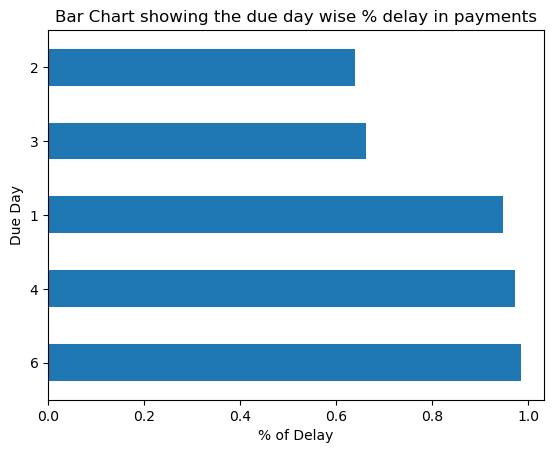

In [349]:
# Almost 100 % delay where Due day is Friday or sunday
df_mer.groupby(["DUE_DAY"])["Final_Prediction"].mean().sort_values(ascending=False).head().plot.barh()
plt.title("Bar Chart showing the due day wise % delay in payments")
plt.xlabel("% of Delay")
plt.ylabel("Due Day")
plt.show()

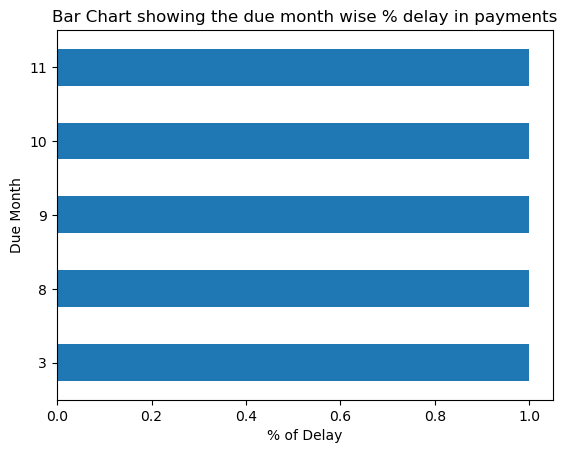

In [350]:
# Invoices due in March,Jul-Oct will require more followup for timely payments.
df_mer.groupby(["DUE_MONTH"])["Final_Prediction"].mean().sort_values(ascending=False).head().plot.barh()
plt.title("Bar Chart showing the due month wise % delay in payments")
plt.xlabel("% of Delay")
plt.ylabel("Due Month")
plt.show()

In [ ]:
## Colcusion
* Cluster 0 as these are cases of prolonged delays, so focus on all those cases.

* Invoice with huge invoice value or huge volume of transactions cases , should be follow up more.

* Assign a dedicated resource at SEPH to manage follow-ups, considering the substantial business value and the volume of invoices involved..

* Customers who have high probability of default or delay % is 100%, should be follow up more.

* During follow-ups, pay special attention to invoices due in March, July to October, and those falling on Fridays and Sundays..

* Take a proactive approach, particularly in cases where the invoicing currency is ZAR, HKD, SGD, OMR, and GBP..